# To do
1. Loading data
2. Import packages
3. Statistical analysis

# Loading data

In [90]:
import pandas as pd

In [91]:
path_features = 'data/training_set_features.csv'
path_targets = 'data/training_set_labels.csv'

In [92]:
df_fts = pd.read_csv(path_features, index_col = 'respondent_id')
df_tgs = pd.read_csv(path_targets, index_col = 'respondent_id')

In [93]:
df = df_tgs.merge(df_fts, on = 'respondent_id', indicator = True)

## Sanity check after merging

- .merge(indicator = True)
- df['merge'].value_counts()
- merge how = 'inner'
- all both 26707
- It indicates one to one data relation

In [94]:
df['_merge'].value_counts()

_merge
both          26707
left_only         0
right_only        0
Name: count, dtype: int64

# Statistical analysis

- Distribution
- Mssing data : any relation with demography? any patterns?

In [95]:
import matplotlib.pyplot as plt
import numpy as np

## Overal percentage of all the columns

In [96]:
df.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', '_merge'],
      dtype='object')

In [97]:
df_1 = df[['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds','h1n1_vaccine']]

In [98]:
df_1['h1n1_concern'].value_counts()

h1n1_concern
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: count, dtype: int64

In [99]:
df['employment_occupation'].value_counts()

employment_occupation
xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: count, dtype: int64

In [100]:
i_0 = df_1.groupby('h1n1_concern').value_counts().index
i_0

MultiIndex([(0.0, 1.0, 0.0, 0),
            (0.0, 2.0, 0.0, 0),
            (0.0, 0.0, 0.0, 0),
            (0.0, 1.0, 0.0, 1),
            (0.0, 2.0, 0.0, 1),
            (0.0, 0.0, 0.0, 1),
            (0.0, 2.0, 1.0, 0),
            (0.0, 1.0, 1.0, 0),
            (0.0, 0.0, 1.0, 0),
            (0.0, 1.0, 1.0, 1),
            (0.0, 2.0, 1.0, 1),
            (0.0, 0.0, 1.0, 1),
            (1.0, 1.0, 0.0, 0),
            (1.0, 2.0, 0.0, 0),
            (1.0, 1.0, 0.0, 1),
            (1.0, 2.0, 0.0, 1),
            (1.0, 0.0, 0.0, 0),
            (1.0, 1.0, 1.0, 0),
            (1.0, 2.0, 1.0, 0),
            (1.0, 0.0, 0.0, 1),
            (1.0, 1.0, 1.0, 1),
            (1.0, 2.0, 1.0, 1),
            (1.0, 0.0, 1.0, 0),
            (1.0, 0.0, 1.0, 1),
            (2.0, 1.0, 0.0, 0),
            (2.0, 2.0, 0.0, 0),
            (2.0, 2.0, 0.0, 1),
            (2.0, 1.0, 0.0, 1),
            (2.0, 0.0, 0.0, 0),
            (2.0, 1.0, 1.0, 0),
            (2.0, 2.0, 1.0, 0),
        

<Axes: >

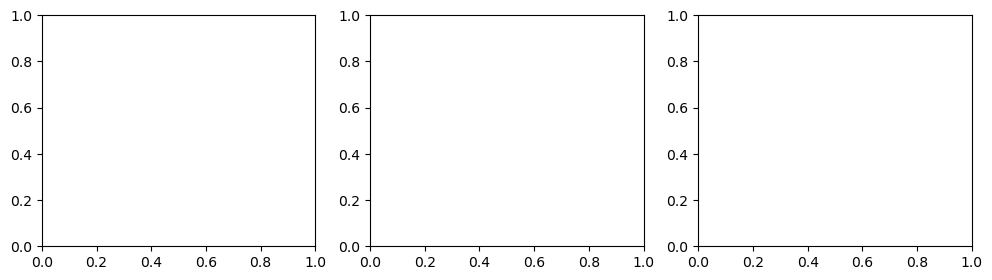

In [101]:
fig, axes = plt.subplots(1, 3, figsize = (12,3))
i_0 = df_1.groupby('h1n1_concern').value_counts().index
axes[0]

In [102]:
df['h1n1_vaccine'].value_counts(normalize = True)

h1n1_vaccine
0    0.787546
1    0.212454
Name: proportion, dtype: float64

In [103]:
df['seasonal_vaccine'].value_counts(normalize = True)

seasonal_vaccine
0    0.534392
1    0.465608
Name: proportion, dtype: float64

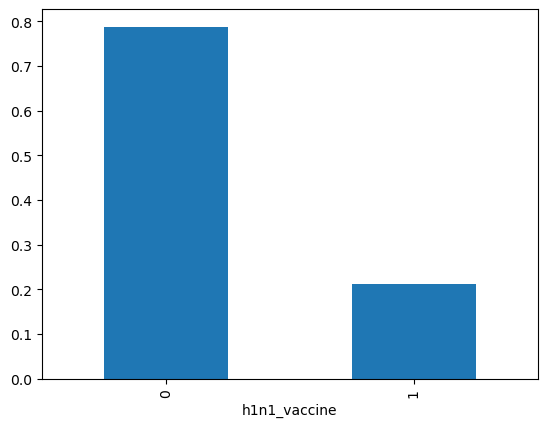

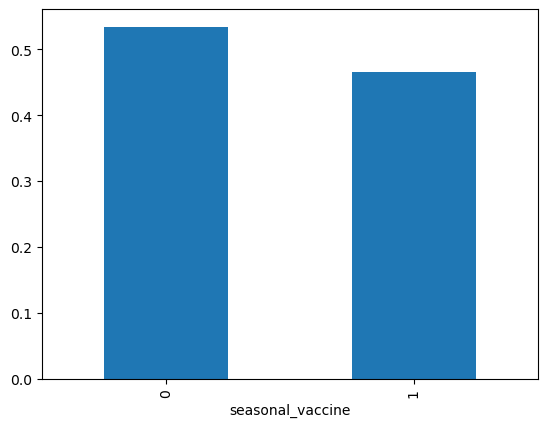

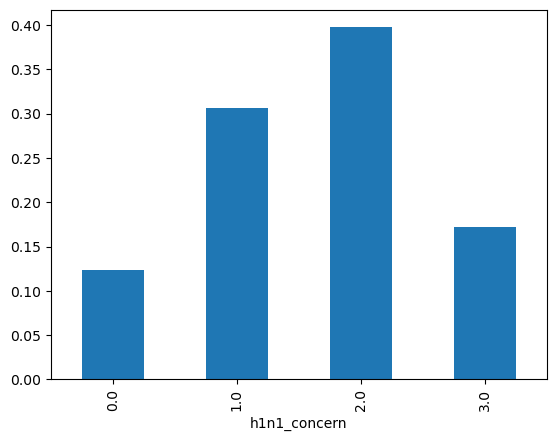

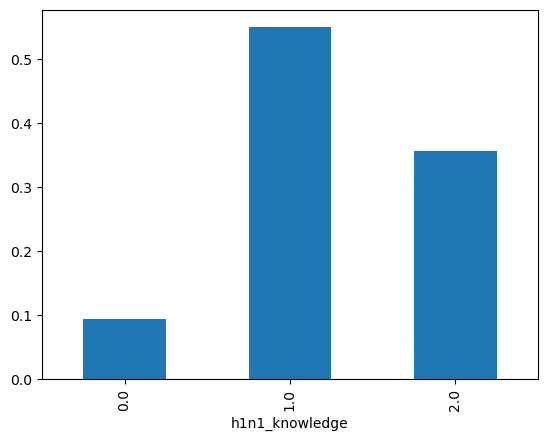

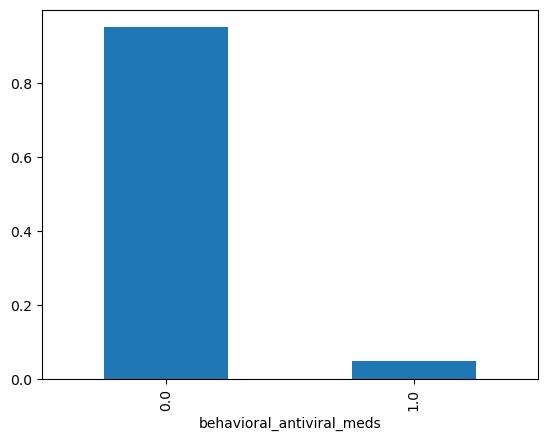

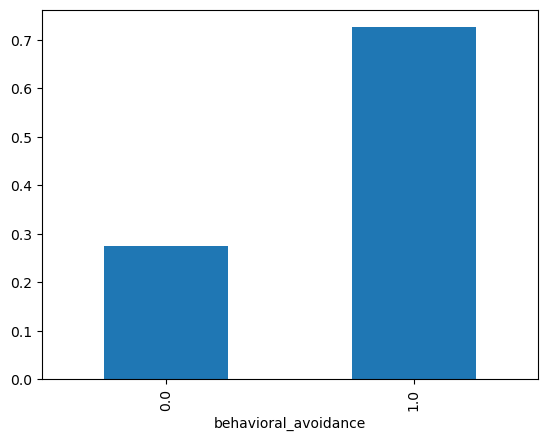

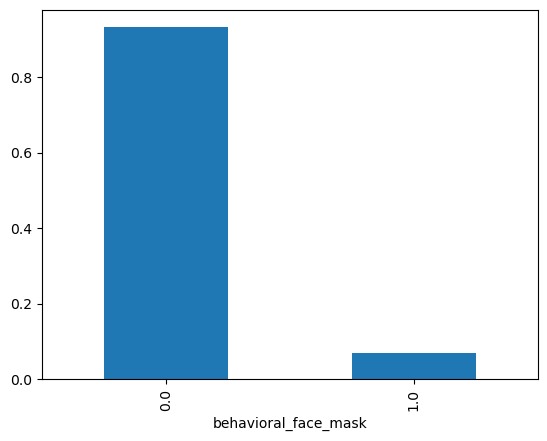

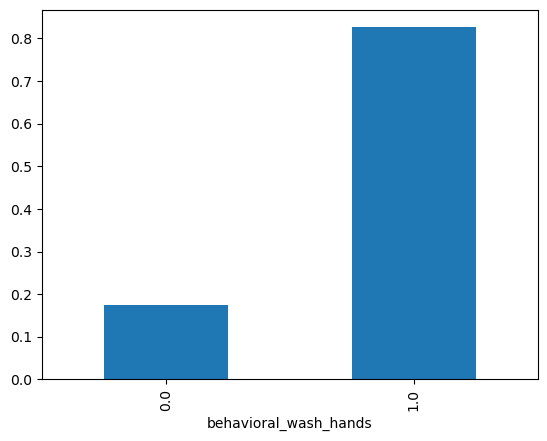

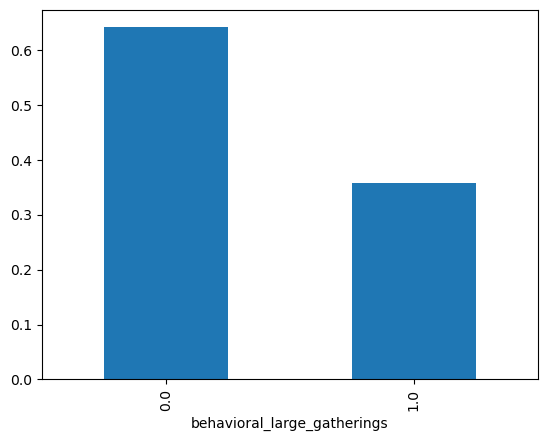

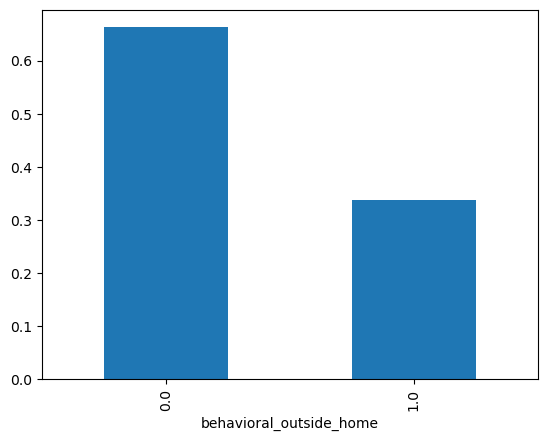

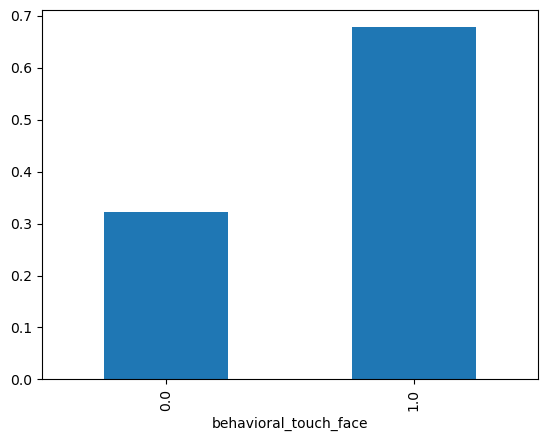

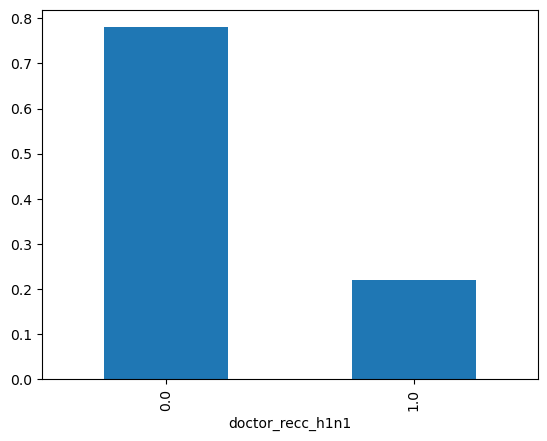

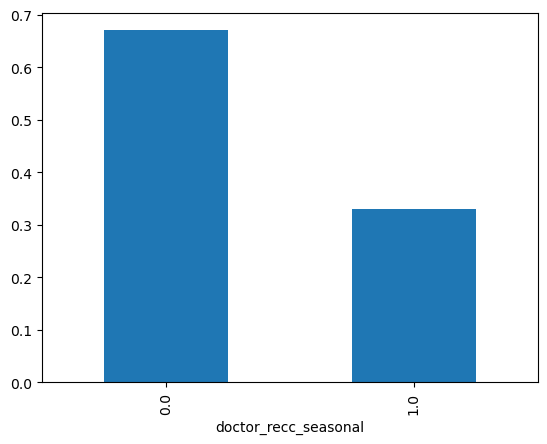

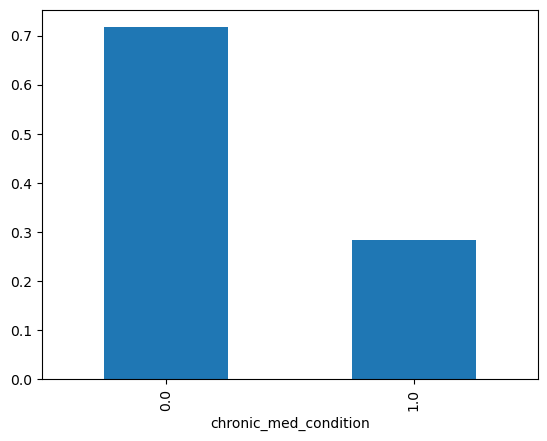

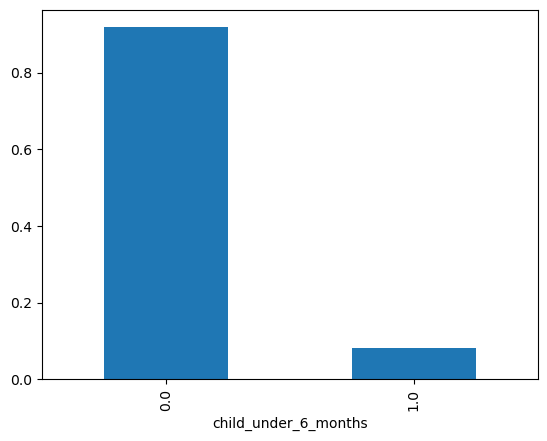

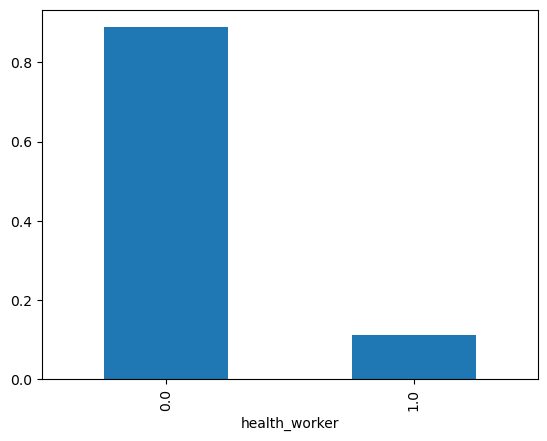

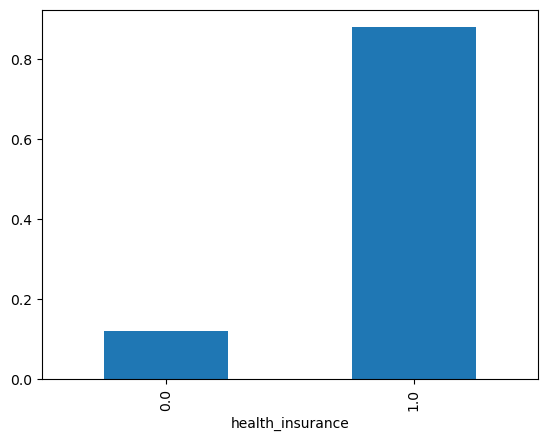

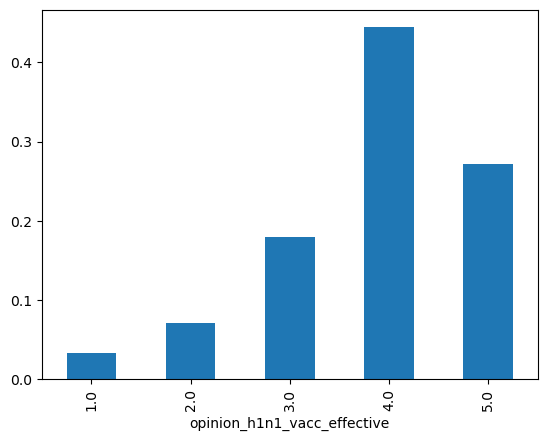

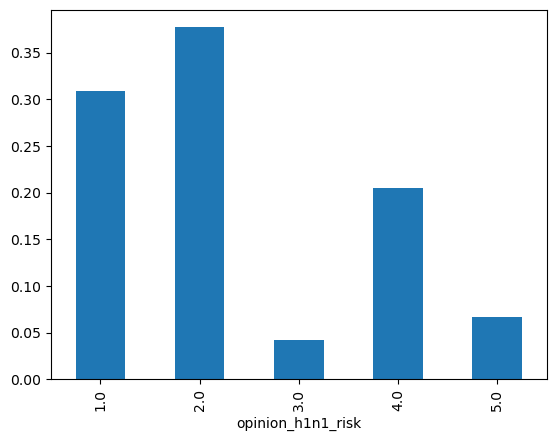

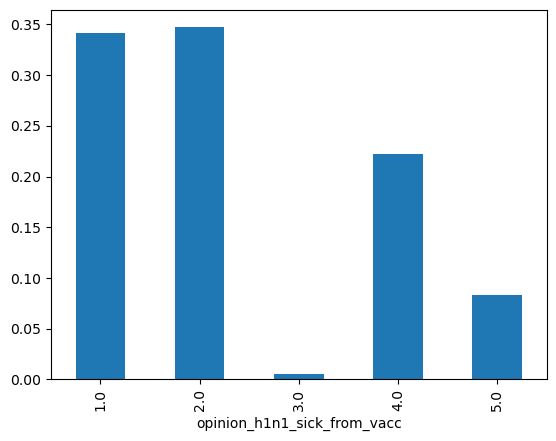

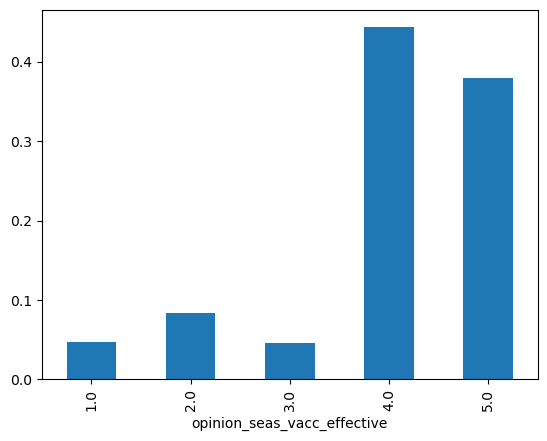

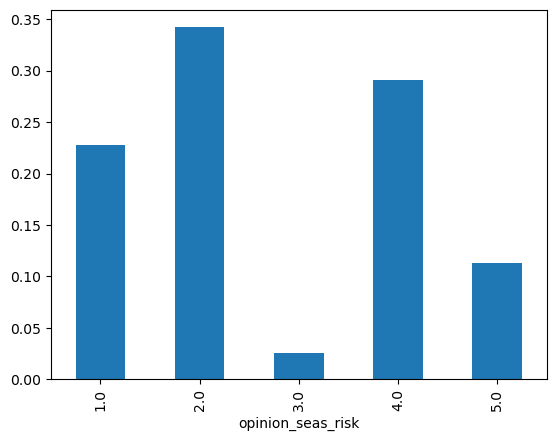

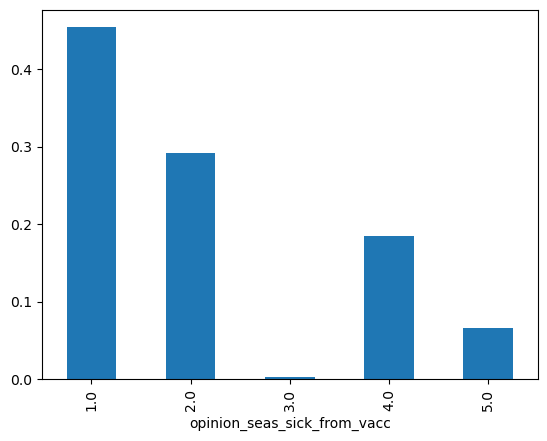

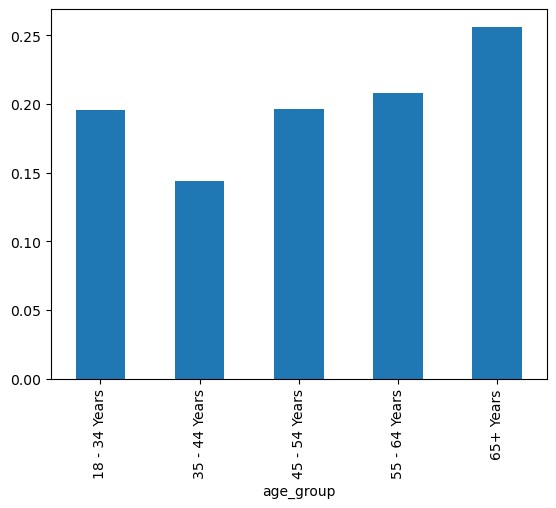

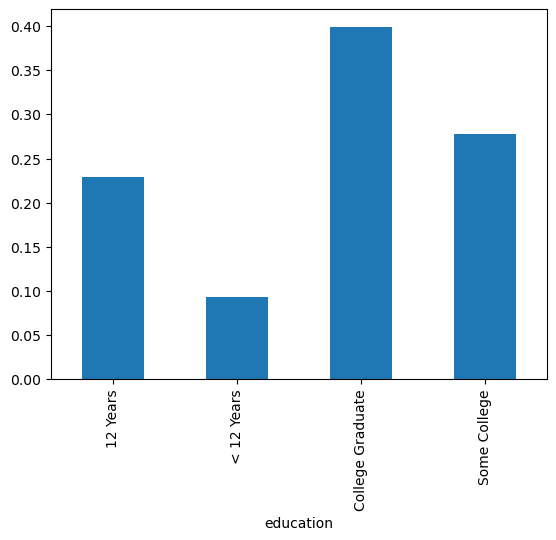

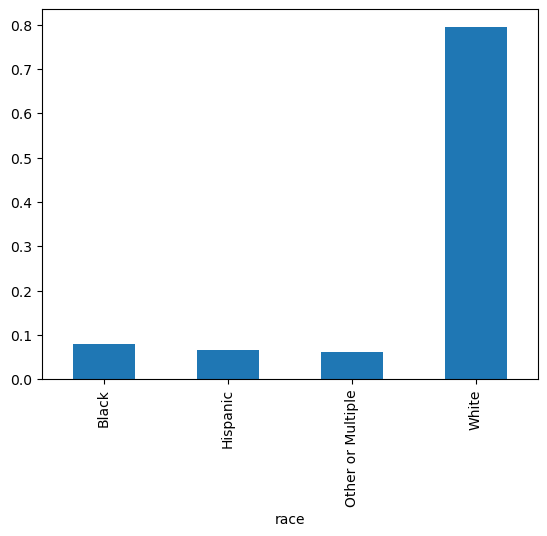

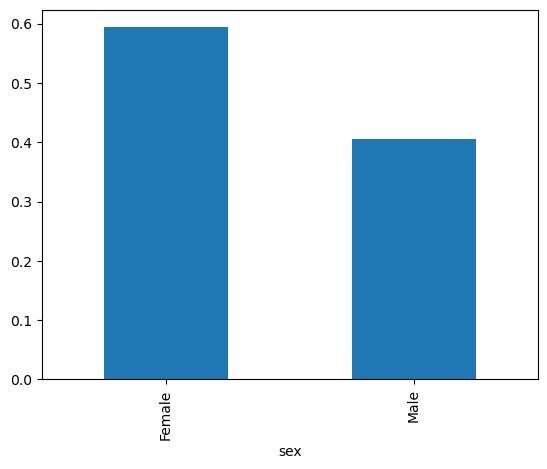

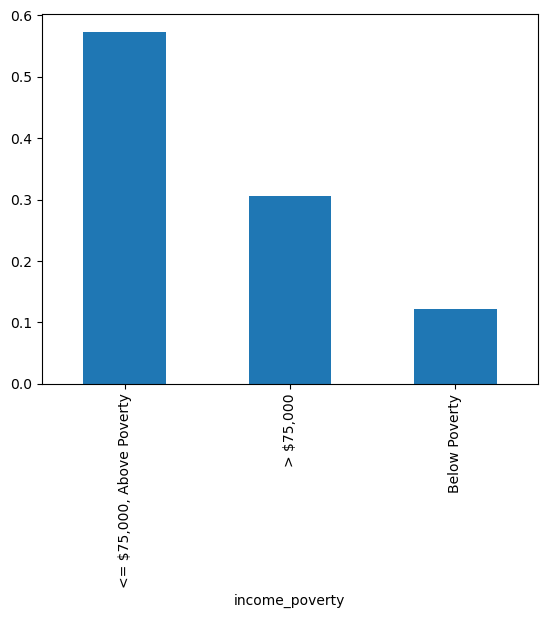

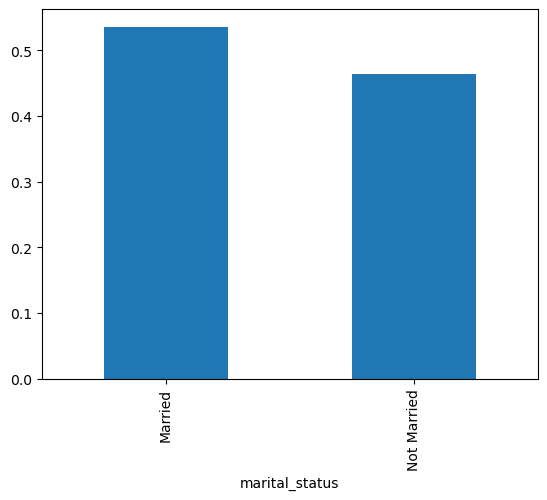

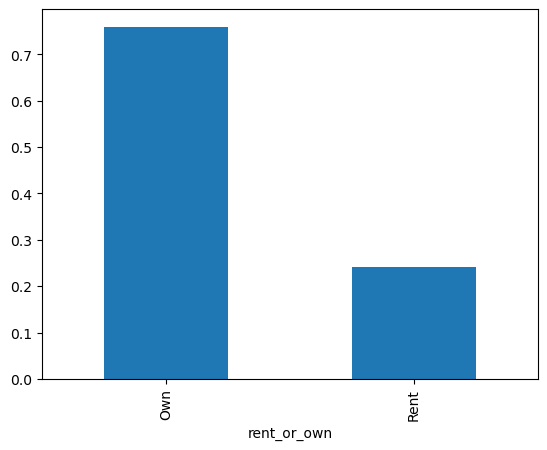

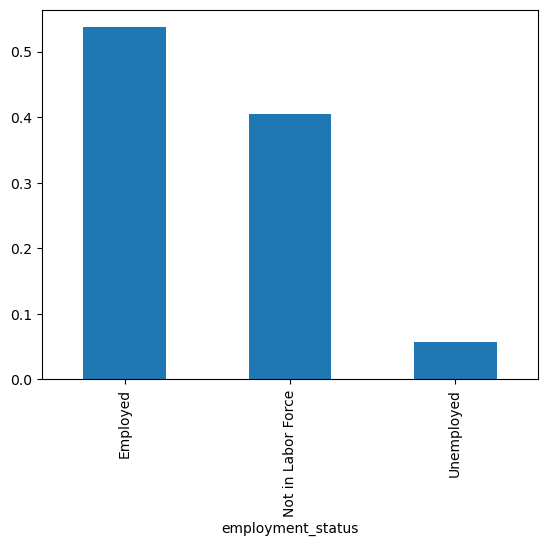

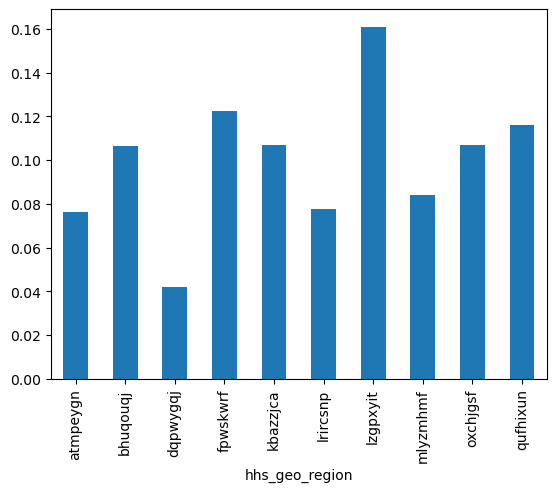

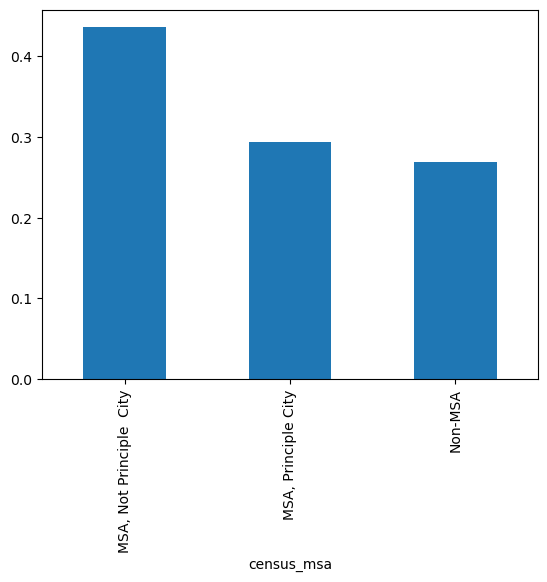

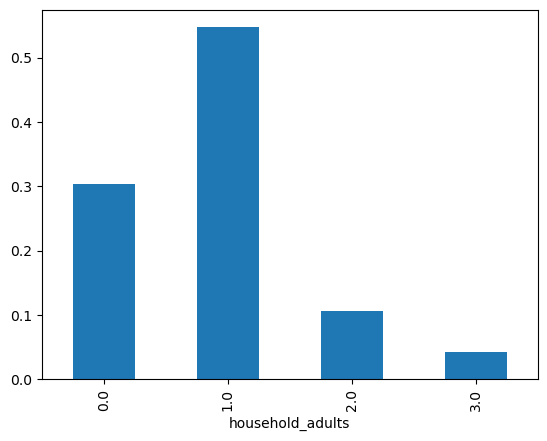

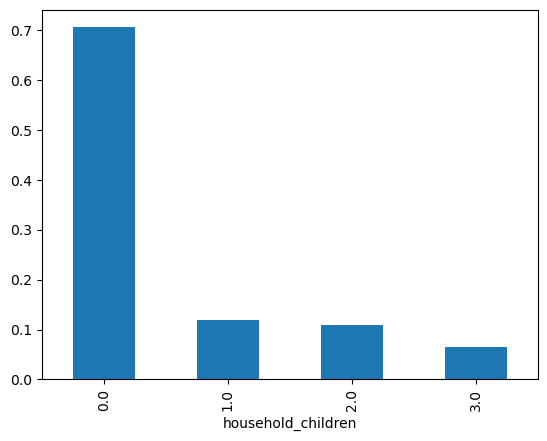

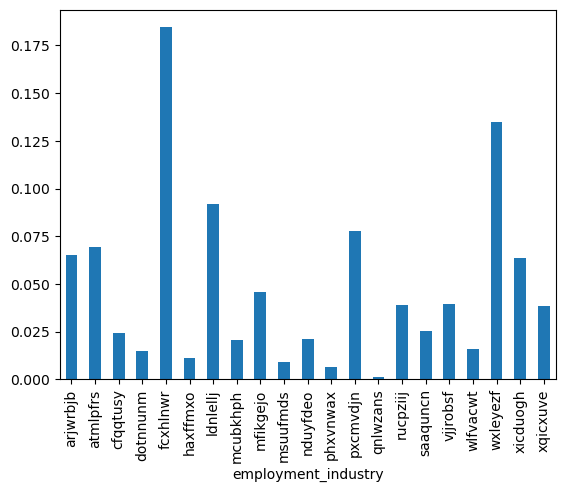

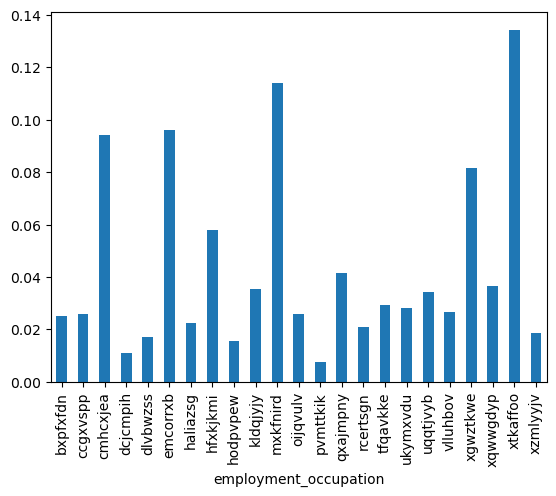

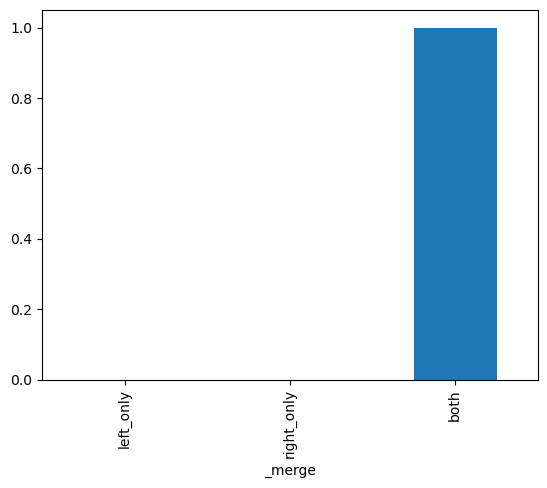

In [104]:
for i in df.columns :
    df[i].value_counts(normalize = True).sort_index().plot(kind='bar')
    plt.show()
    

## Overal percentage of H1N1 vaccination of all the columns

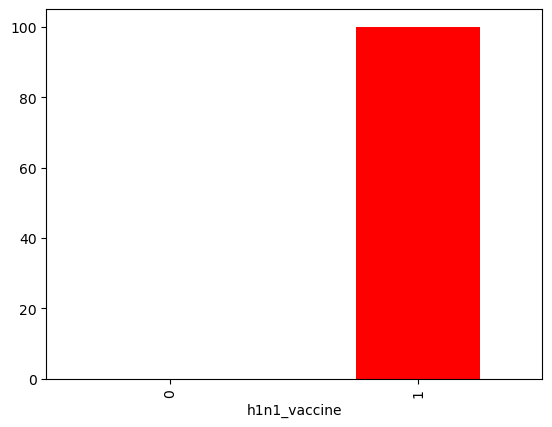

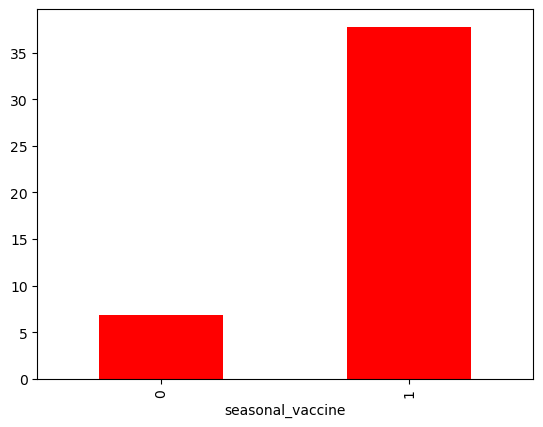

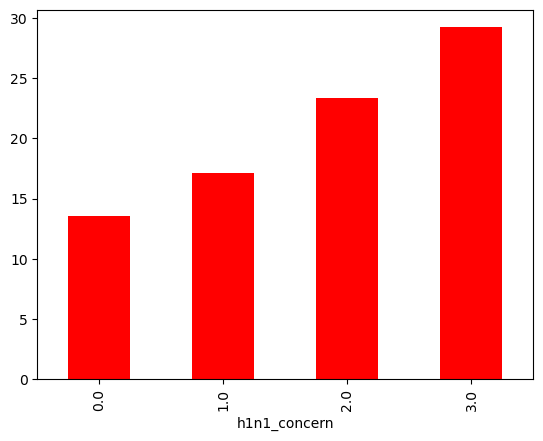

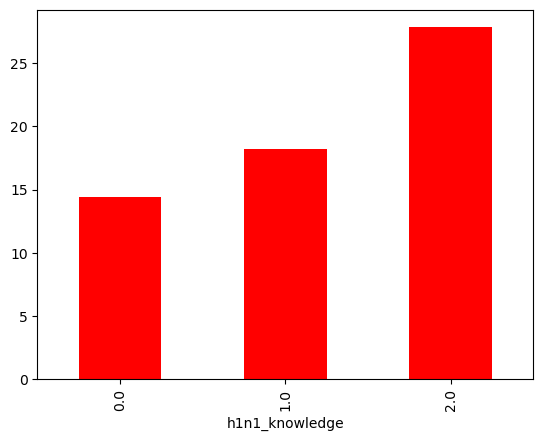

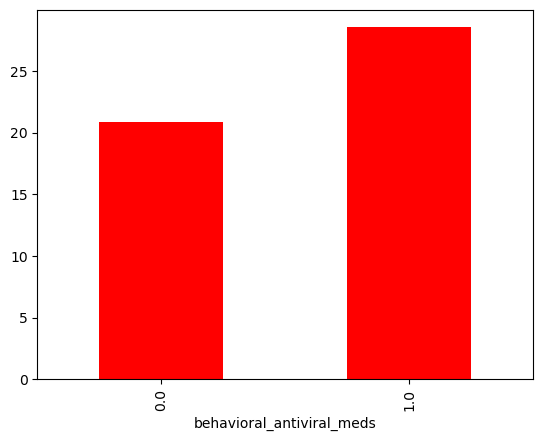

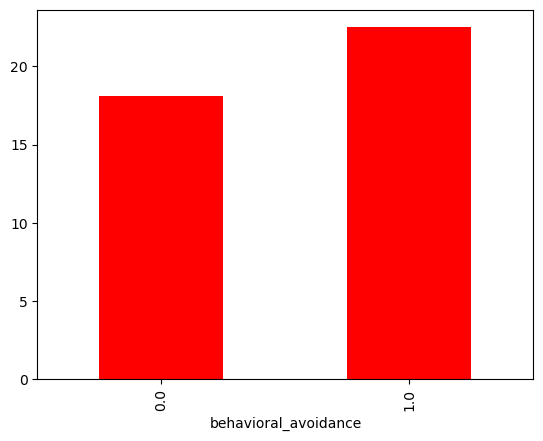

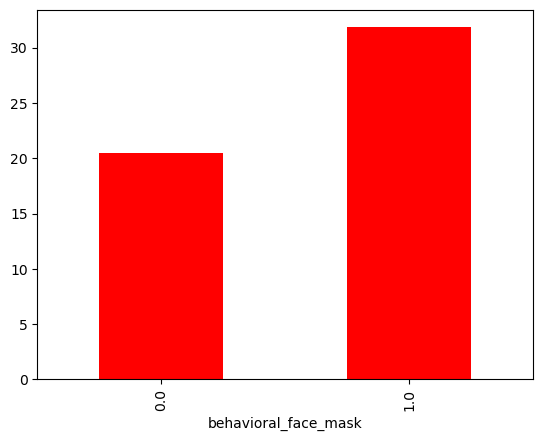

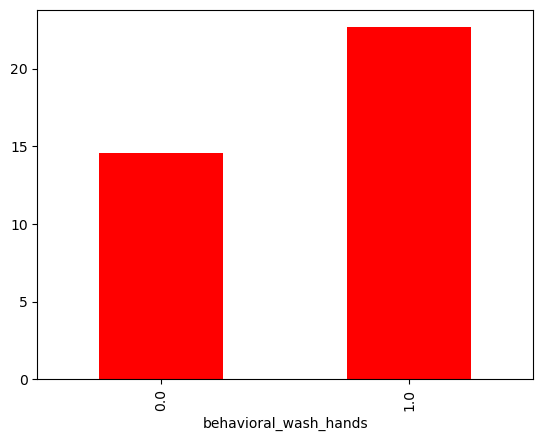

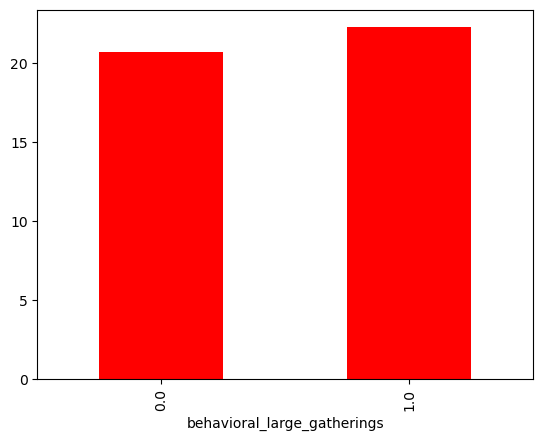

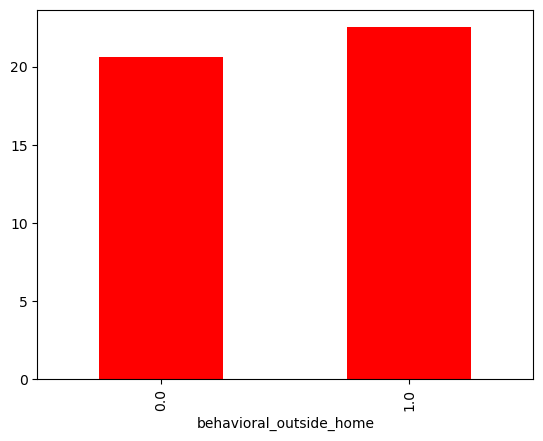

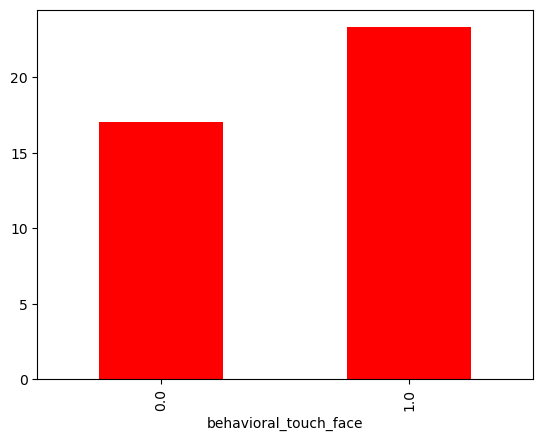

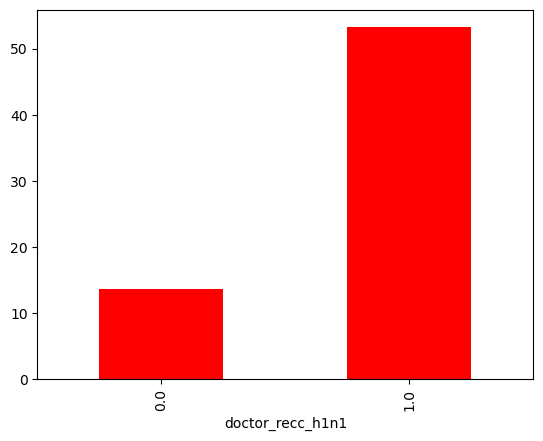

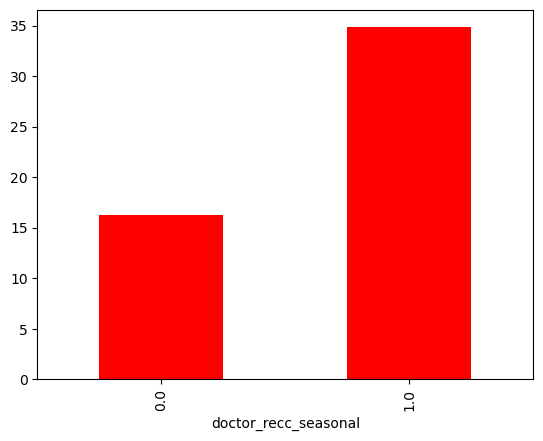

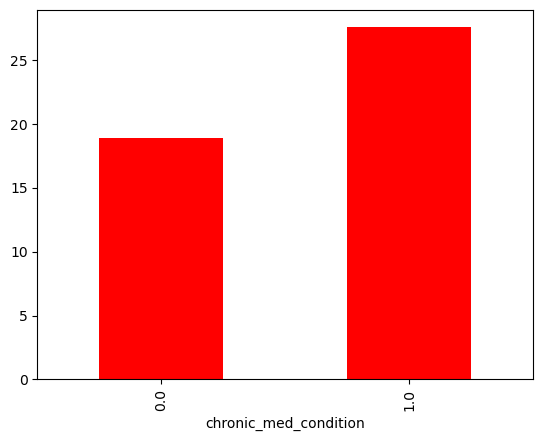

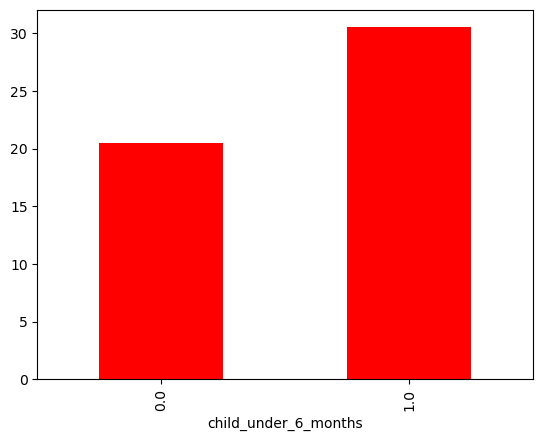

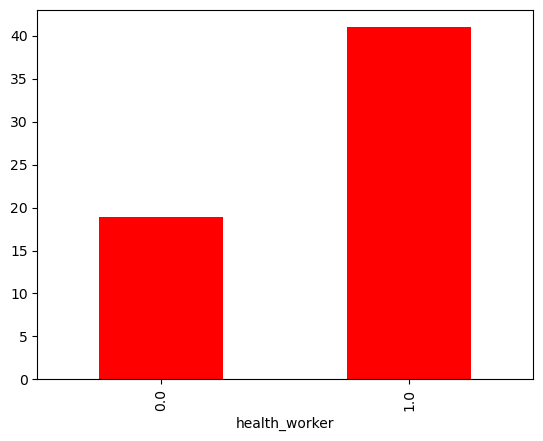

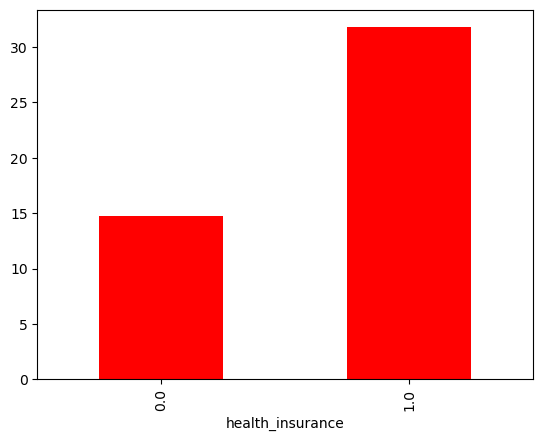

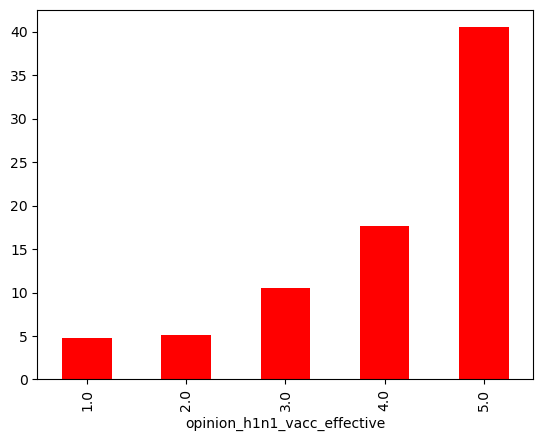

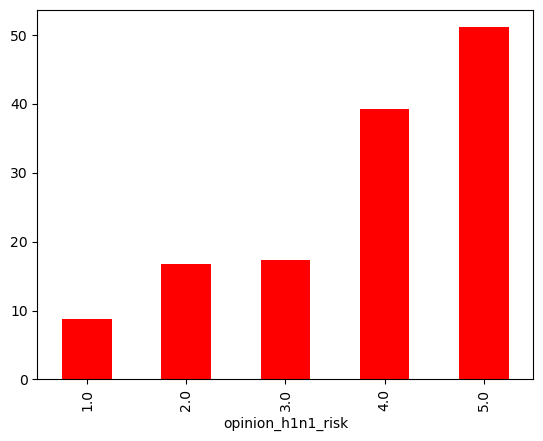

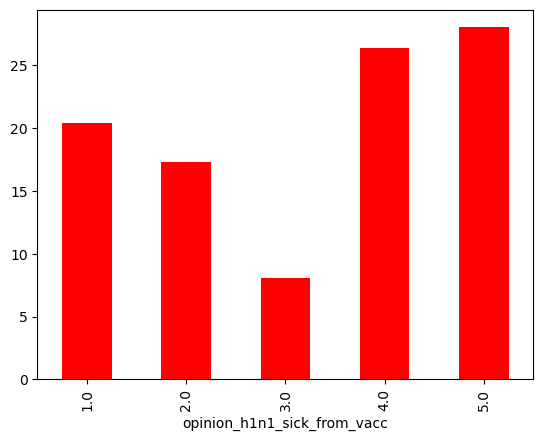

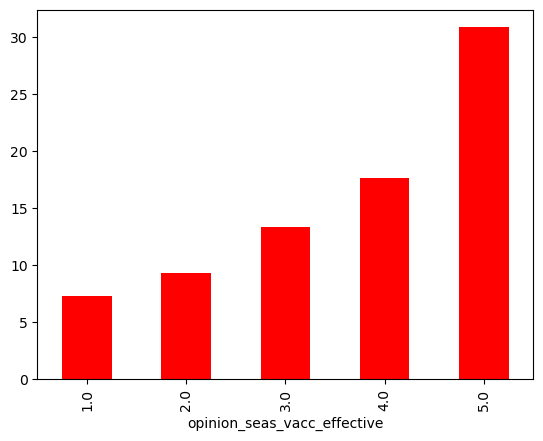

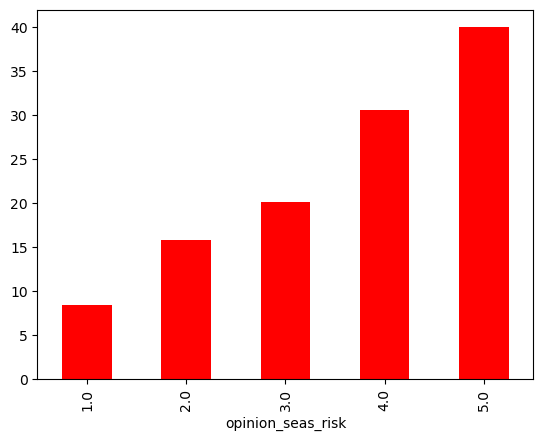

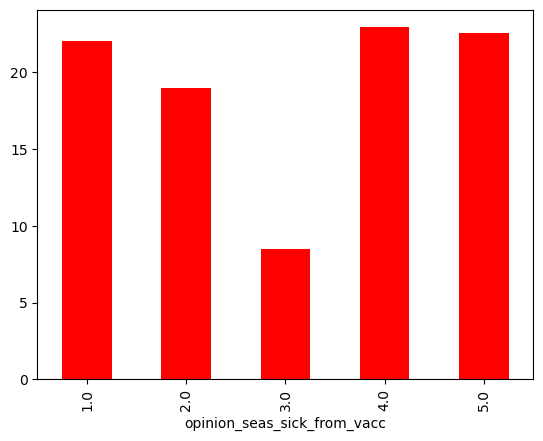

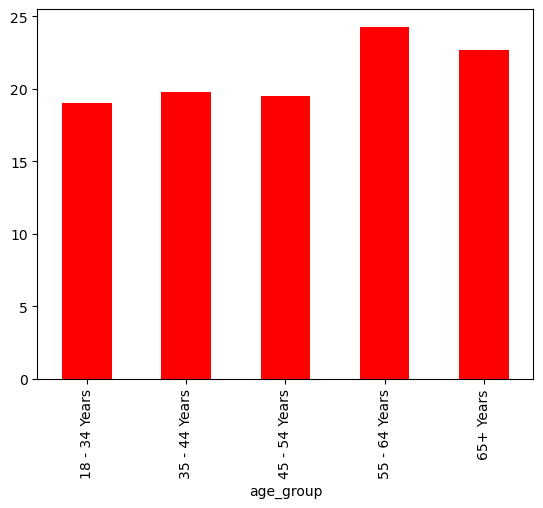

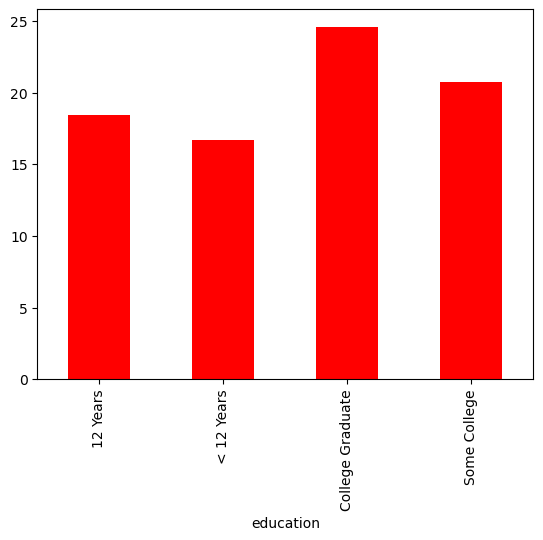

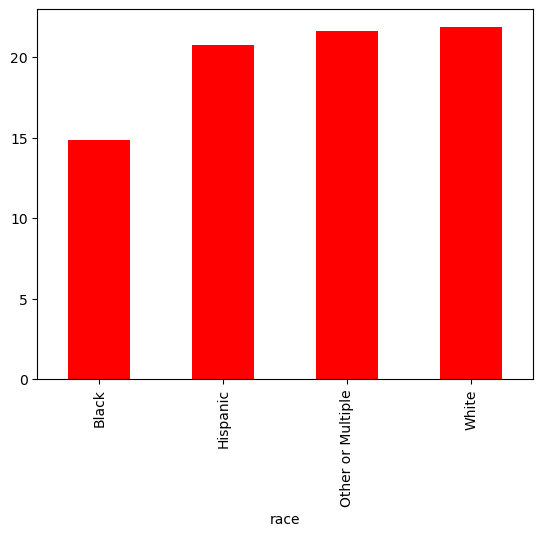

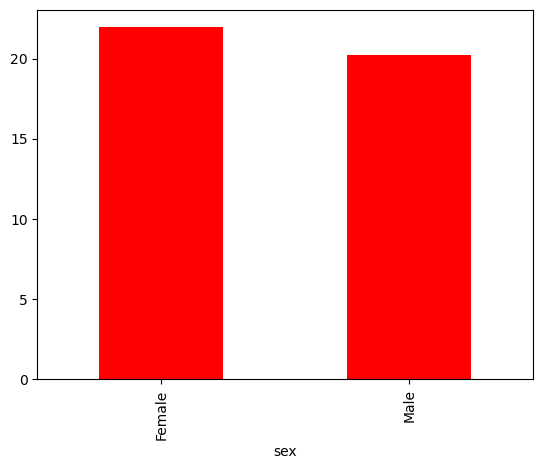

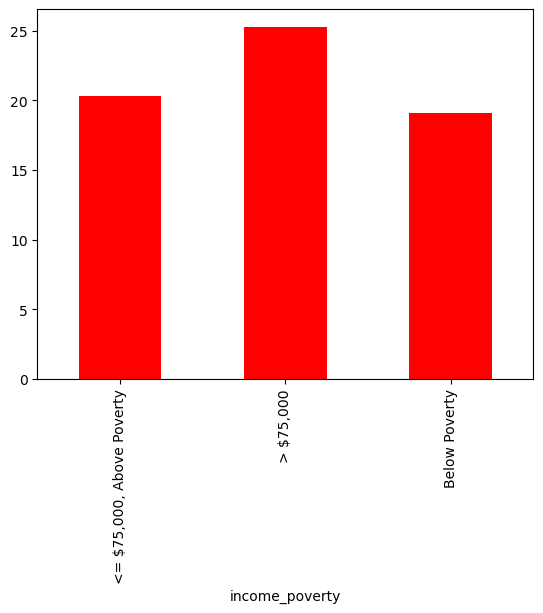

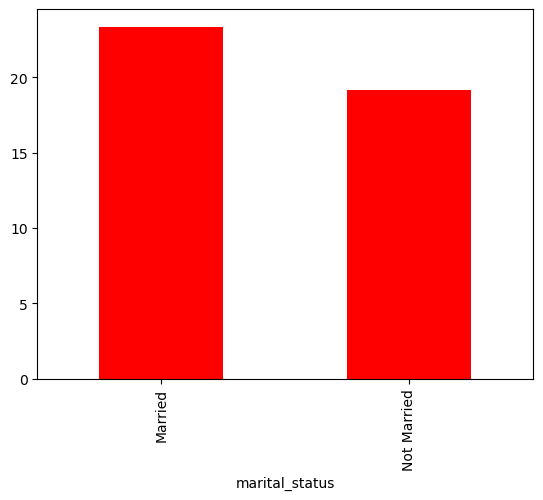

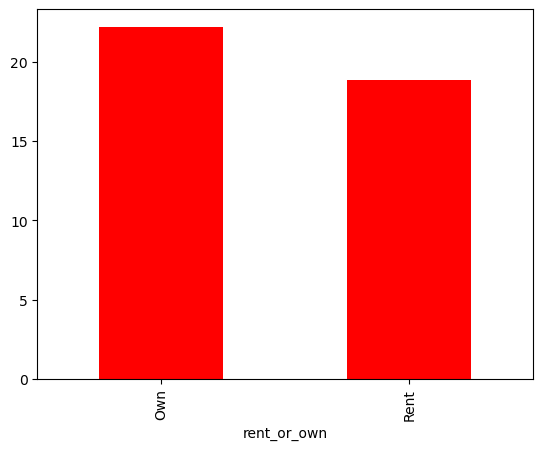

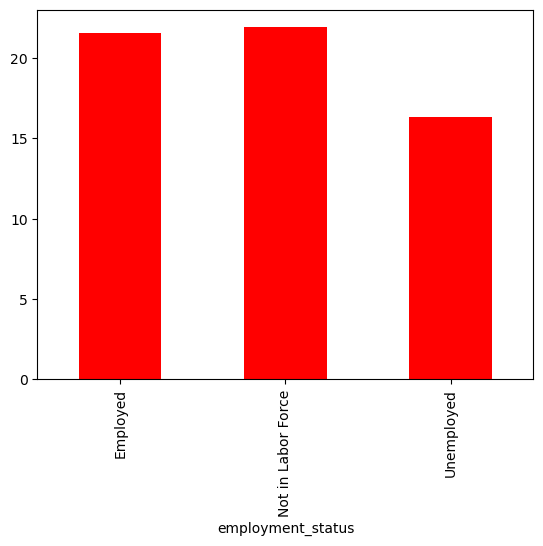

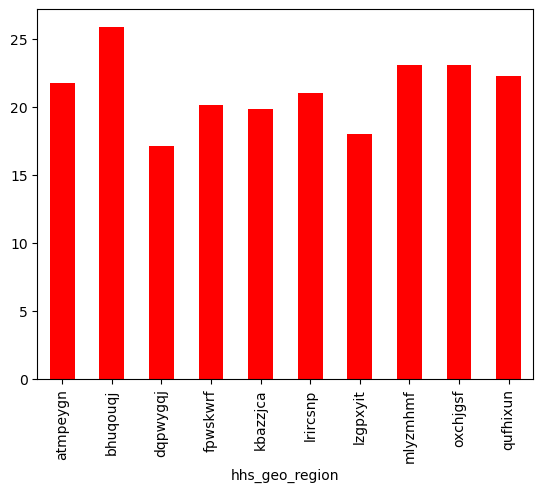

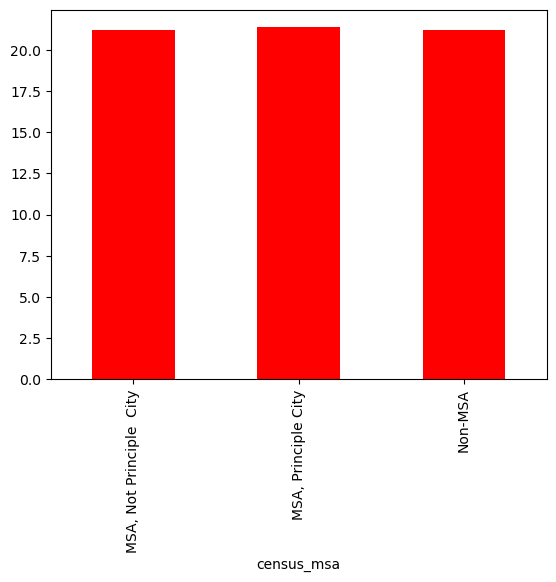

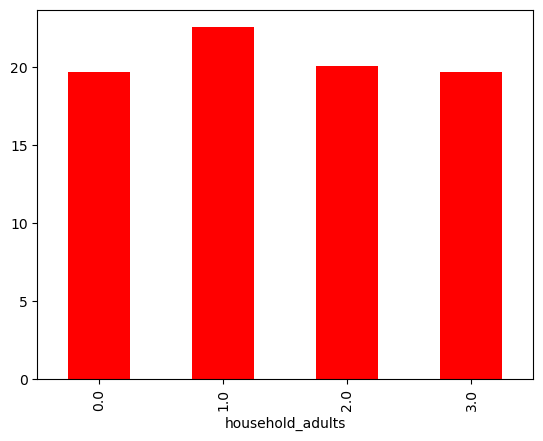

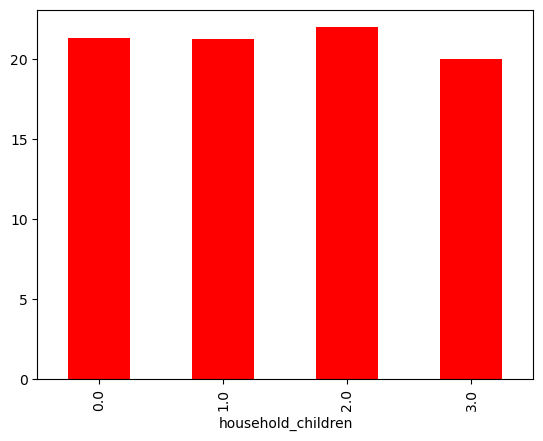

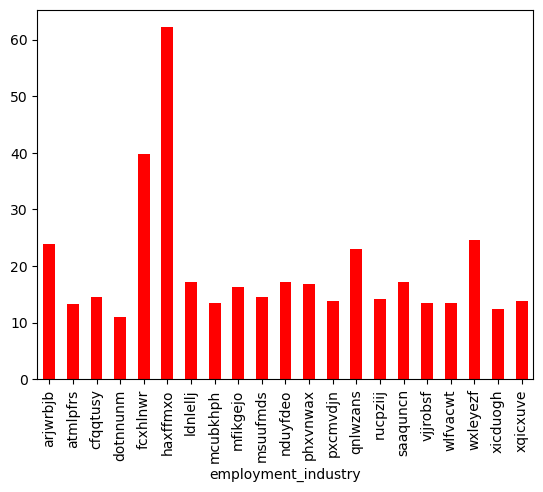

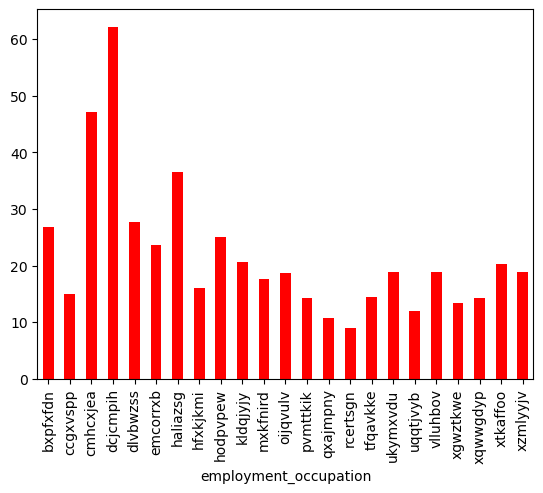

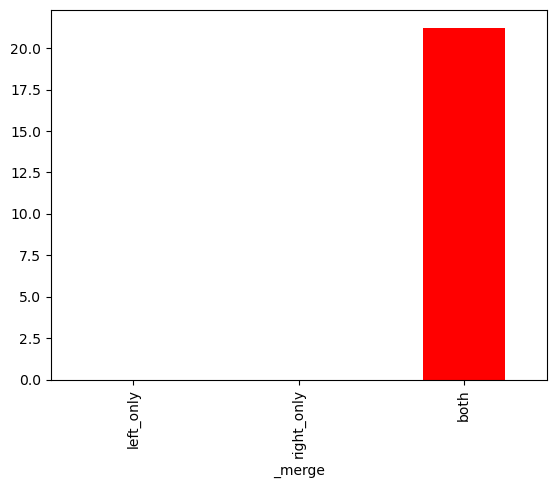

In [105]:
for i in df.columns :
    hn = df.groupby(i)['h1n1_vaccine'].sum().sort_index()
    ct = df[i].value_counts().sort_index()
    hn = pd.DataFrame(hn)
    ct = pd.DataFrame(ct)
    hn_ct = hn.merge(ct,left_index = True, right_index = True)
    hn_ct['percentage'] = hn_ct['h1n1_vaccine'] / hn_ct['count'] * 100
    hn_ct['percentage'].plot(kind = 'bar', color = 'r')
    plt.show()
    

## Overal percentage of seasonal vaccination of all the columns

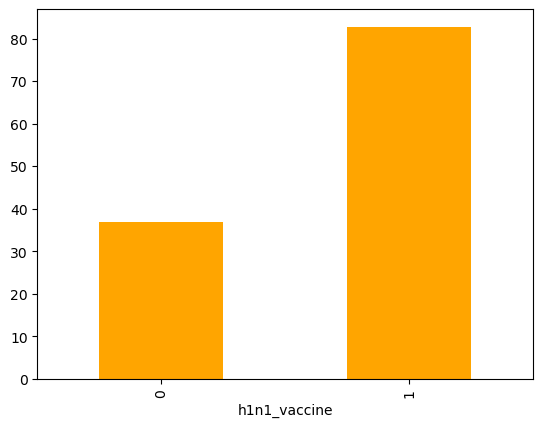

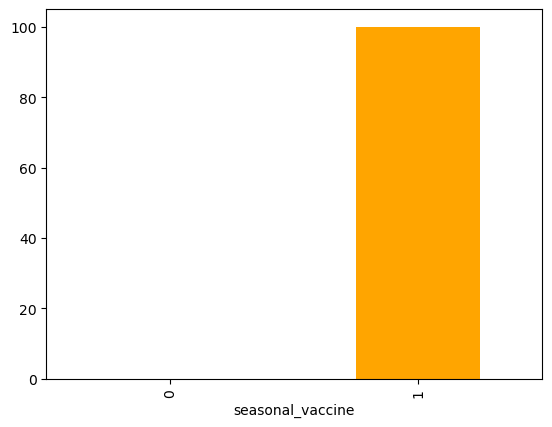

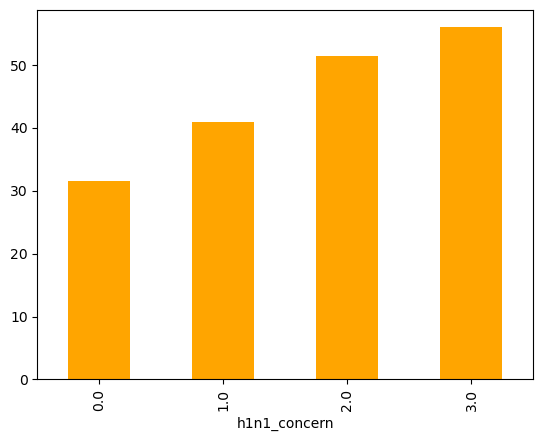

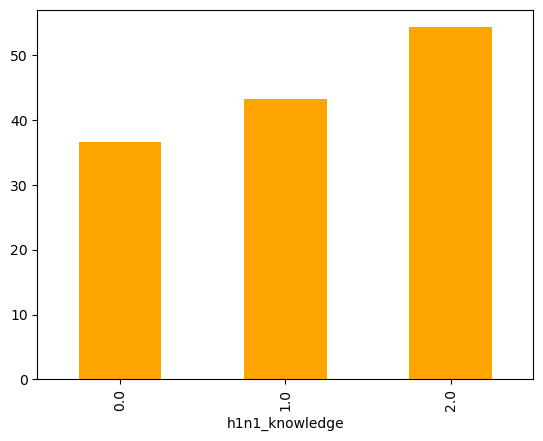

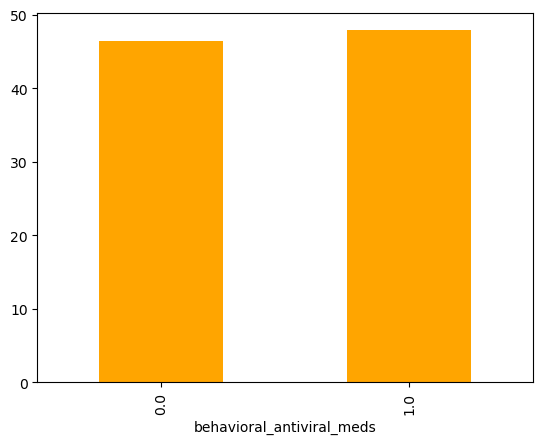

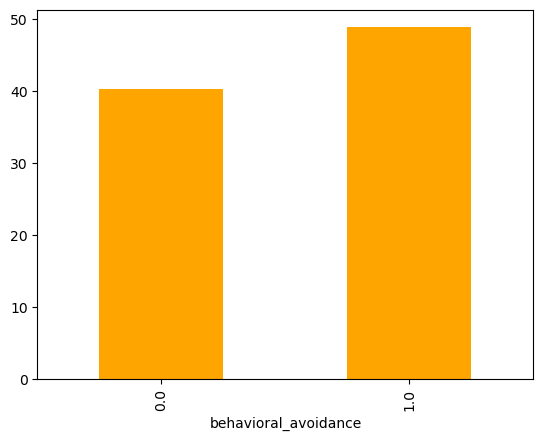

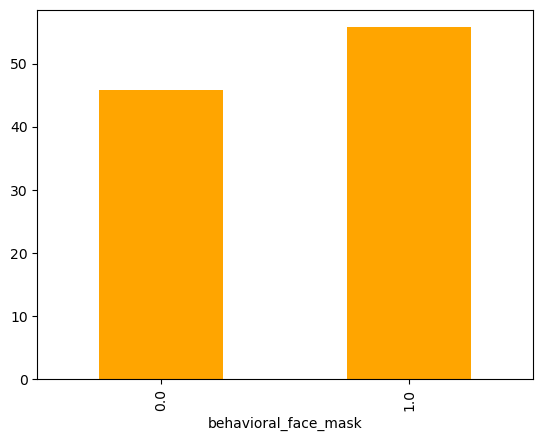

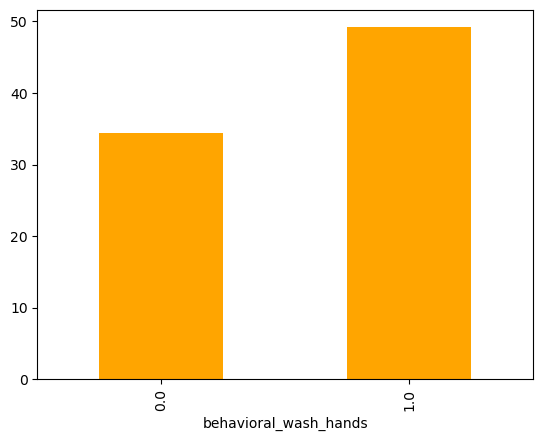

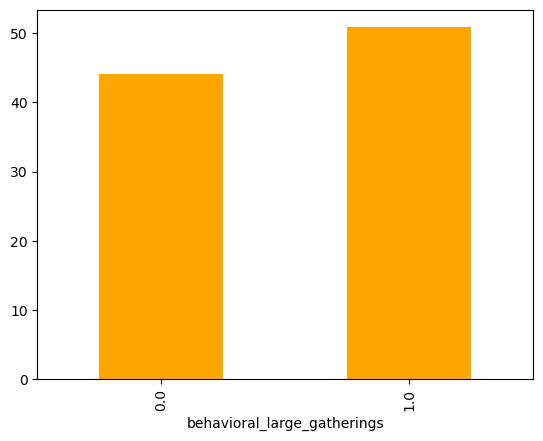

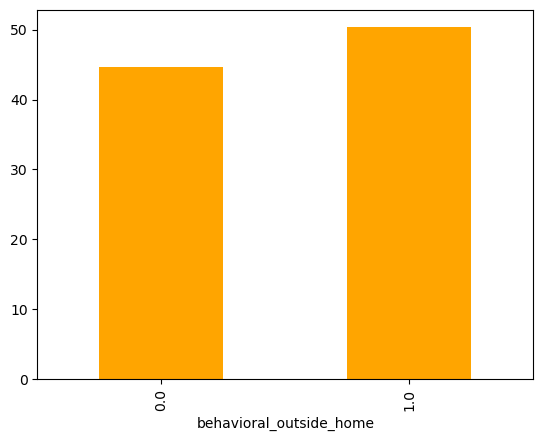

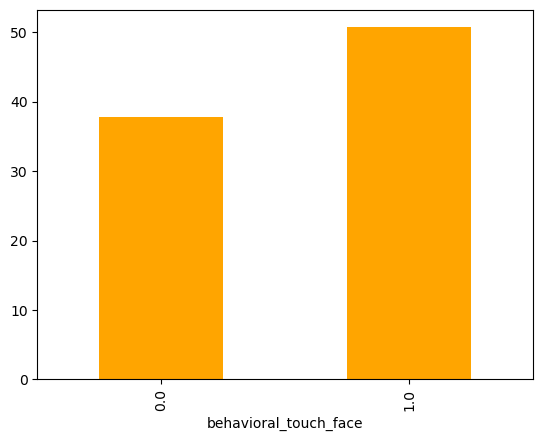

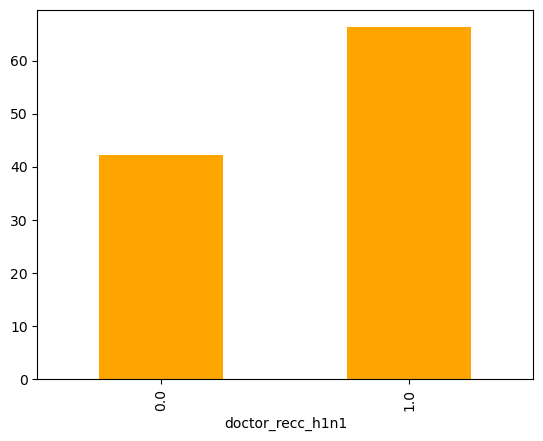

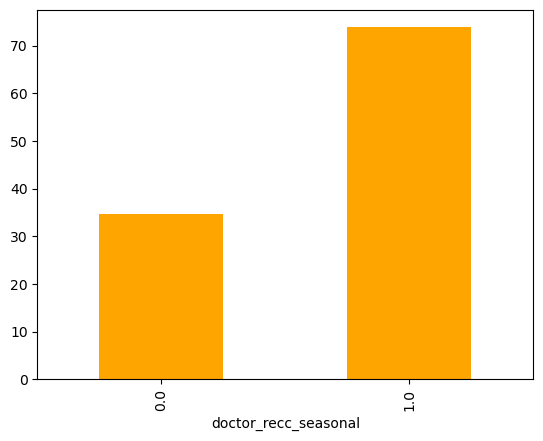

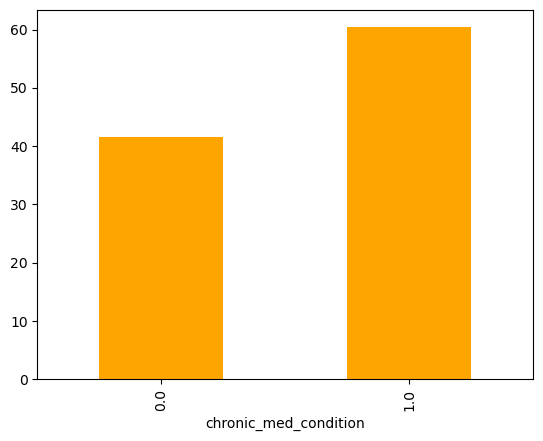

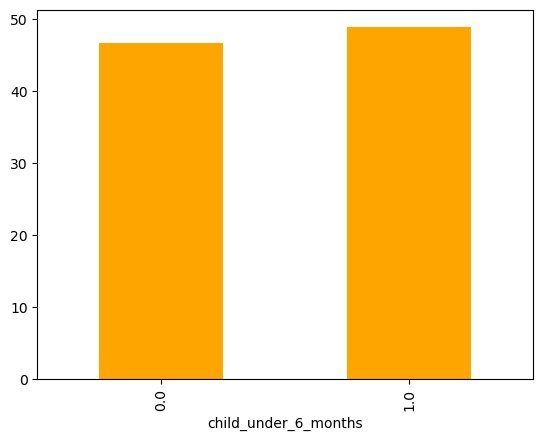

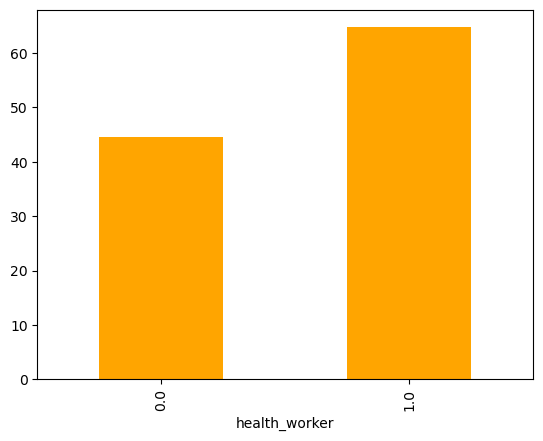

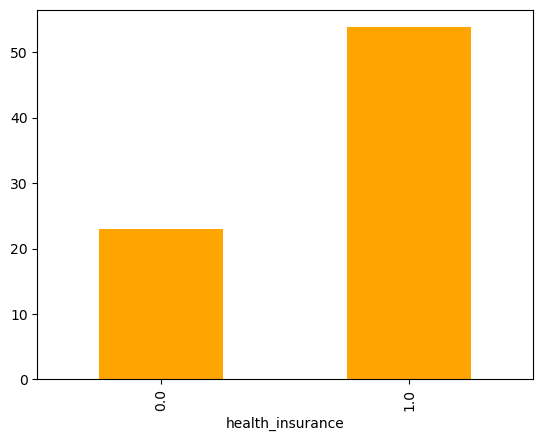

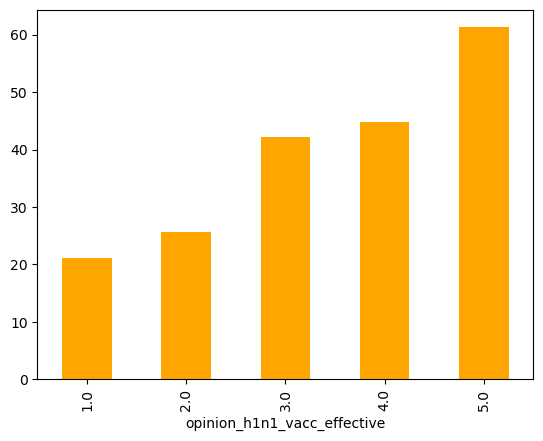

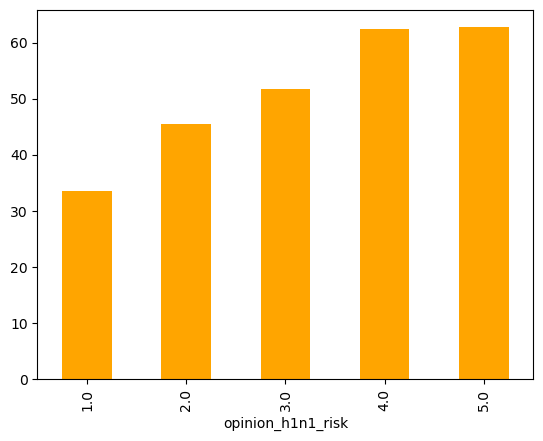

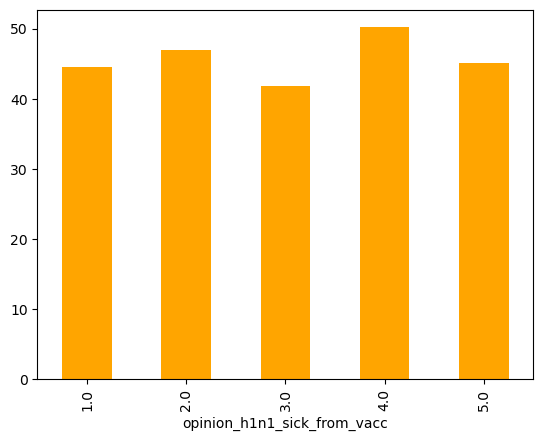

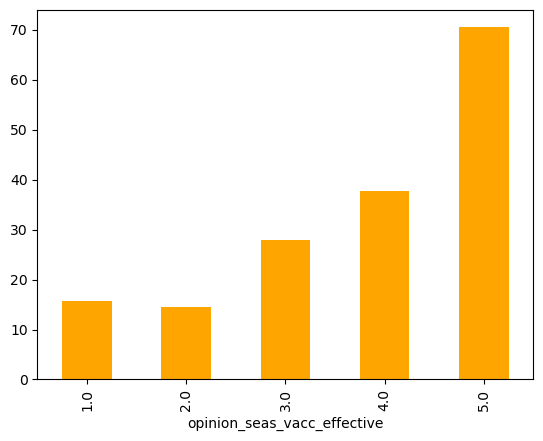

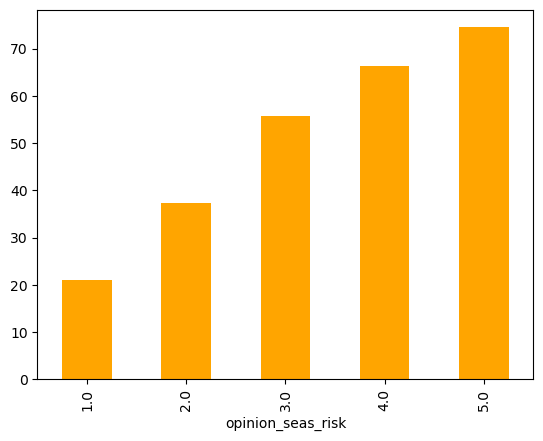

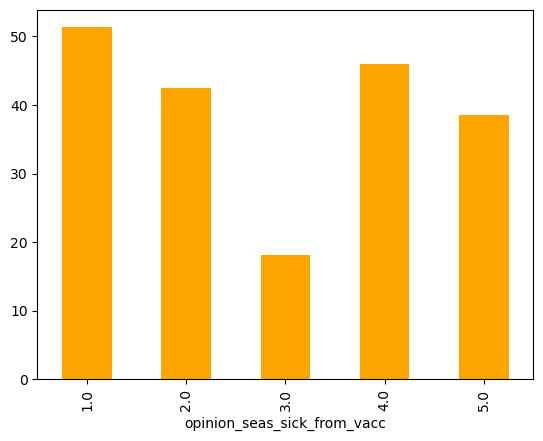

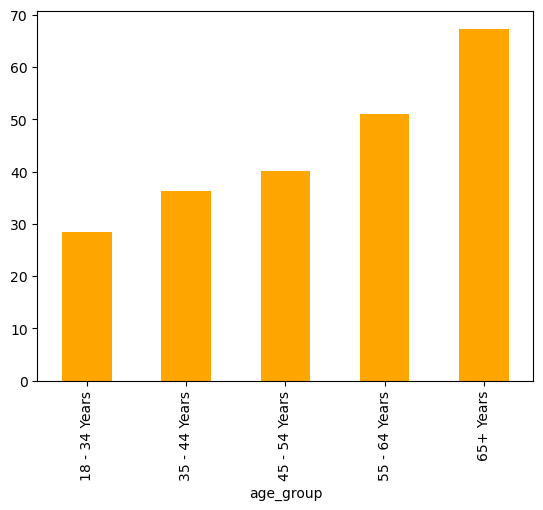

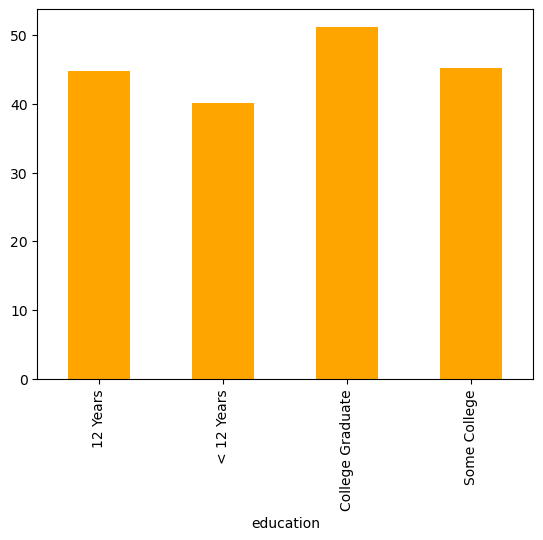

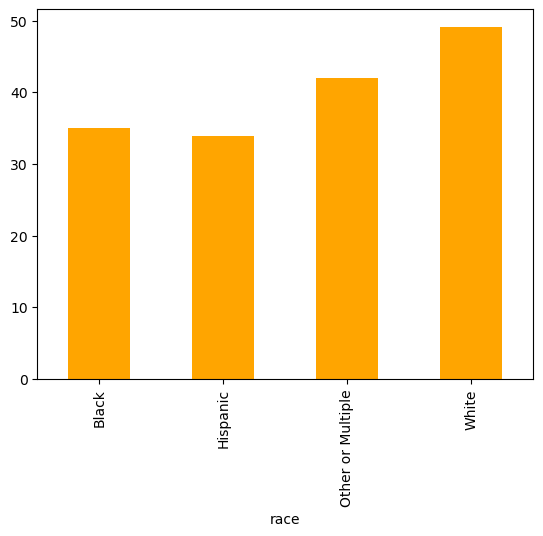

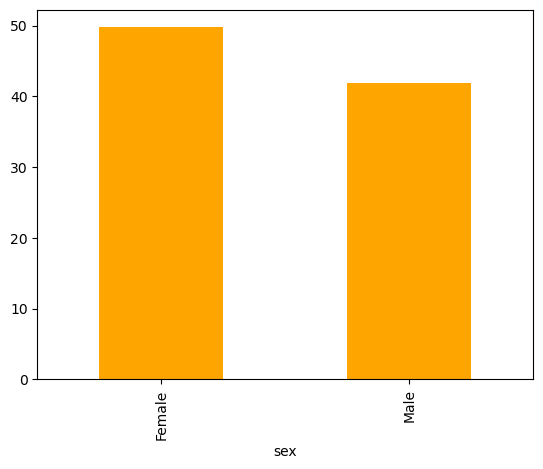

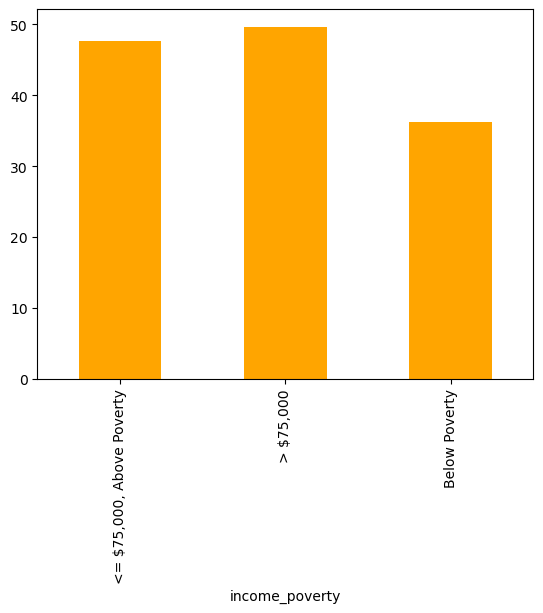

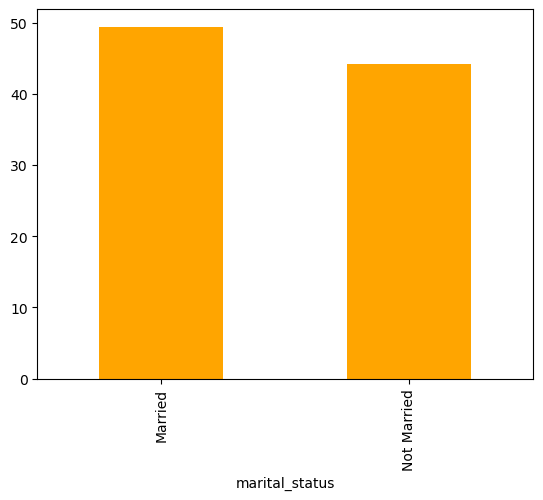

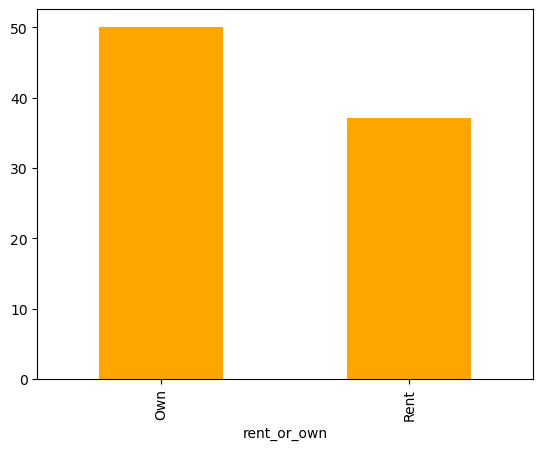

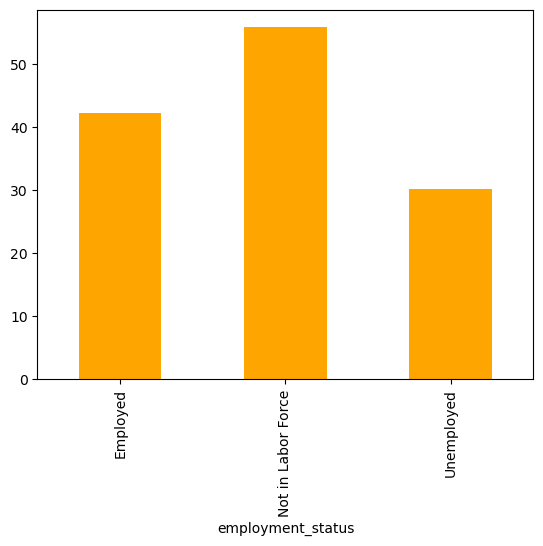

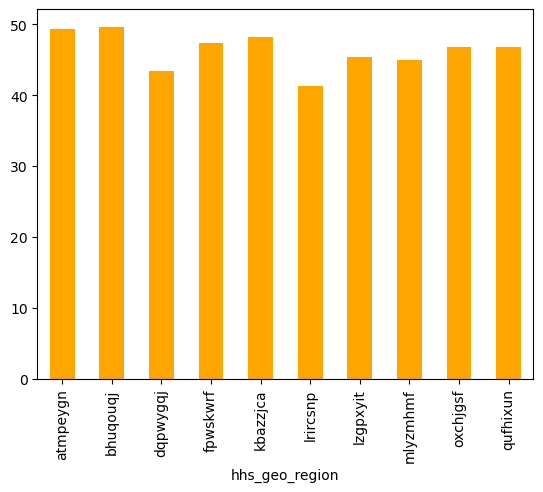

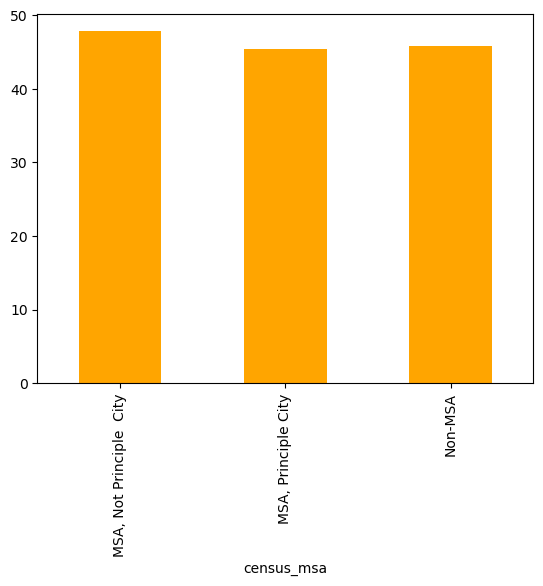

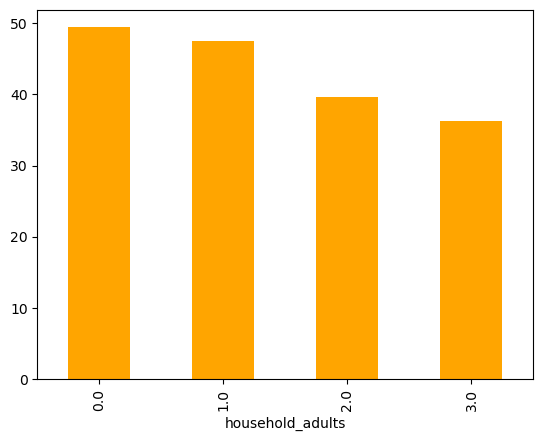

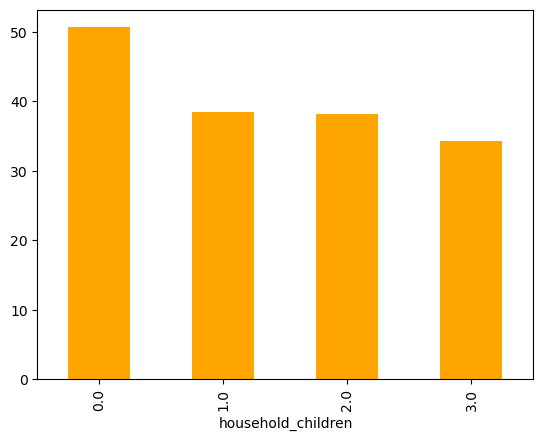

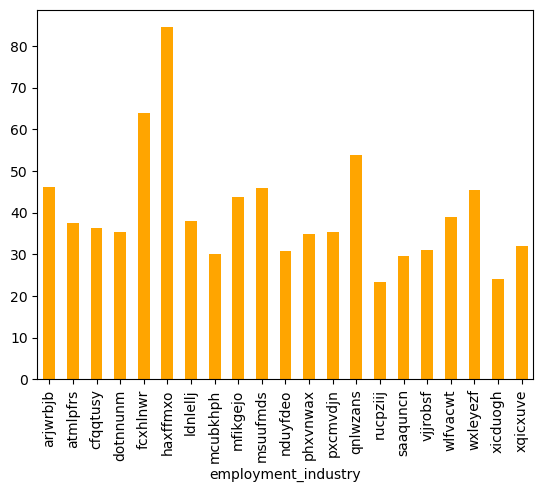

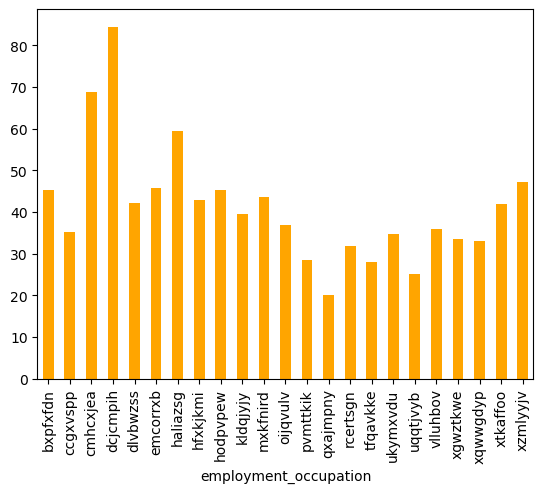

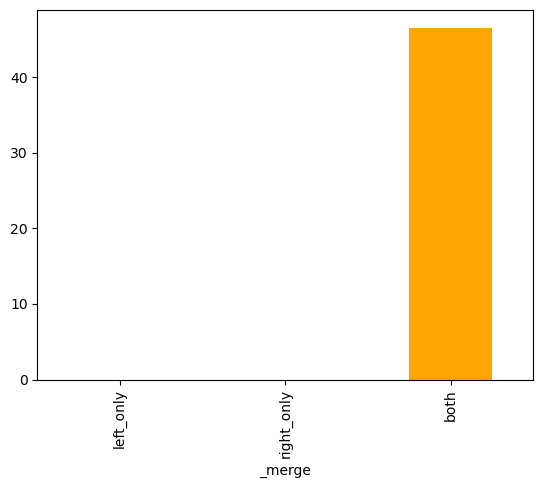

In [106]:
for i in df.columns :
    hn = df.groupby(i)['seasonal_vaccine'].sum().sort_index()
    ct = df[i].value_counts().sort_index()
    hn = pd.DataFrame(hn)
    ct = pd.DataFrame(ct)
    hn_ct = hn.merge(ct,left_index = True, right_index = True)
    hn_ct['percentage'] = hn_ct['seasonal_vaccine'] / hn_ct['count'] * 100
    hn_ct['percentage'].plot(kind = 'bar', color = 'orange')
    plt.show()
    

## Extra Analysis

There is no significant effects on vaccination by regions

In [107]:
# There are no missing values in columns below
df[['hhs_geo_region','seasonal_vaccine', 'h1n1_vaccine']].isna().sum()

hhs_geo_region      0
seasonal_vaccine    0
h1n1_vaccine        0
dtype: int64

### Seansonal vaccination

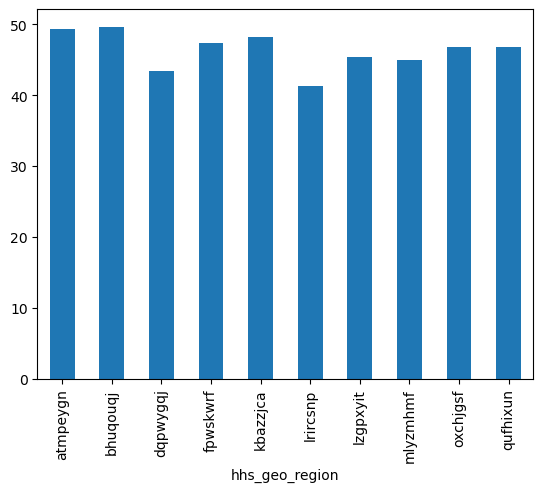

In [108]:
# How many seasonal vaccinations by regions
rg_sv = df.groupby('hhs_geo_region')['seasonal_vaccine'].sum().sort_index()

# How many respondent by regions
rg_ct = df['hhs_geo_region'].value_counts().sort_index()

# Transform to DataFrame and merge
rg_sv = pd.DataFrame(rg_sv)
rg_ct = pd.DataFrame(rg_ct)
rg_sv_ct = rg_sv.merge(rg_ct, on = 'hhs_geo_region')

# Calculation of percentage of seasonal vaccination
rg_sv_ct['percentage'] = rg_sv_ct['seasonal_vaccine'] / rg_sv_ct['count'] * 100

rg_sv_ct['percentage'].plot(kind = 'bar')

plt.show()

### H1N1 vaccination

### Gender

In [109]:
df['employment_status'].value_counts()

employment_status
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: count, dtype: int64

In [110]:
df['employment_industry'].info()

<class 'pandas.core.series.Series'>
Index: 26707 entries, 0 to 26706
Series name: employment_industry
Non-Null Count  Dtype 
--------------  ----- 
13377 non-null  object
dtypes: object(1)
memory usage: 417.3+ KB


In [111]:
df['health_insurance'].value_counts()

health_insurance
1.0    12697
0.0     1736
Name: count, dtype: int64

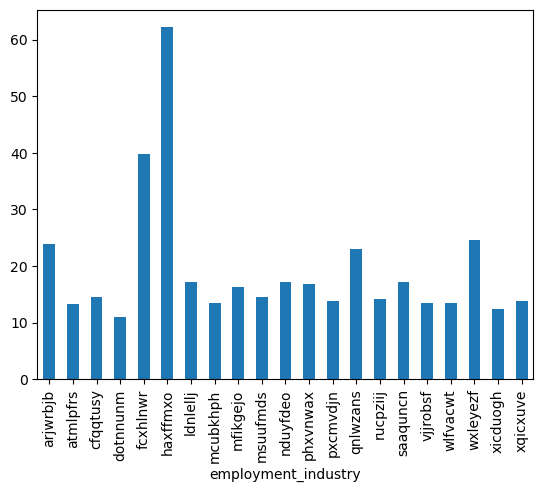

In [112]:
# How many H1N1 vaccinations by regions
hn = df.groupby('employment_industry')['h1n1_vaccine'].sum().sort_index()

# How many respondent by regions
ct = df['employment_industry'].value_counts().sort_index()

# Transform to DataFrame and merge
hn = pd.DataFrame(hn)
ct = pd.DataFrame(ct)
hn_ct = hn.merge(ct, on = 'employment_industry')

# Calculation of percentage of seasonal vaccination
hn_ct['percentage'] = hn_ct['h1n1_vaccine'] / hn_ct['count'] * 100

hn_ct['percentage'].plot(kind = 'bar')

plt.show()

In [113]:
ei_hn = df.groupby('employment_industry')['h1n1_vaccine'].sum().sort_index()
ei_hn

employment_industry
arjwrbjb    208
atmlpfrs    124
cfqqtusy     47
dotnnunm     22
fcxhlnwr    982
haxffmxo     92
ldnlellj    212
mcubkhph     37
mfikgejo    100
msuufmds     18
nduyfdeo     49
phxvnwax     15
pxcmvdjn    143
qnlwzans      3
rucpziij     74
saaquncn     58
vjjrobsf     71
wlfvacwt     29
wxleyezf    443
xicduogh    105
xqicxuve     71
Name: h1n1_vaccine, dtype: int64

In [114]:
ei_ct = df['employment_industry'].value_counts().sort_index()
ei_ct

employment_industry
arjwrbjb     871
atmlpfrs     926
cfqqtusy     325
dotnnunm     201
fcxhlnwr    2468
haxffmxo     148
ldnlellj    1231
mcubkhph     275
mfikgejo     614
msuufmds     124
nduyfdeo     286
phxvnwax      89
pxcmvdjn    1037
qnlwzans      13
rucpziij     523
saaquncn     338
vjjrobsf     527
wlfvacwt     215
wxleyezf    1804
xicduogh     851
xqicxuve     511
Name: count, dtype: int64

In [115]:
ei_ct.sum()

13377

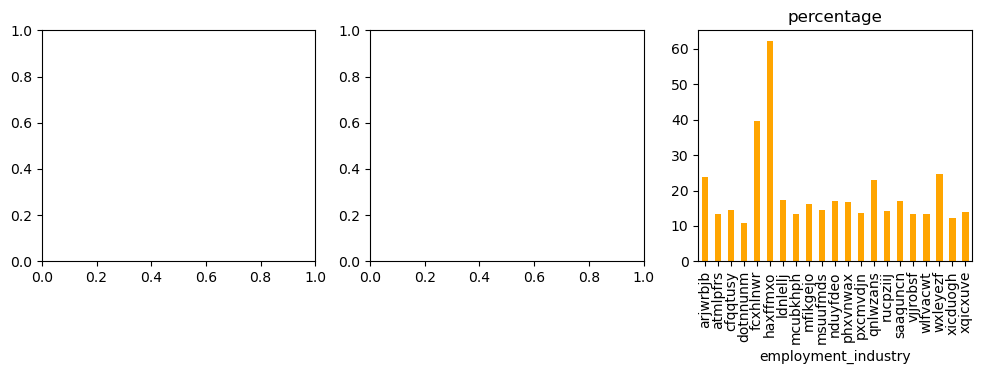

In [116]:
fig, axes = plt.subplots(ncols = 3, figsize = (12,3))
axes[0] = df[i].value_counts(normalize = True).sort_index().plot(kind='bar')
axes[1] = hn_ct['percentage'].plot(kind = 'bar', color = 'r')
axes[2] = hn_ct['percentage'].plot(kind = 'bar', color = 'orange')

plt.title('percentage')

plt.show()

# Machine Learning

In [117]:
# import packages
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

import seaborn as sns

## Grouping variables

In [118]:
df['census_msa'].value_counts()

census_msa
MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: count, dtype: int64

In [119]:
behavioral = ['behavioral_antiviral_meds', 
              'behavioral_avoidance',
              'behavioral_face_mask', 
              'behavioral_wash_hands',
              'behavioral_large_gatherings', 
              'behavioral_outside_home',
              'behavioral_touch_face']

In [120]:
opinion = ['opinion_h1n1_vacc_effective', 
           'opinion_h1n1_risk',
           'opinion_h1n1_sick_from_vacc', 
           'opinion_seas_vacc_effective',
           'opinion_seas_risk', 
           'opinion_seas_sick_from_vacc'] # drop h1n1 related

In [121]:
extra = ['h1n1_concern', 
         'h1n1_knowledge',
         'doctor_recc_h1n1', 
         'doctor_recc_seasonal',
         'chronic_med_condition'] # drop doctor_recc_seasonal

In [122]:
background = ['child_under_6_months',
              'age_group',
              'education', 
              'race', 
              'sex',
              'marital_status',
              'household_adults', 
              'household_children',
              'health_worker'] # drop health_worker, 'child_under_6_months'

In [123]:
economical = ['health_insurance',
              'income_poverty',
              'rent_or_own', 
              'employment_status',
              'employment_industry',
              'employment_occupation'] # drop health_insurance,'employment_industry','employment_occupation'

In [124]:
location = ['hhs_geo_region', 
            'census_msa'] # drop census_msa

## Decision tree for behavioral variables

In [125]:
bh_df = df[behavioral + ['seasonal_vaccine']]

In [126]:
bh_dropped = bh_df.dropna()

In [127]:
bh_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26146 entries, 0 to 26706
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26146 non-null  float64
 1   behavioral_avoidance         26146 non-null  float64
 2   behavioral_face_mask         26146 non-null  float64
 3   behavioral_wash_hands        26146 non-null  float64
 4   behavioral_large_gatherings  26146 non-null  float64
 5   behavioral_outside_home      26146 non-null  float64
 6   behavioral_touch_face        26146 non-null  float64
 7   seasonal_vaccine             26146 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.8 MB


In [128]:
X = bh_dropped.drop(labels = ['seasonal_vaccine'], axis = 1)
y = bh_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)

# Fit to train samples
tree_clf.fit(X_train, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_test)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

Accuracy: 54.902860639437044


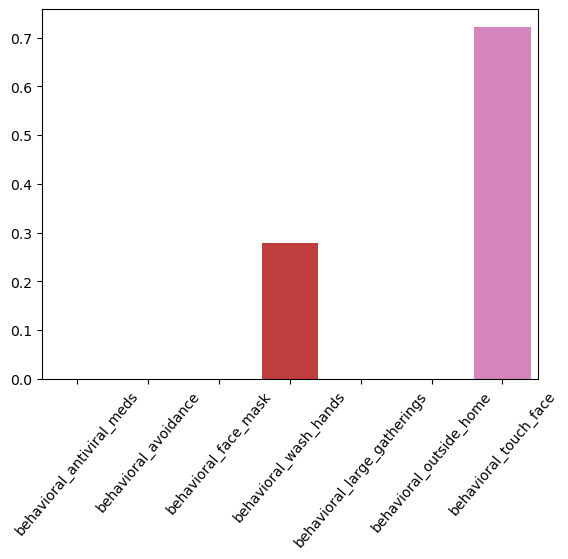

In [129]:
# Showing feature importances by the Decision Tree
sns.barplot(x = bh_dropped.columns[:7], y = tree_clf.feature_importances_)
plt.xticks(rotation = 50)
plt.show()

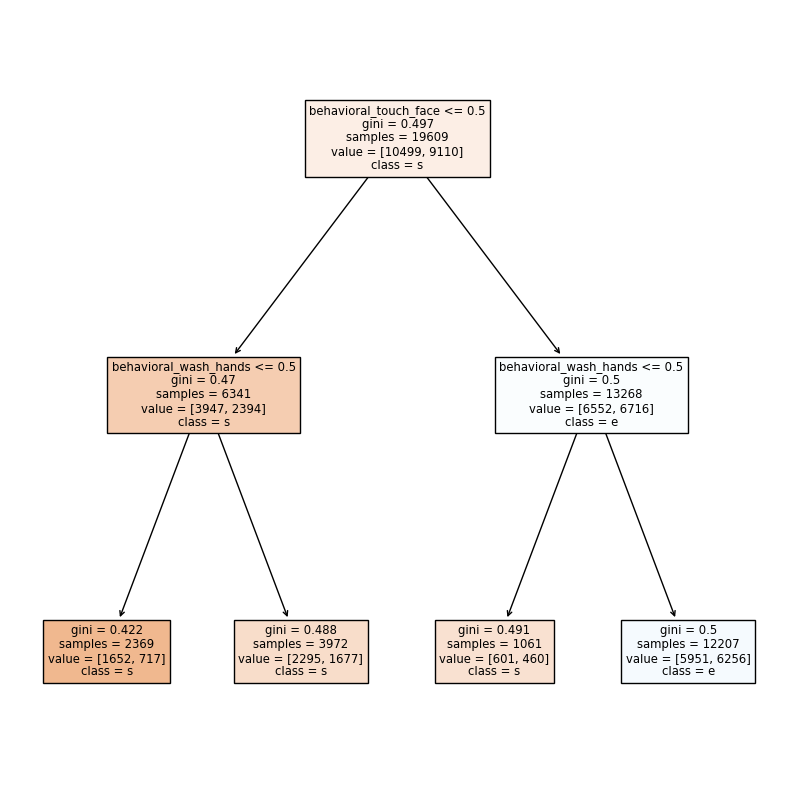

In [130]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (10,10))
plot_tree(tree_clf, feature_names = list(bh_dropped.columns[:7]), class_names = list(bh_dropped.columns[7]), filled = True );

## Decision tree for opinion variables

In [131]:
op_df = df[opinion + ['seasonal_vaccine']]

In [132]:
op_dropped = op_df.dropna()

In [133]:
X = op_dropped.drop(labels = ['seasonal_vaccine'], axis = 1)
y = op_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)

# Fit to train samples
tree_clf.fit(X_train, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_test)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

Accuracy: 70.91216735886786


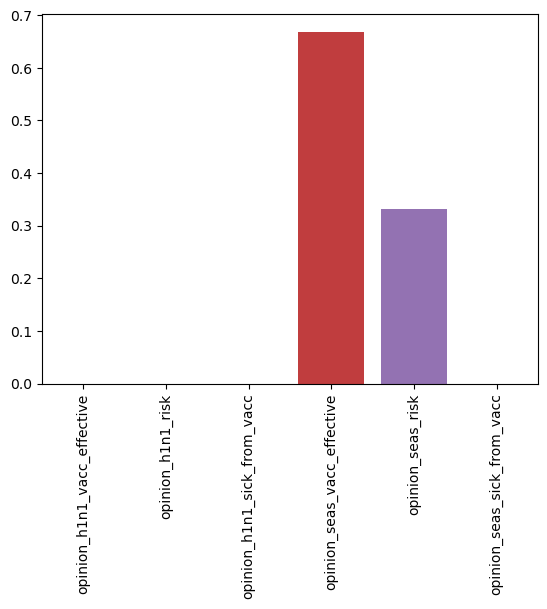

In [134]:
# Showing feature importances by the Decision Tree
sns.barplot(x = op_dropped.columns[:-1], y = tree_clf.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

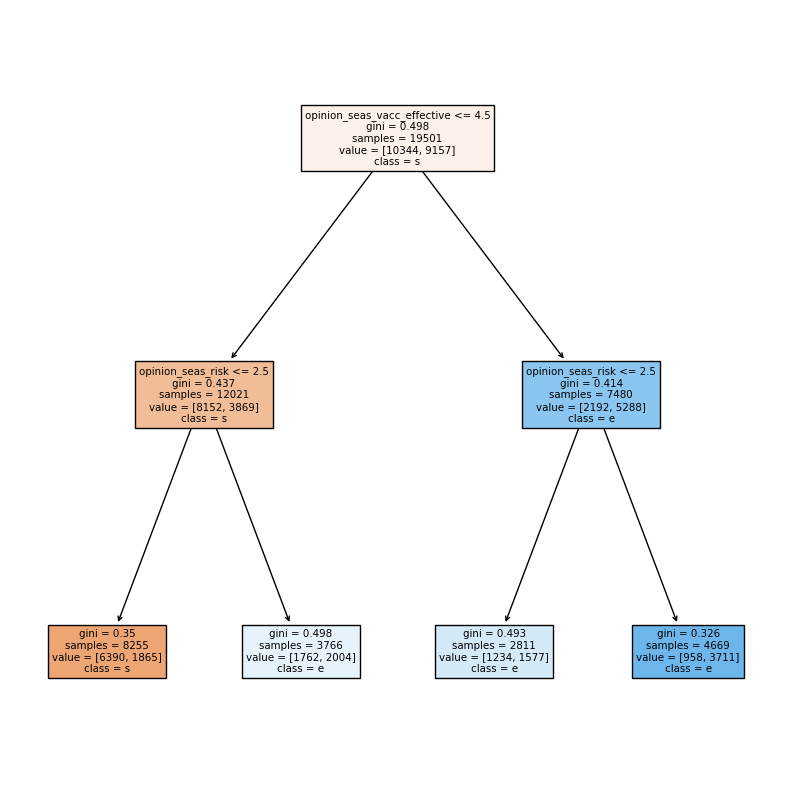

In [135]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (10,10))
plot_tree(tree_clf, feature_names = list(op_dropped.columns[:-1]), class_names = list(op_dropped.columns[-1]), filled = True );

## Decision tree for extra variables

In [136]:
et_df = df[extra + ['seasonal_vaccine']]

In [137]:
et_dropped = et_df.dropna()

In [138]:
X = et_dropped.drop(labels = ['seasonal_vaccine'], axis = 1)
y = et_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)

# Fit to train samples
tree_clf.fit(X_train, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_test)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

Accuracy: 68.21259309410969


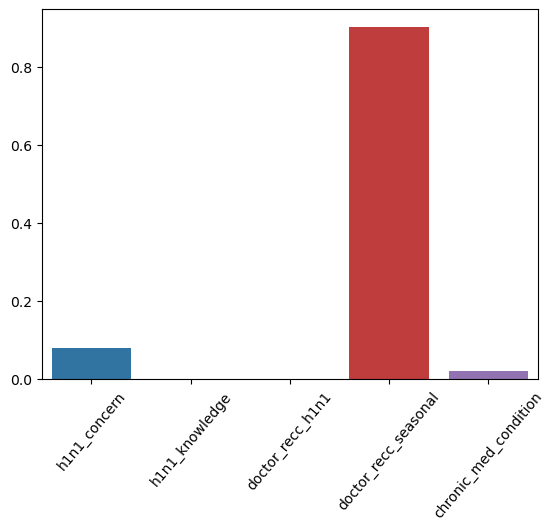

In [139]:
# Showing feature importances by the Decision Tree
sns.barplot(x = et_dropped.columns[:-1], y = tree_clf.feature_importances_)
plt.xticks(rotation = 50)
plt.show()

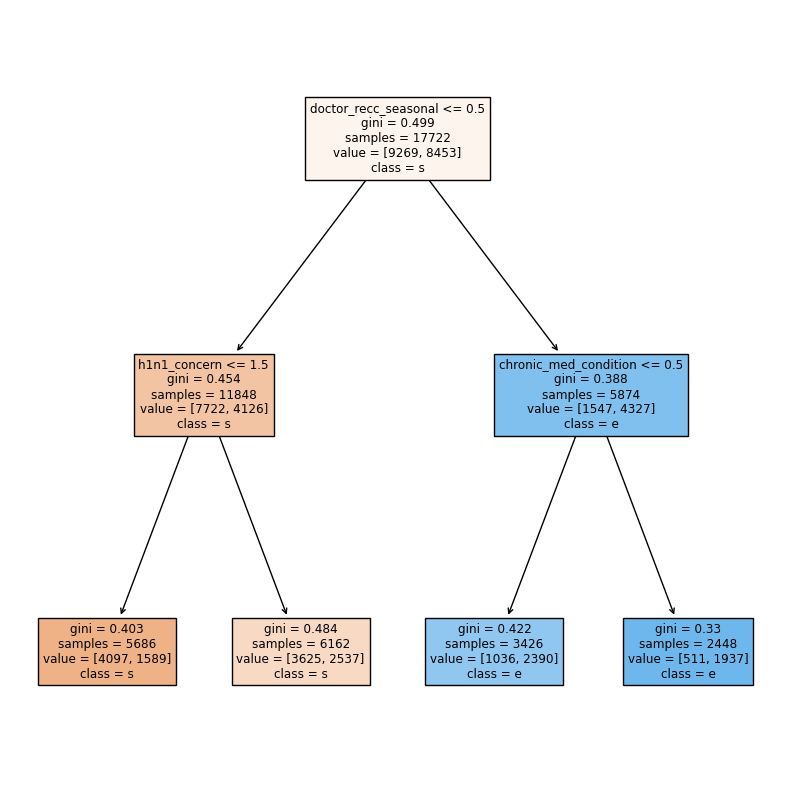

In [140]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (10,10))
plot_tree(tree_clf, feature_names = list(et_dropped.columns[:-1]), class_names = list(et_dropped.columns[-1]), filled = True );

## Decision tree of behavioral, opinion, and extra

In [141]:
boe_df = df[behavioral+opinion+extra+['seasonal_vaccine']]

In [142]:
boe_dropped = boe_df.dropna()

In [143]:
X = boe_dropped.drop(labels = ['seasonal_vaccine'], axis = 1)
y = boe_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 5, random_state = 42)

# Fit to train samples
tree_clf.fit(X_train, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_test)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

Accuracy: 74.63177958759314


In [144]:
boe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26636 non-null  float64
 1   behavioral_avoidance         26499 non-null  float64
 2   behavioral_face_mask         26688 non-null  float64
 3   behavioral_wash_hands        26665 non-null  float64
 4   behavioral_large_gatherings  26620 non-null  float64
 5   behavioral_outside_home      26625 non-null  float64
 6   behavioral_touch_face        26579 non-null  float64
 7   opinion_h1n1_vacc_effective  26316 non-null  float64
 8   opinion_h1n1_risk            26319 non-null  float64
 9   opinion_h1n1_sick_from_vacc  26312 non-null  float64
 10  opinion_seas_vacc_effective  26245 non-null  float64
 11  opinion_seas_risk            26193 non-null  float64
 12  opinion_seas_sick_from_vacc  26170 non-null  float64
 13  h1n1_concern         

In [145]:
boe_df['doctor_recc_seasonal'].value_counts()

doctor_recc_seasonal
0.0    16453
1.0     8094
Name: count, dtype: int64

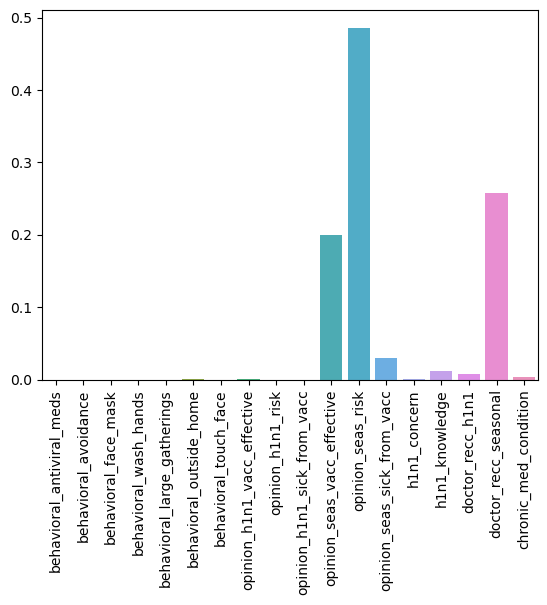

In [146]:
# Showing feature importances by the Decision Tree
sns.barplot(x = boe_dropped.columns[:-1], y = tree_clf.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

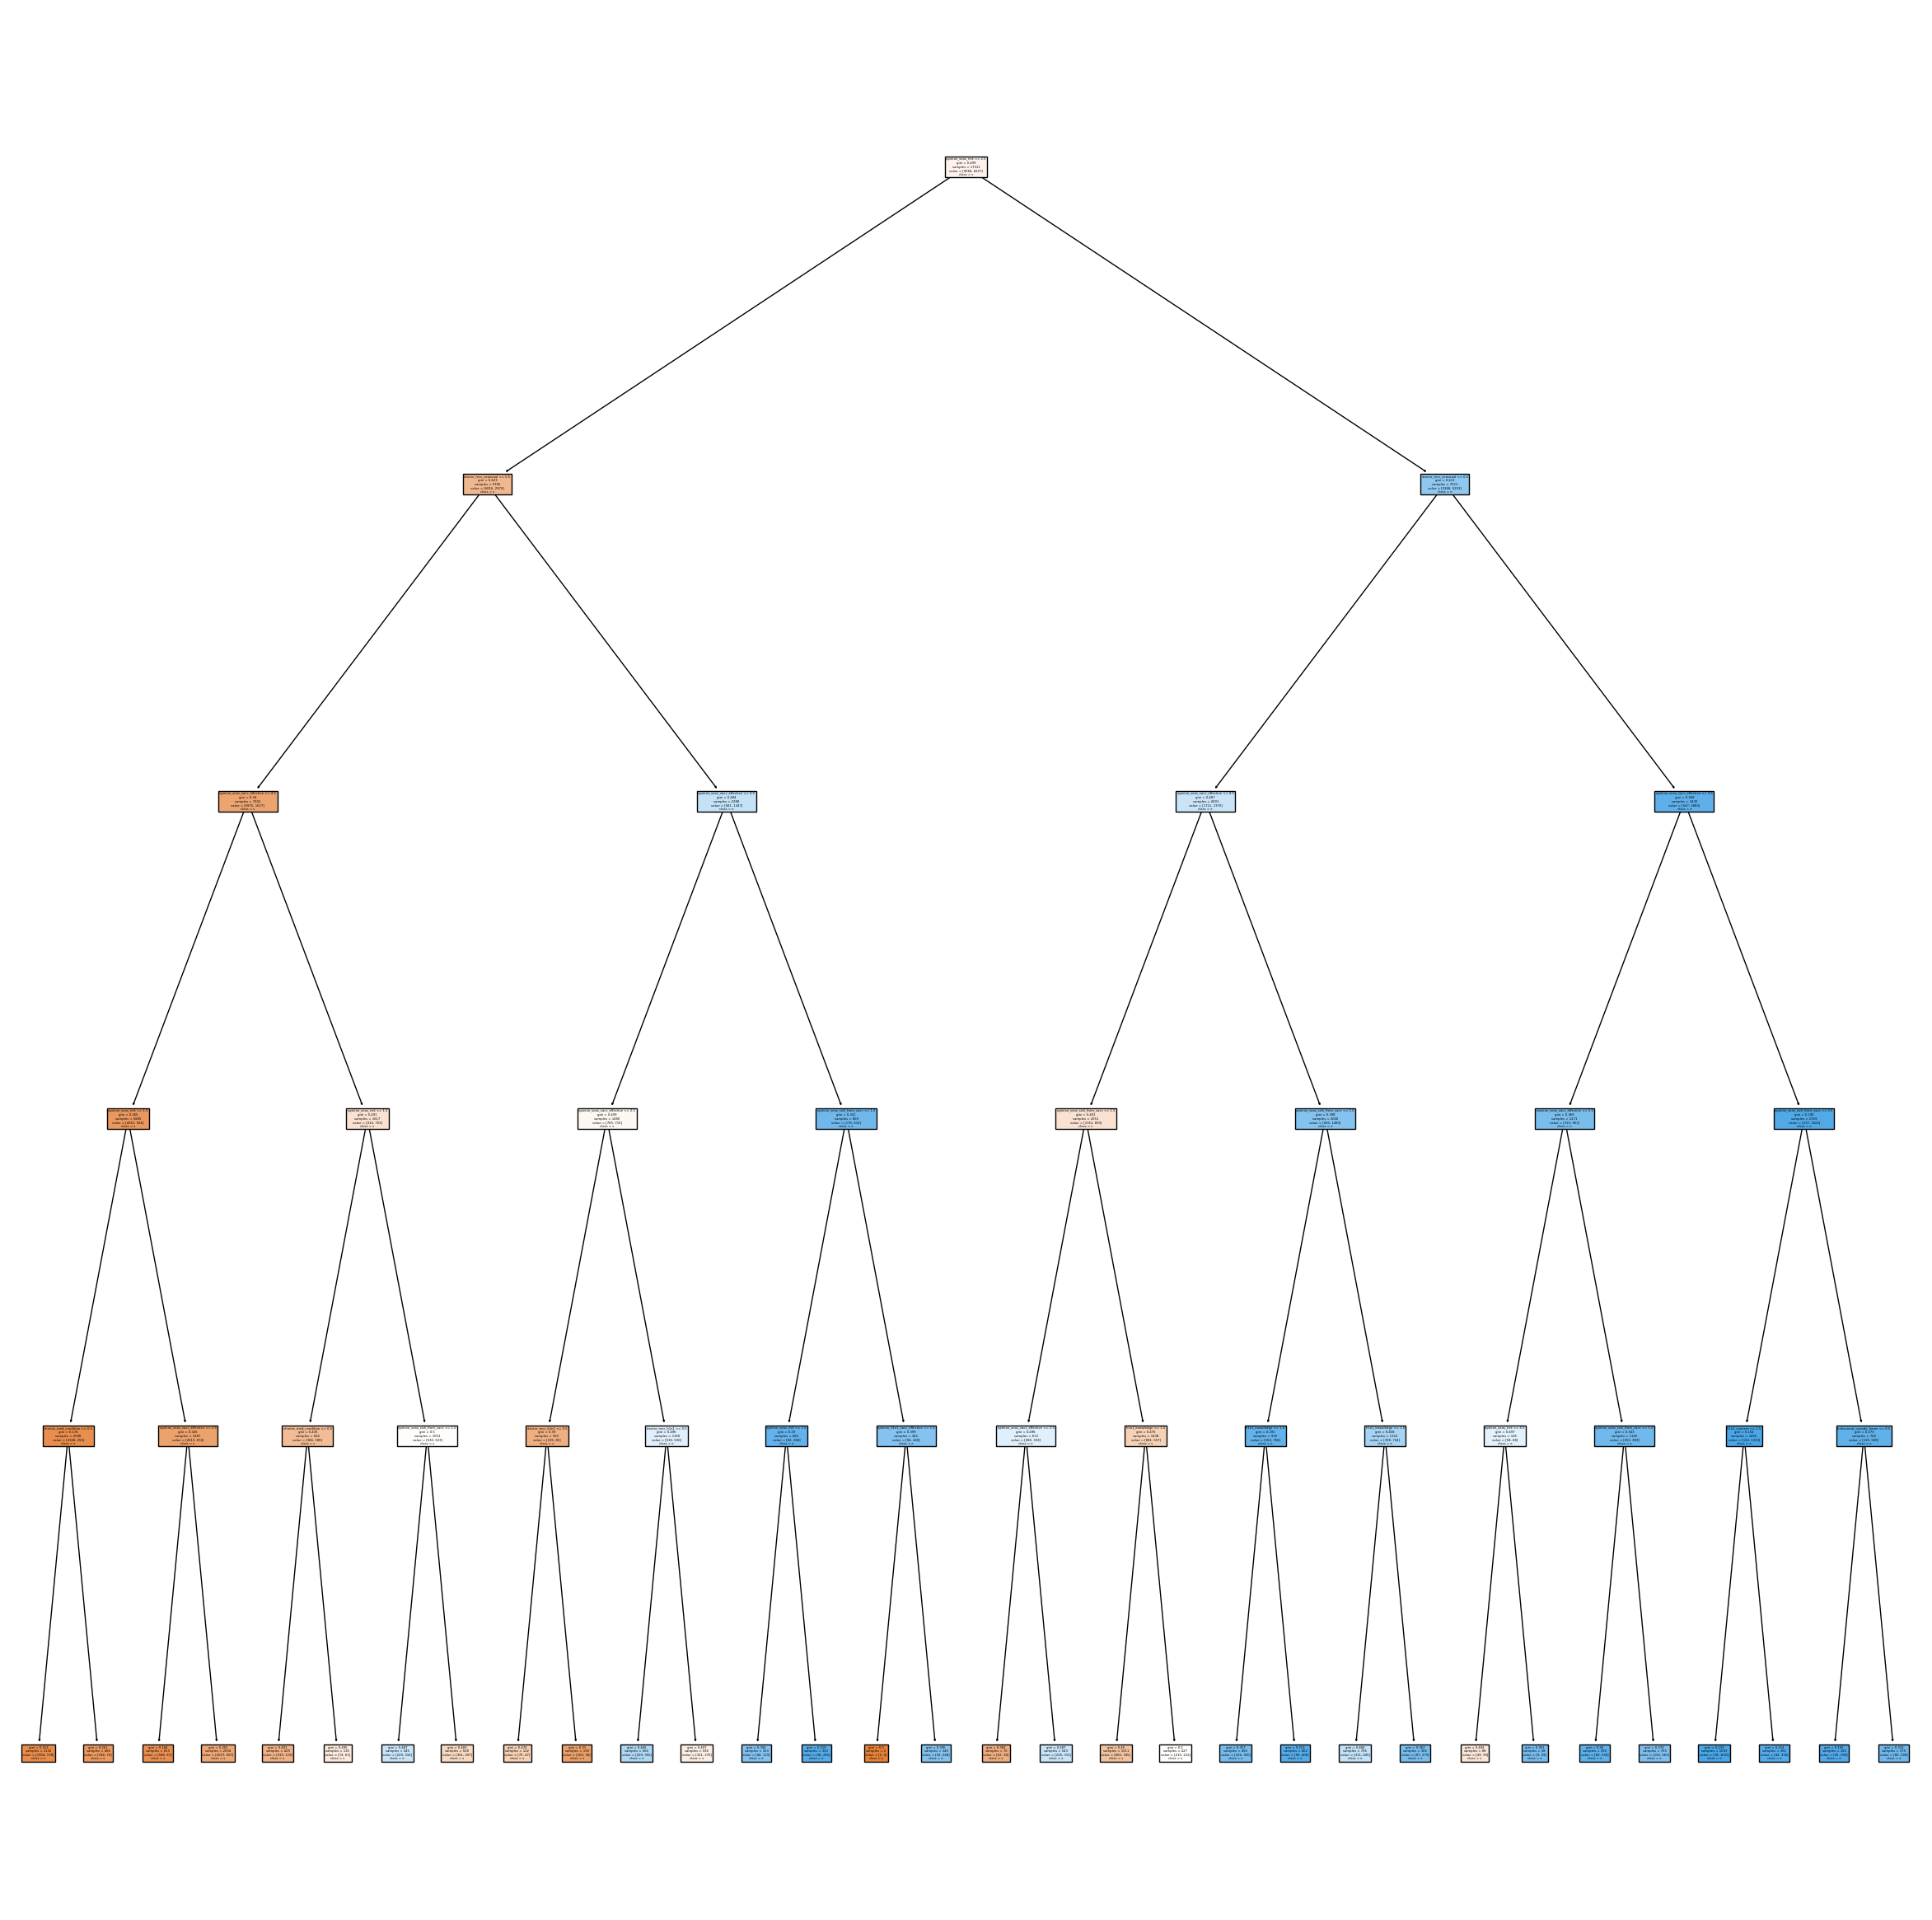

In [147]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, feature_names = list(boe_dropped.columns[:-1]), class_names = list(boe_dropped.columns[-1]), filled = True );

# features we want to focus

In [148]:
df.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', '_merge'],
      dtype='object')

In [149]:
wf = ['doctor_recc_seasonal', 
      'opinion_seas_vacc_effective',
      'opinion_seas_risk',
      'opinion_seas_sick_from_vacc',
      'age_group',
      'education',
      'race',
      'sex',
      'income_poverty',
      'marital_status',
      'hhs_geo_region',
      'household_children',
      'seasonal_vaccine']
wf_df = df[wf]

In [150]:
wf_dropped = wf_df.dropna()

In [151]:
wf_dropped.columns

Index(['doctor_recc_seasonal', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'hhs_geo_region', 'household_children', 'seasonal_vaccine'],
      dtype='object')

In [152]:
wf_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20436 entries, 0 to 26706
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   doctor_recc_seasonal         20436 non-null  float64
 1   opinion_seas_vacc_effective  20436 non-null  float64
 2   opinion_seas_risk            20436 non-null  float64
 3   opinion_seas_sick_from_vacc  20436 non-null  float64
 4   age_group                    20436 non-null  object 
 5   education                    20436 non-null  object 
 6   race                         20436 non-null  object 
 7   sex                          20436 non-null  object 
 8   income_poverty               20436 non-null  object 
 9   marital_status               20436 non-null  object 
 10  hhs_geo_region               20436 non-null  object 
 11  household_children           20436 non-null  float64
 12  seasonal_vaccine             20436 non-null  int64  
dtypes: float64(5), int64(

# OrdinalEncoder vs OneHotEncoder

## OrdinalEncoder

### OrdinalEncoder for a list we want to focus

In [153]:
from sklearn.preprocessing import OrdinalEncoder

In [154]:
X = wf_dropped.drop('seasonal_vaccine', axis =1)
y = wf_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#OrdinalEncoder
# Create an ordinal encoder instance
encoder = OrdinalEncoder()
# Fit and transform the data
X_tr_cd = encoder.fit_transform(X_train)
X_tt_cd = encoder.transform(X_test)
# Access the categories mapping
categories_mapping = {feature: encoder.categories_[i].tolist() for i, feature in enumerate(X_train.columns)}
# Display the mapping
print(categories_mapping)


# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 5, random_state = 42)

# Fit to train samples
tree_clf.fit(X_tr_cd, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_tt_cd)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

{'doctor_recc_seasonal': [0.0, 1.0], 'opinion_seas_vacc_effective': [1.0, 2.0, 3.0, 4.0, 5.0], 'opinion_seas_risk': [1.0, 2.0, 3.0, 4.0, 5.0], 'opinion_seas_sick_from_vacc': [1.0, 2.0, 3.0, 4.0, 5.0], 'age_group': ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years'], 'education': ['12 Years', '< 12 Years', 'College Graduate', 'Some College'], 'race': ['Black', 'Hispanic', 'Other or Multiple', 'White'], 'sex': ['Female', 'Male'], 'income_poverty': ['<= $75,000, Above Poverty', '> $75,000', 'Below Poverty'], 'marital_status': ['Married', 'Not Married'], 'hhs_geo_region': ['atmpeygn', 'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca', 'lrircsnp', 'lzgpxyit', 'mlyzmhmf', 'oxchjgsf', 'qufhixun'], 'household_children': [0.0, 1.0, 2.0, 3.0]}
Accuracy: 75.53337247993737


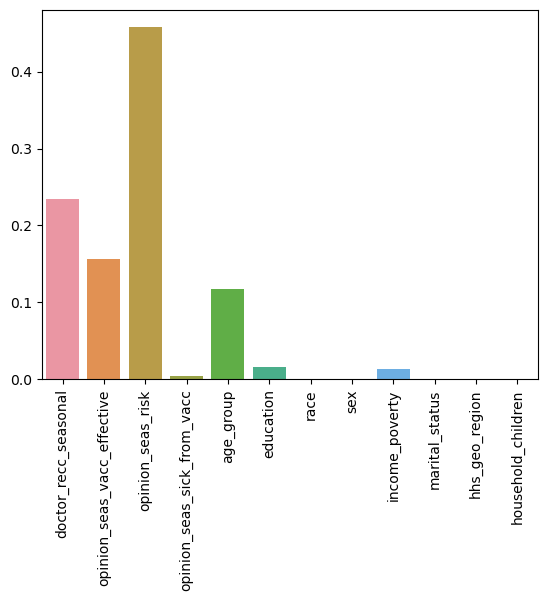

In [155]:
# Showing feature importances by the Decision Tree
sns.barplot(x = wf_dropped.columns[:-1], y = tree_clf.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

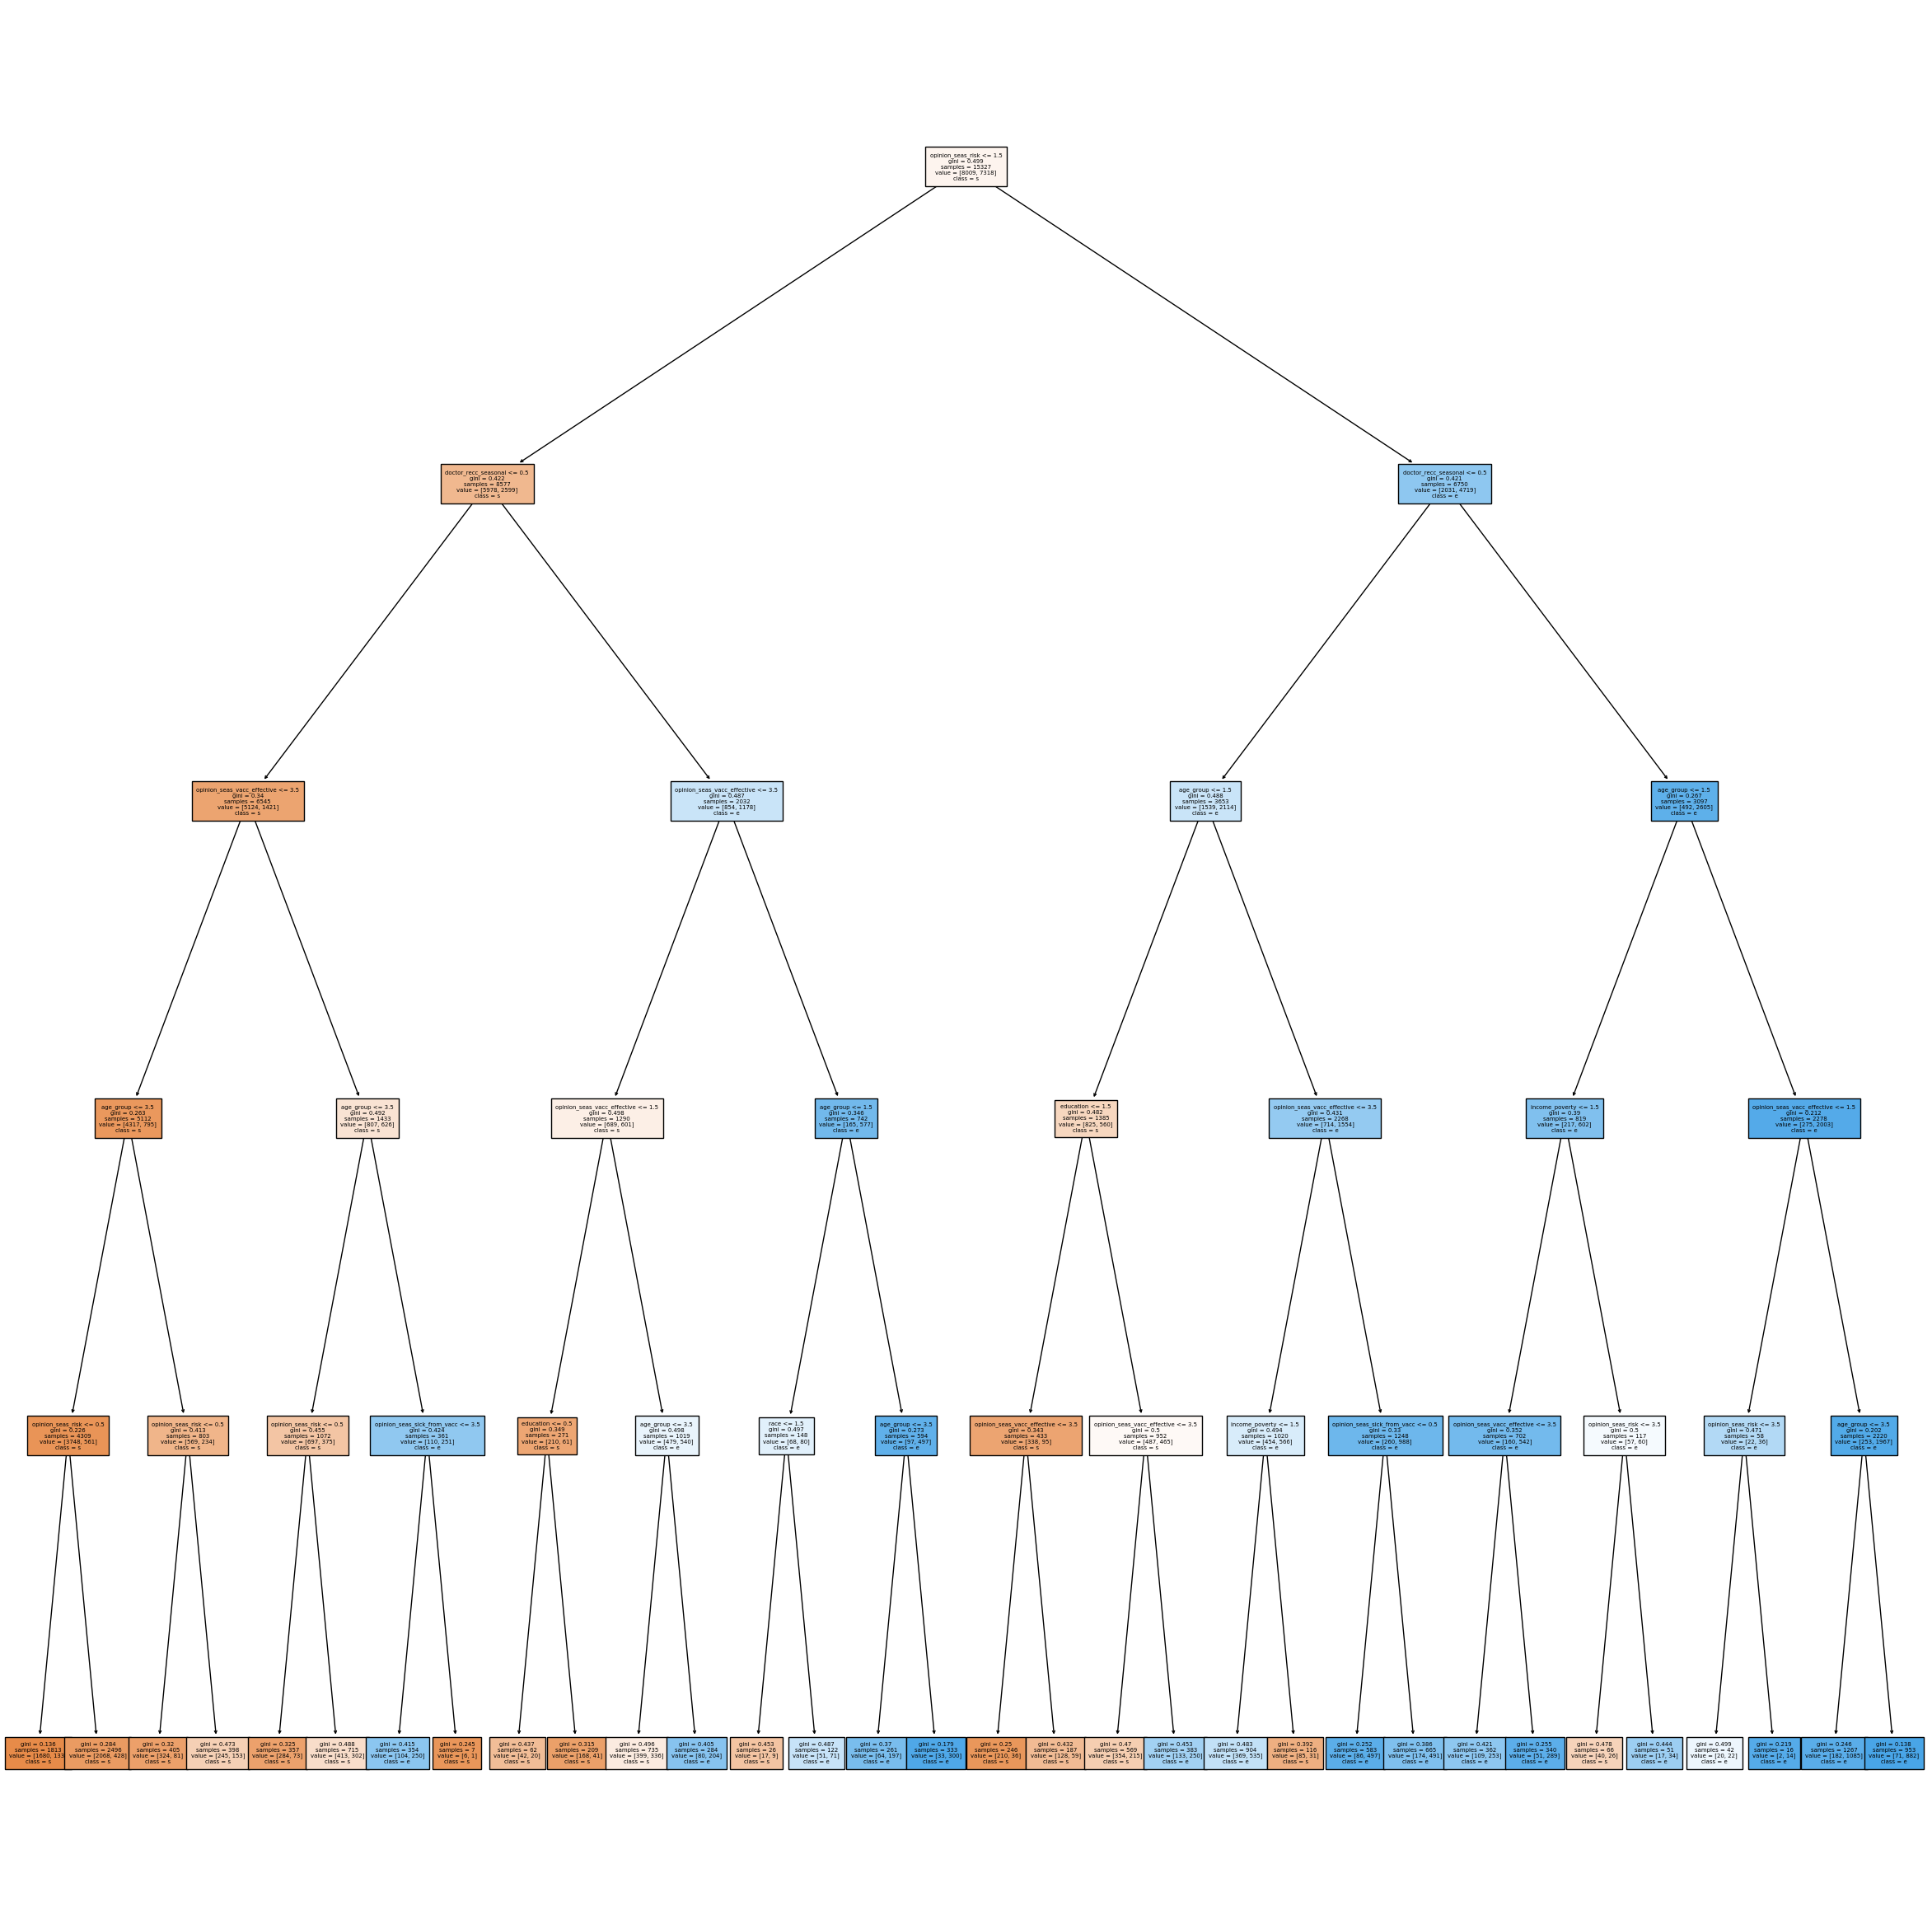

In [156]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, 
          feature_names = list(wf_dropped.columns[:-1]), 
          class_names = list(wf_dropped.columns[-1]), 
          filled = True,
          fontsize = 5
         );

### Background features masked by strong features

In [157]:
wf = ['age_group',
      'education',
      'race',
      'sex',
      'income_poverty',
      'marital_status',
      'hhs_geo_region',
      'household_children',
      'seasonal_vaccine']
wf_df = df[wf]

In [158]:
wf_dropped = wf_df.dropna()

In [159]:
X = wf_dropped.drop('seasonal_vaccine', axis =1)
y = wf_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#OrdinalEncoder
# Create an ordinal encoder instance
encoder = OrdinalEncoder()
# Fit and transform the data
X_tr_cd = encoder.fit_transform(X_train)
X_tt_cd = encoder.transform(X_test)
# Access the categories mapping
categories_mapping = {feature: encoder.categories_[i].tolist() for i, feature in enumerate(X_train.columns)}
# Display the mapping
print(categories_mapping)


# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

# Fit to train samples
tree_clf.fit(X_tr_cd, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_tt_cd)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

{'age_group': ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years'], 'education': ['12 Years', '< 12 Years', 'College Graduate', 'Some College'], 'race': ['Black', 'Hispanic', 'Other or Multiple', 'White'], 'sex': ['Female', 'Male'], 'income_poverty': ['<= $75,000, Above Poverty', '> $75,000', 'Below Poverty'], 'marital_status': ['Married', 'Not Married'], 'hhs_geo_region': ['atmpeygn', 'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca', 'lrircsnp', 'lzgpxyit', 'mlyzmhmf', 'oxchjgsf', 'qufhixun'], 'household_children': [0.0, 1.0, 2.0, 3.0]}
Accuracy: 62.21056439942113


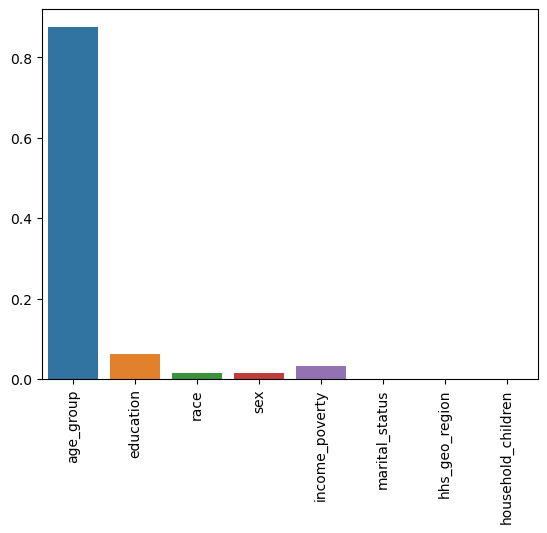

In [160]:
# Showing feature importances by the Decision Tree
sns.barplot(x = wf_dropped.columns[:-1], y = tree_clf.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

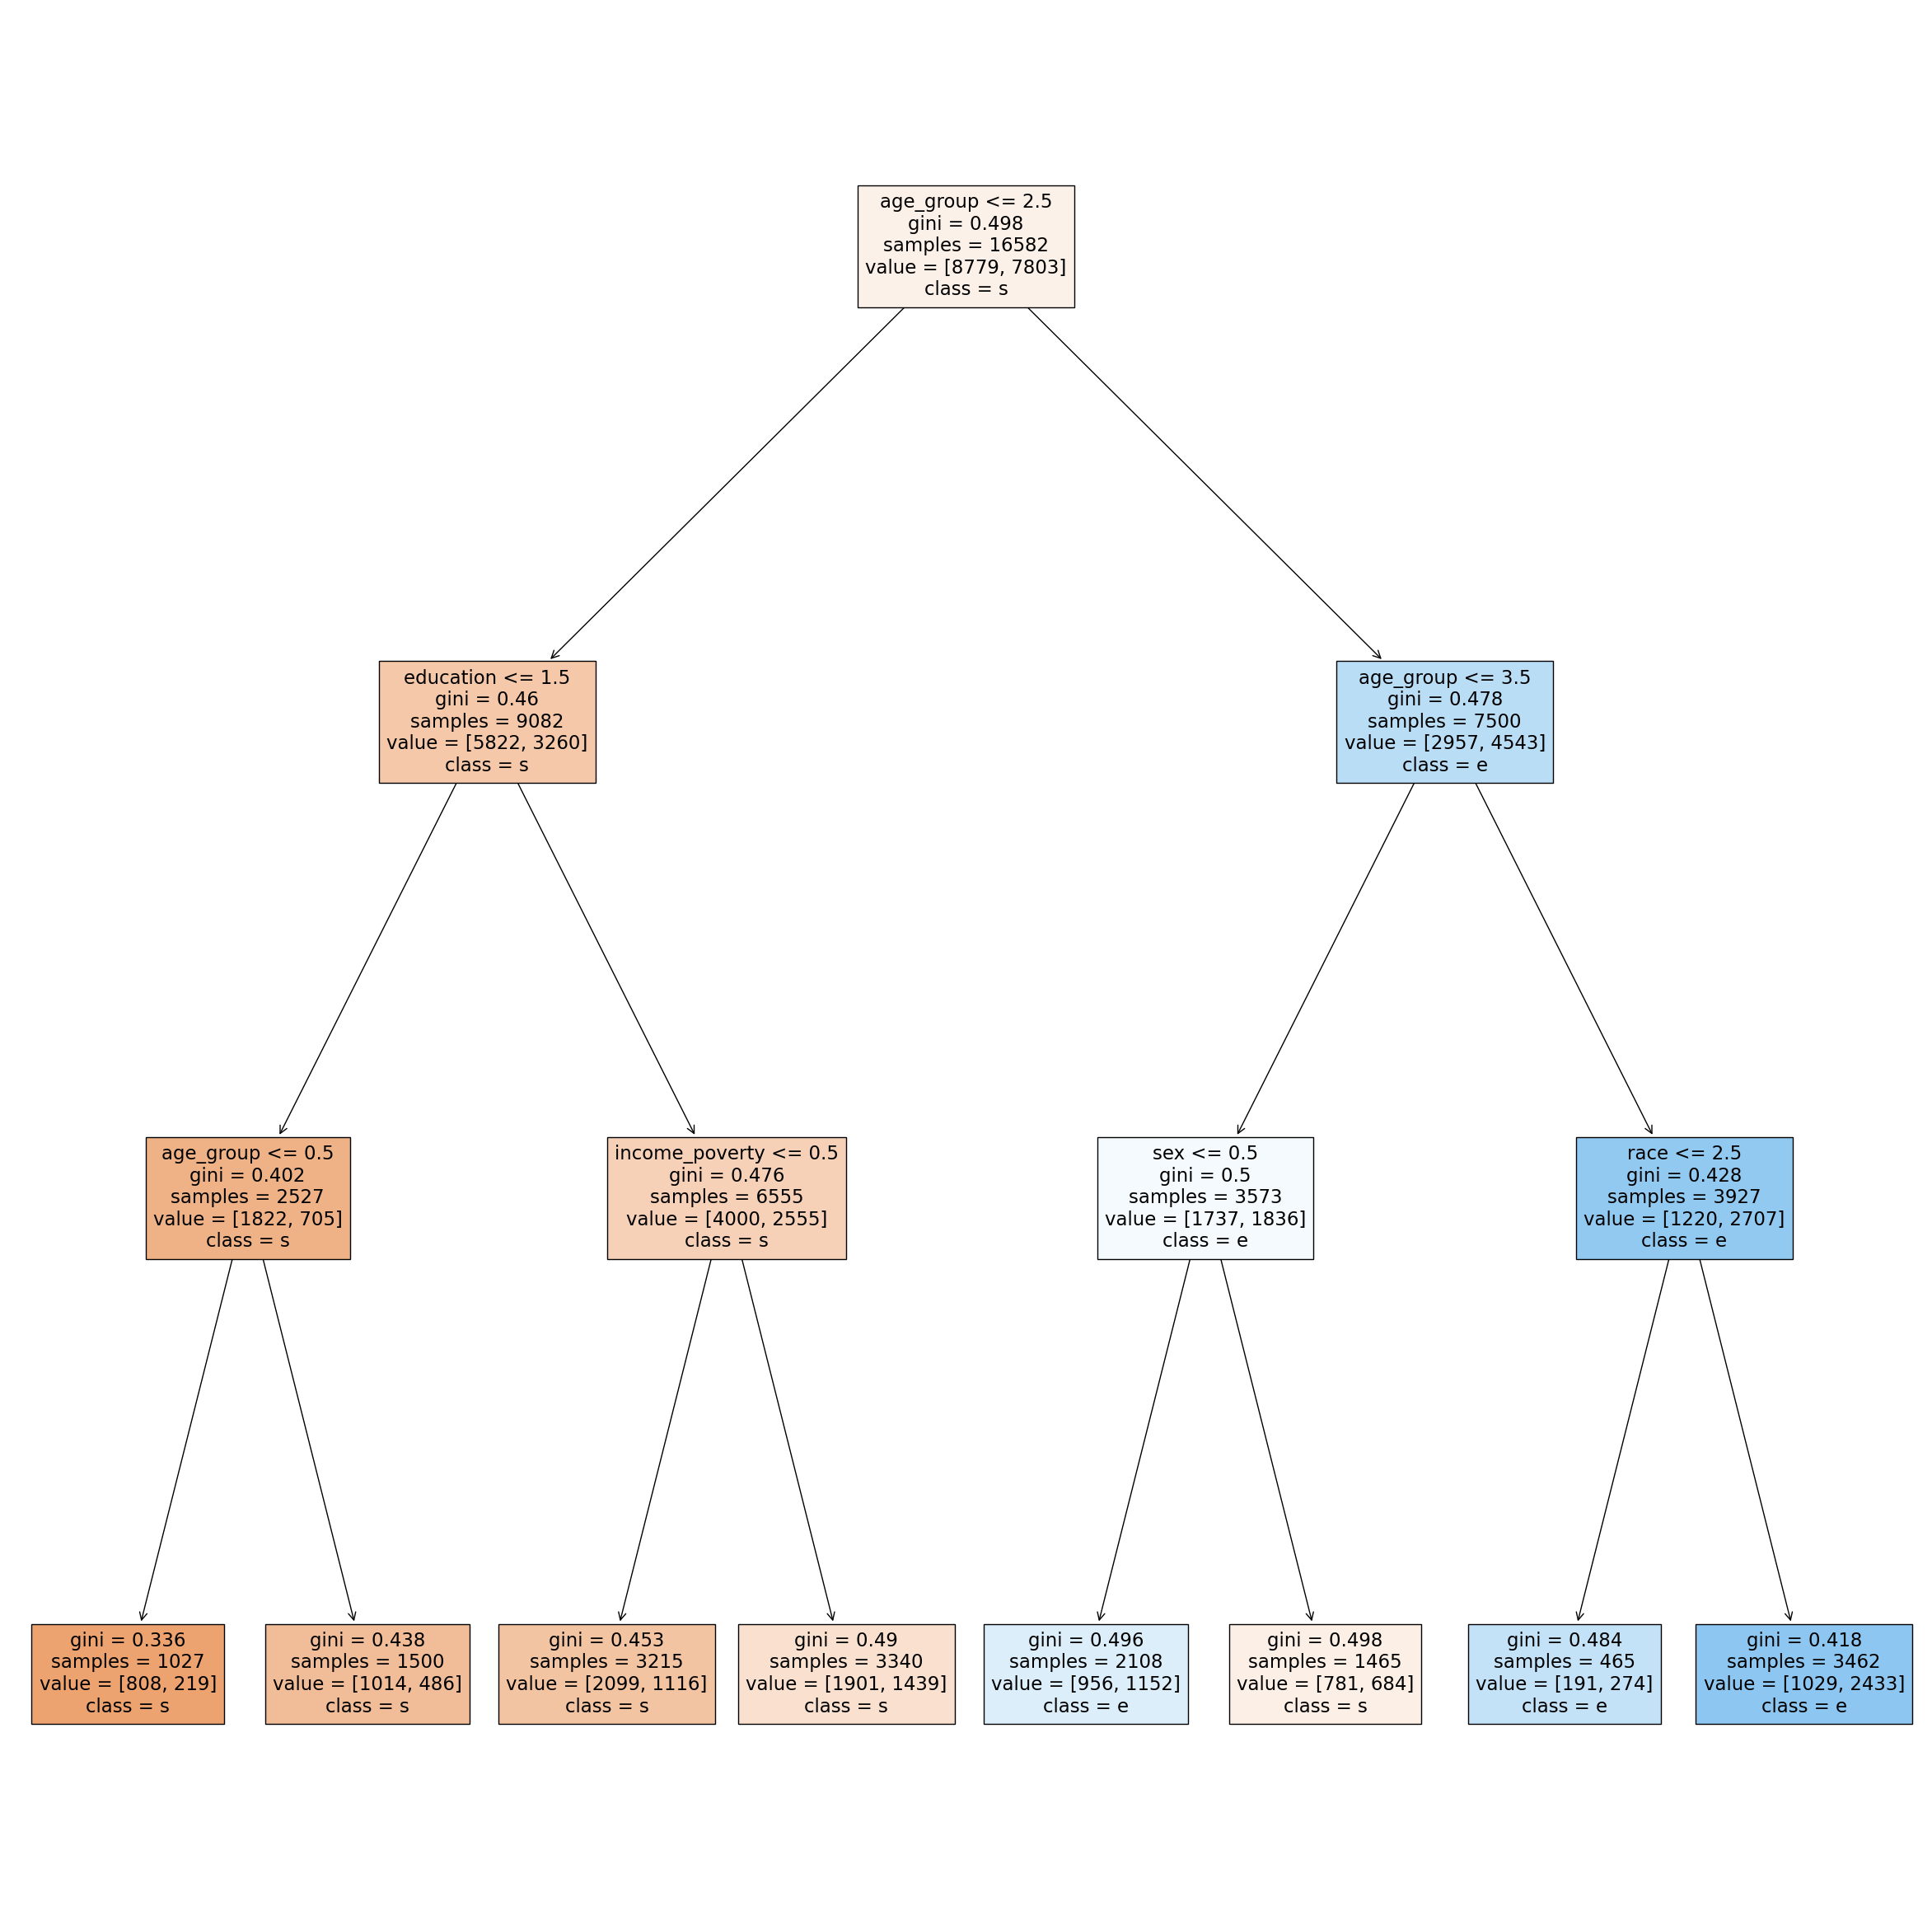

In [161]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, feature_names = list(wf_dropped.columns[:-1]), class_names = list(wf_dropped.columns[-1]), filled = True );

### Under cetain age group (0 - 1 : '18 - 34 Years', '35 - 44 Years')

In [162]:
wf = ['age_group',
      'education',
      'race',
      'sex',
      'income_poverty',
      'marital_status',
      'hhs_geo_region',
      'household_children',
      'seasonal_vaccine']
wf_df = df[wf]

In [163]:
wf_dropped = wf_df.dropna()

In [164]:
wf_dropped['age_group'].value_counts()

age_group
65+ Years        5238
55 - 64 Years    4748
45 - 54 Years    4490
18 - 34 Years    4360
35 - 44 Years    3274
Name: count, dtype: int64

In [165]:
age_cond = (wf_dropped['age_group'] == '18 - 34 Years') | (wf_dropped['age_group'] == '35 - 44 Years')

In [166]:
wf_dropped = wf_dropped[age_cond]

In [167]:
wf_dropped['age_group'].value_counts()

age_group
18 - 34 Years    4360
35 - 44 Years    3274
Name: count, dtype: int64

In [168]:
wf_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7634 entries, 1 to 26705
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age_group           7634 non-null   object 
 1   education           7634 non-null   object 
 2   race                7634 non-null   object 
 3   sex                 7634 non-null   object 
 4   income_poverty      7634 non-null   object 
 5   marital_status      7634 non-null   object 
 6   hhs_geo_region      7634 non-null   object 
 7   household_children  7634 non-null   float64
 8   seasonal_vaccine    7634 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 596.4+ KB


In [169]:
wf_dropped = wf_dropped.drop('age_group', axis =1)

In [170]:
wf_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7634 entries, 1 to 26705
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   education           7634 non-null   object 
 1   race                7634 non-null   object 
 2   sex                 7634 non-null   object 
 3   income_poverty      7634 non-null   object 
 4   marital_status      7634 non-null   object 
 5   hhs_geo_region      7634 non-null   object 
 6   household_children  7634 non-null   float64
 7   seasonal_vaccine    7634 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 536.8+ KB


In [171]:
X = wf_dropped.drop('seasonal_vaccine', axis =1)
y = wf_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#OrdinalEncoder
# Create an ordinal encoder instance
encoder = OrdinalEncoder()
# Fit and transform the data
X_tr_cd = encoder.fit_transform(X_train)
X_tt_cd = encoder.transform(X_test)
# Access the categories mapping
categories_mapping = {feature: encoder.categories_[i].tolist() for i, feature in enumerate(X_train.columns)}
# Display the mapping
print(categories_mapping)


# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

# Fit to train samples
tree_clf.fit(X_tr_cd, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_tt_cd)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

{'education': ['12 Years', '< 12 Years', 'College Graduate', 'Some College'], 'race': ['Black', 'Hispanic', 'Other or Multiple', 'White'], 'sex': ['Female', 'Male'], 'income_poverty': ['<= $75,000, Above Poverty', '> $75,000', 'Below Poverty'], 'marital_status': ['Married', 'Not Married'], 'hhs_geo_region': ['atmpeygn', 'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca', 'lrircsnp', 'lzgpxyit', 'mlyzmhmf', 'oxchjgsf', 'qufhixun'], 'household_children': [0.0, 1.0, 2.0, 3.0]}
Accuracy: 68.51754845468831


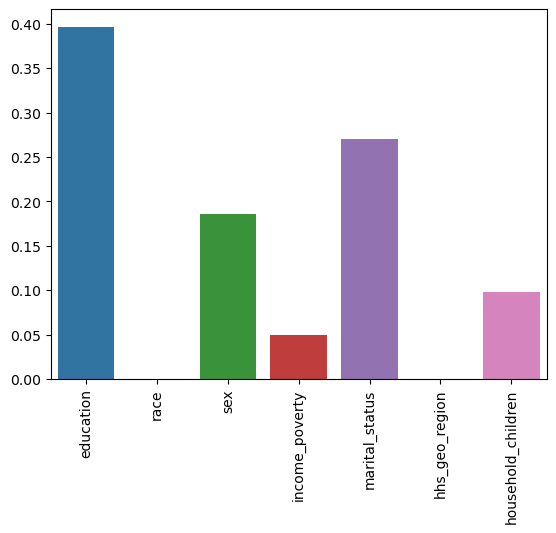

In [172]:
# Showing feature importances by the Decision Tree
sns.barplot(x = wf_dropped.columns[:-1], y = tree_clf.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

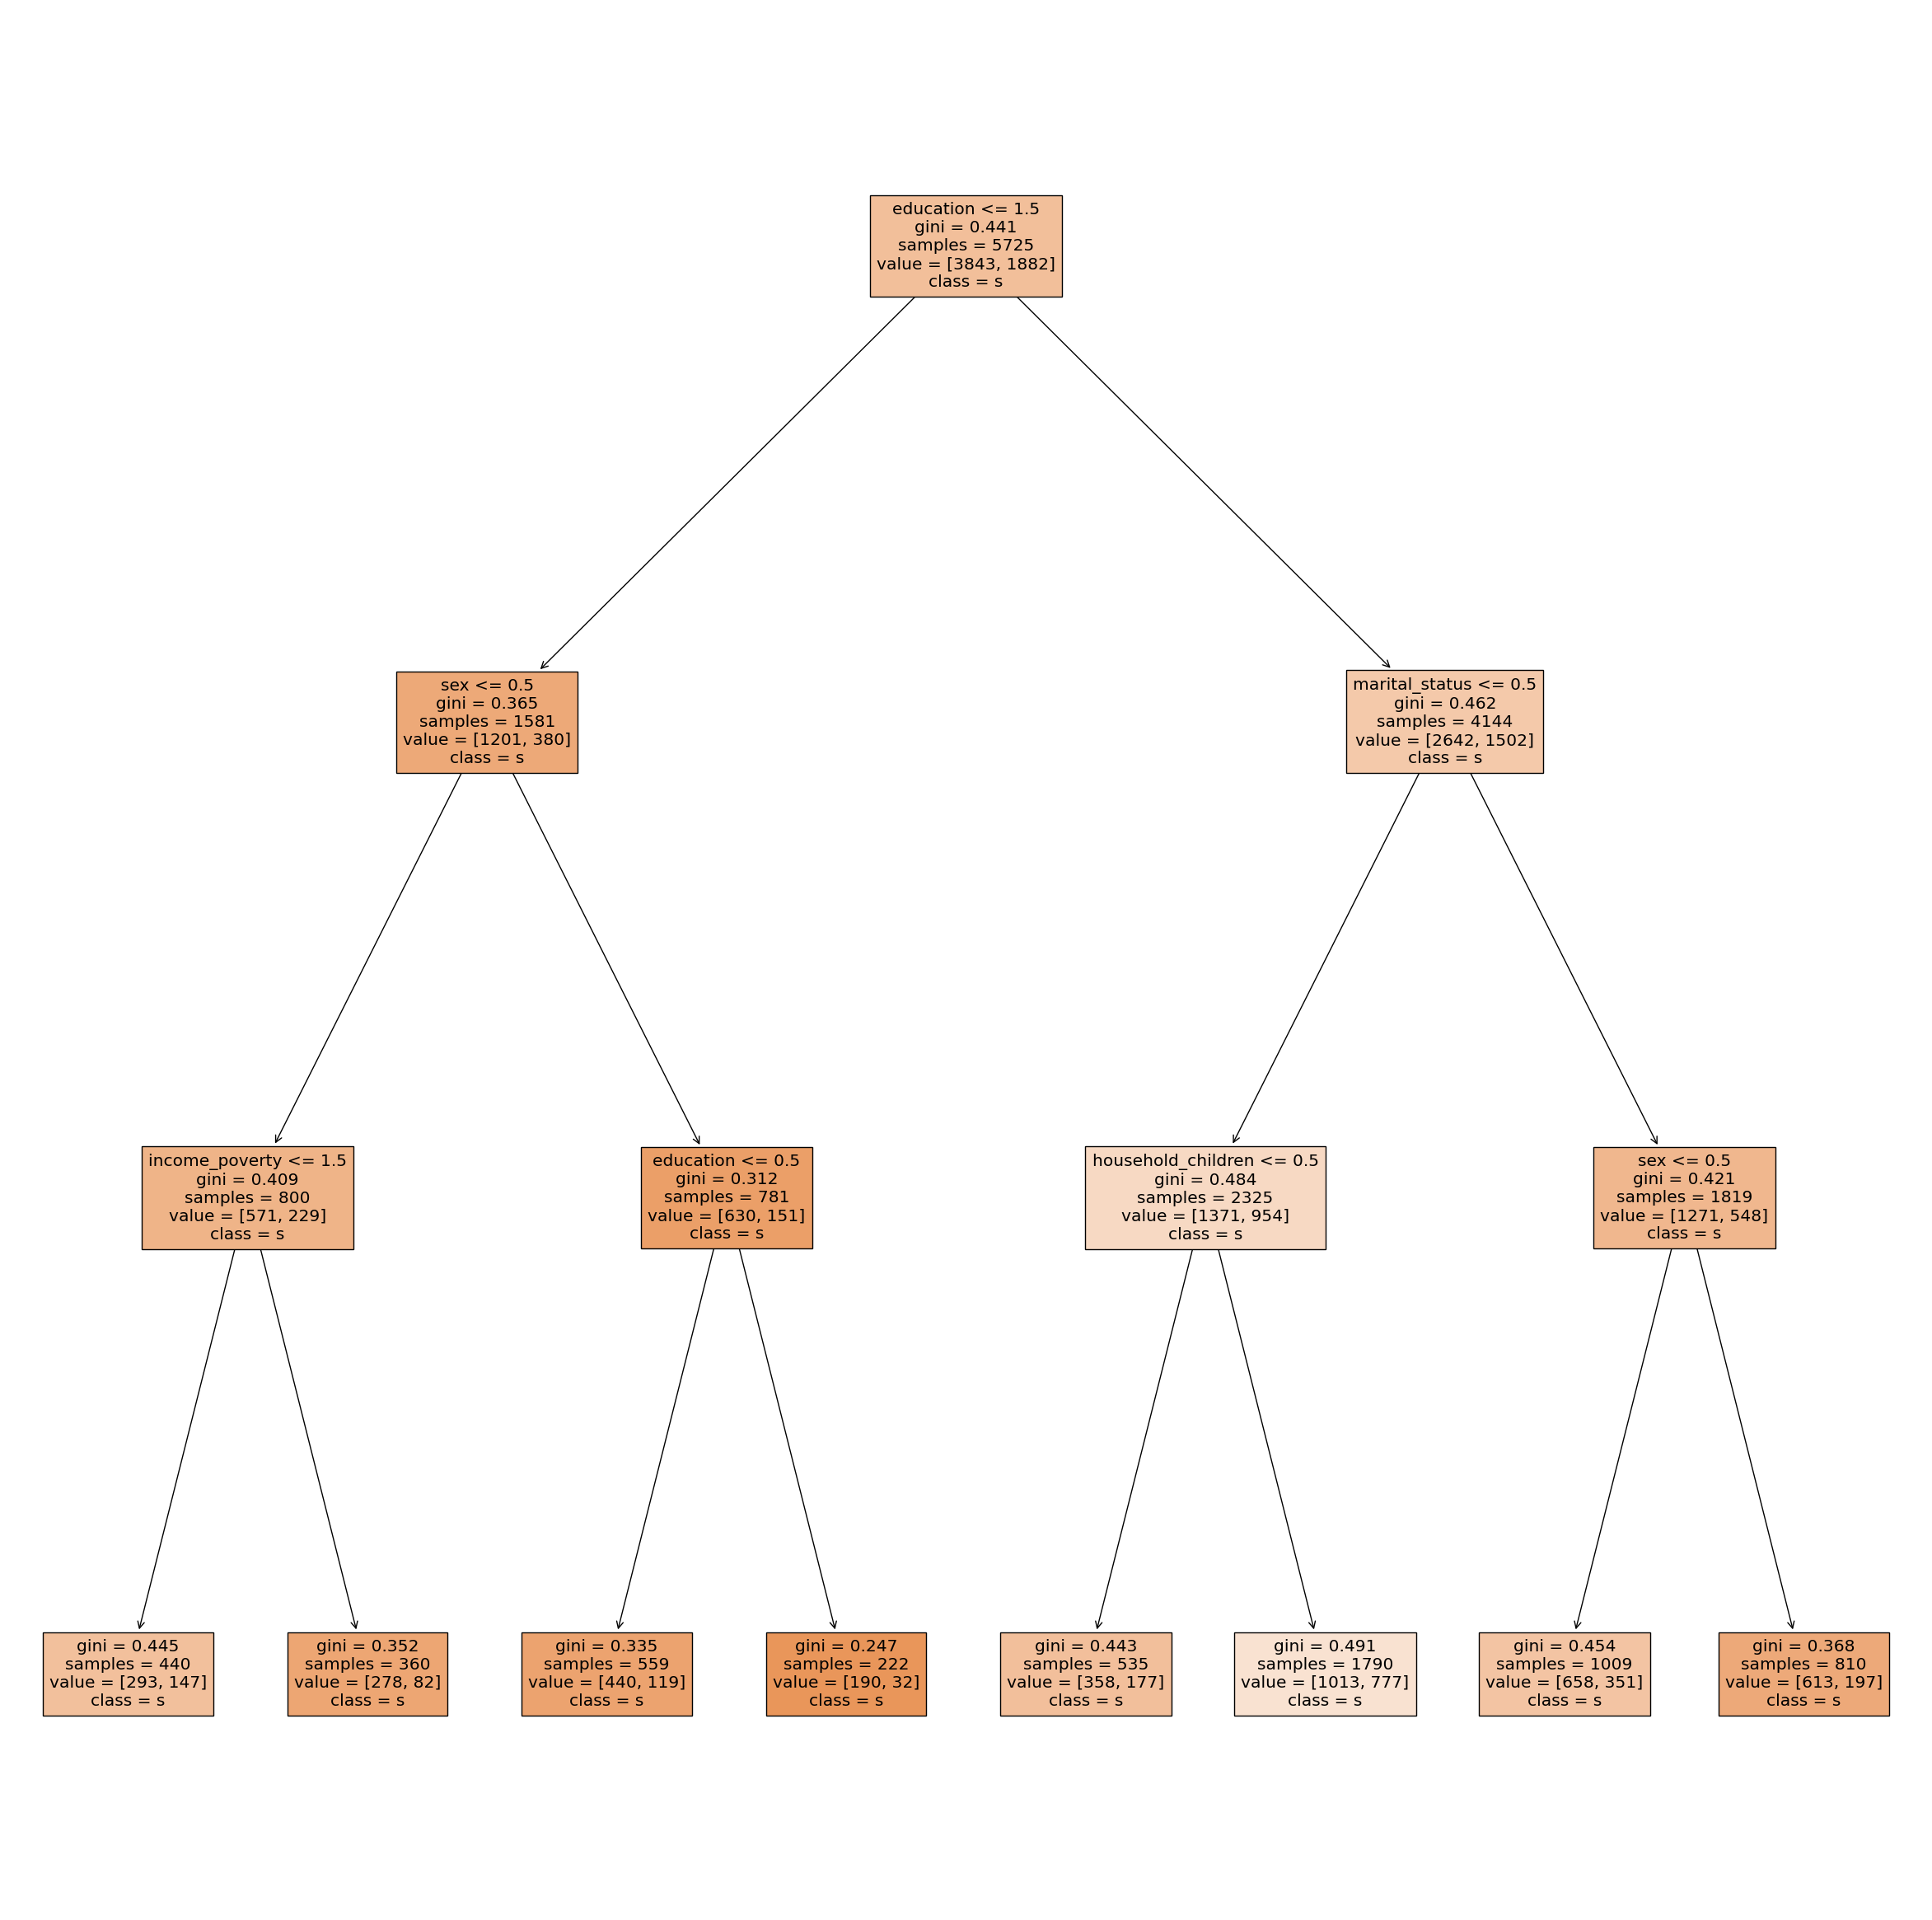

In [173]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, feature_names = list(wf_dropped.columns[:-1]), class_names = list(wf_dropped.columns[-1]), filled = True );

## OneHotEncoder

In [174]:
X = wf_dropped.drop('seasonal_vaccine', axis =1)
y = wf_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# OneHotEncoder
# Create an ordinal encoder instance
encoder = OneHotEncoder()
# Fit and transform the data
X_tr_cd = encoder.fit_transform(X_train)
X_tt_cd = encoder.transform(X_test)
# Access the categories mapping
categories_mapping = {feature: encoder.categories_[i].tolist() for i, feature in enumerate(X_train.columns)}
# Display the mapping
print(categories_mapping)

# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 4, random_state = 42)

# Fit to train samples
tree_clf.fit(X_tr_cd, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_tt_cd)

# Assuming you have an instance of OneHotEncoder named onehot_encoder
feature_names_after_encoding = encoder.get_feature_names_out(input_features=wf_dropped.columns[:-1])
print(feature_names_after_encoding)

# Assuming you have an instance of DecisionTreeClassifier named tree_clf
feature_importances = tree_clf.feature_importances_
print(feature_importances)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))



{'education': ['12 Years', '< 12 Years', 'College Graduate', 'Some College'], 'race': ['Black', 'Hispanic', 'Other or Multiple', 'White'], 'sex': ['Female', 'Male'], 'income_poverty': ['<= $75,000, Above Poverty', '> $75,000', 'Below Poverty'], 'marital_status': ['Married', 'Not Married'], 'hhs_geo_region': ['atmpeygn', 'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca', 'lrircsnp', 'lzgpxyit', 'mlyzmhmf', 'oxchjgsf', 'qufhixun'], 'household_children': [0.0, 1.0, 2.0, 3.0]}
['education_12 Years' 'education_< 12 Years' 'education_College Graduate'
 'education_Some College' 'race_Black' 'race_Hispanic'
 'race_Other or Multiple' 'race_White' 'sex_Female' 'sex_Male'
 'income_poverty_<= $75,000, Above Poverty' 'income_poverty_> $75,000'
 'income_poverty_Below Poverty' 'marital_status_Married'
 'marital_status_Not Married' 'hhs_geo_region_atmpeygn'
 'hhs_geo_region_bhuqouqj' 'hhs_geo_region_dqpwygqj'
 'hhs_geo_region_fpwskwrf' 'hhs_geo_region_kbazzjca'
 'hhs_geo_region_lrircsnp' 'hhs_geo_region_

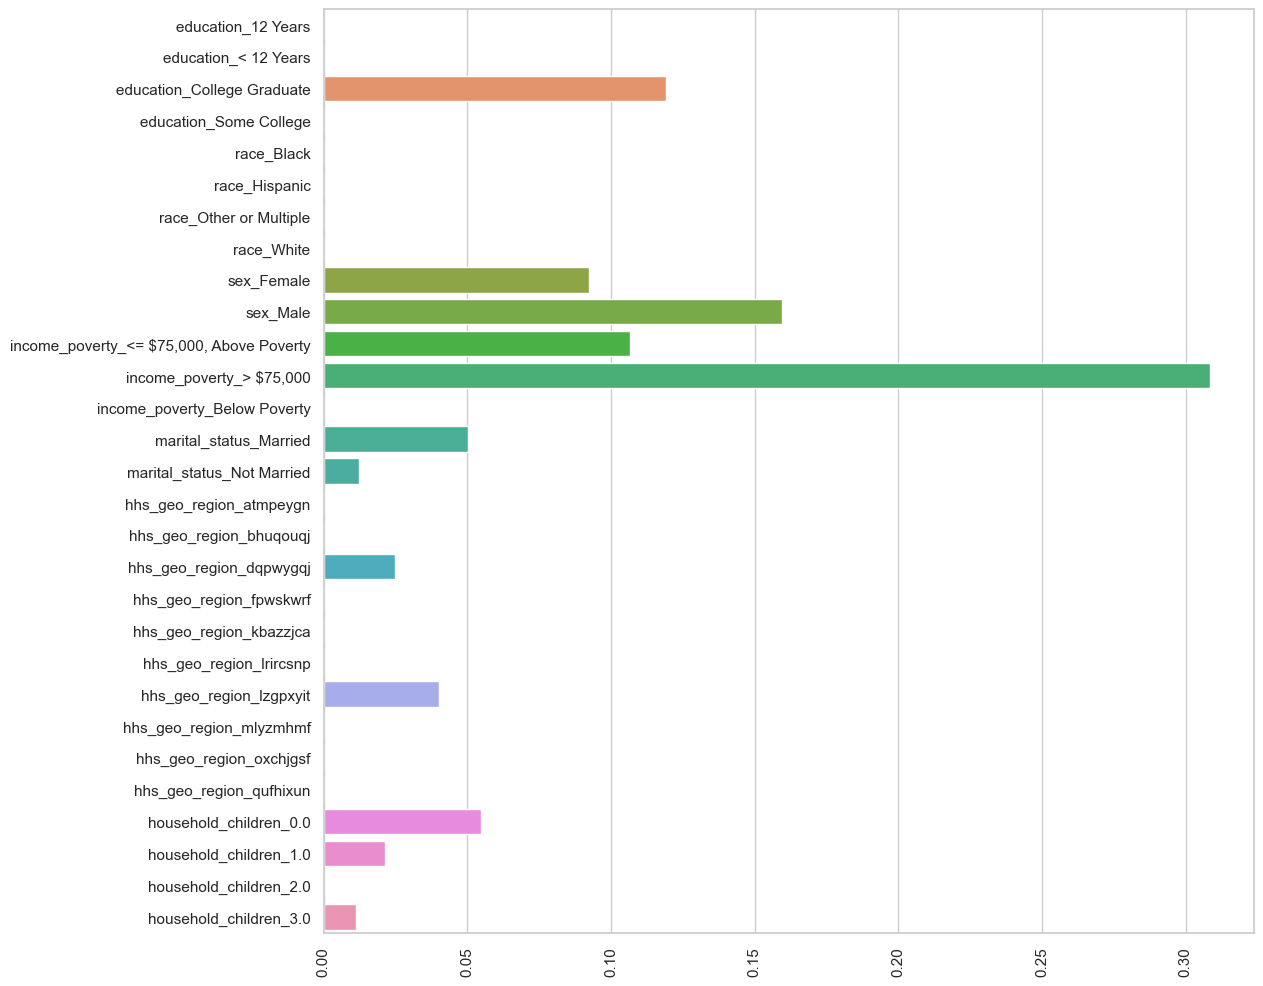

In [175]:
# Showing feature importances by the Decision Tree
sns.set(style="whitegrid")
plt.figure(figsize=(12,12))
sns.barplot(x=feature_importances, y=feature_names_after_encoding)
plt.xticks(rotation = 90)
plt.show()

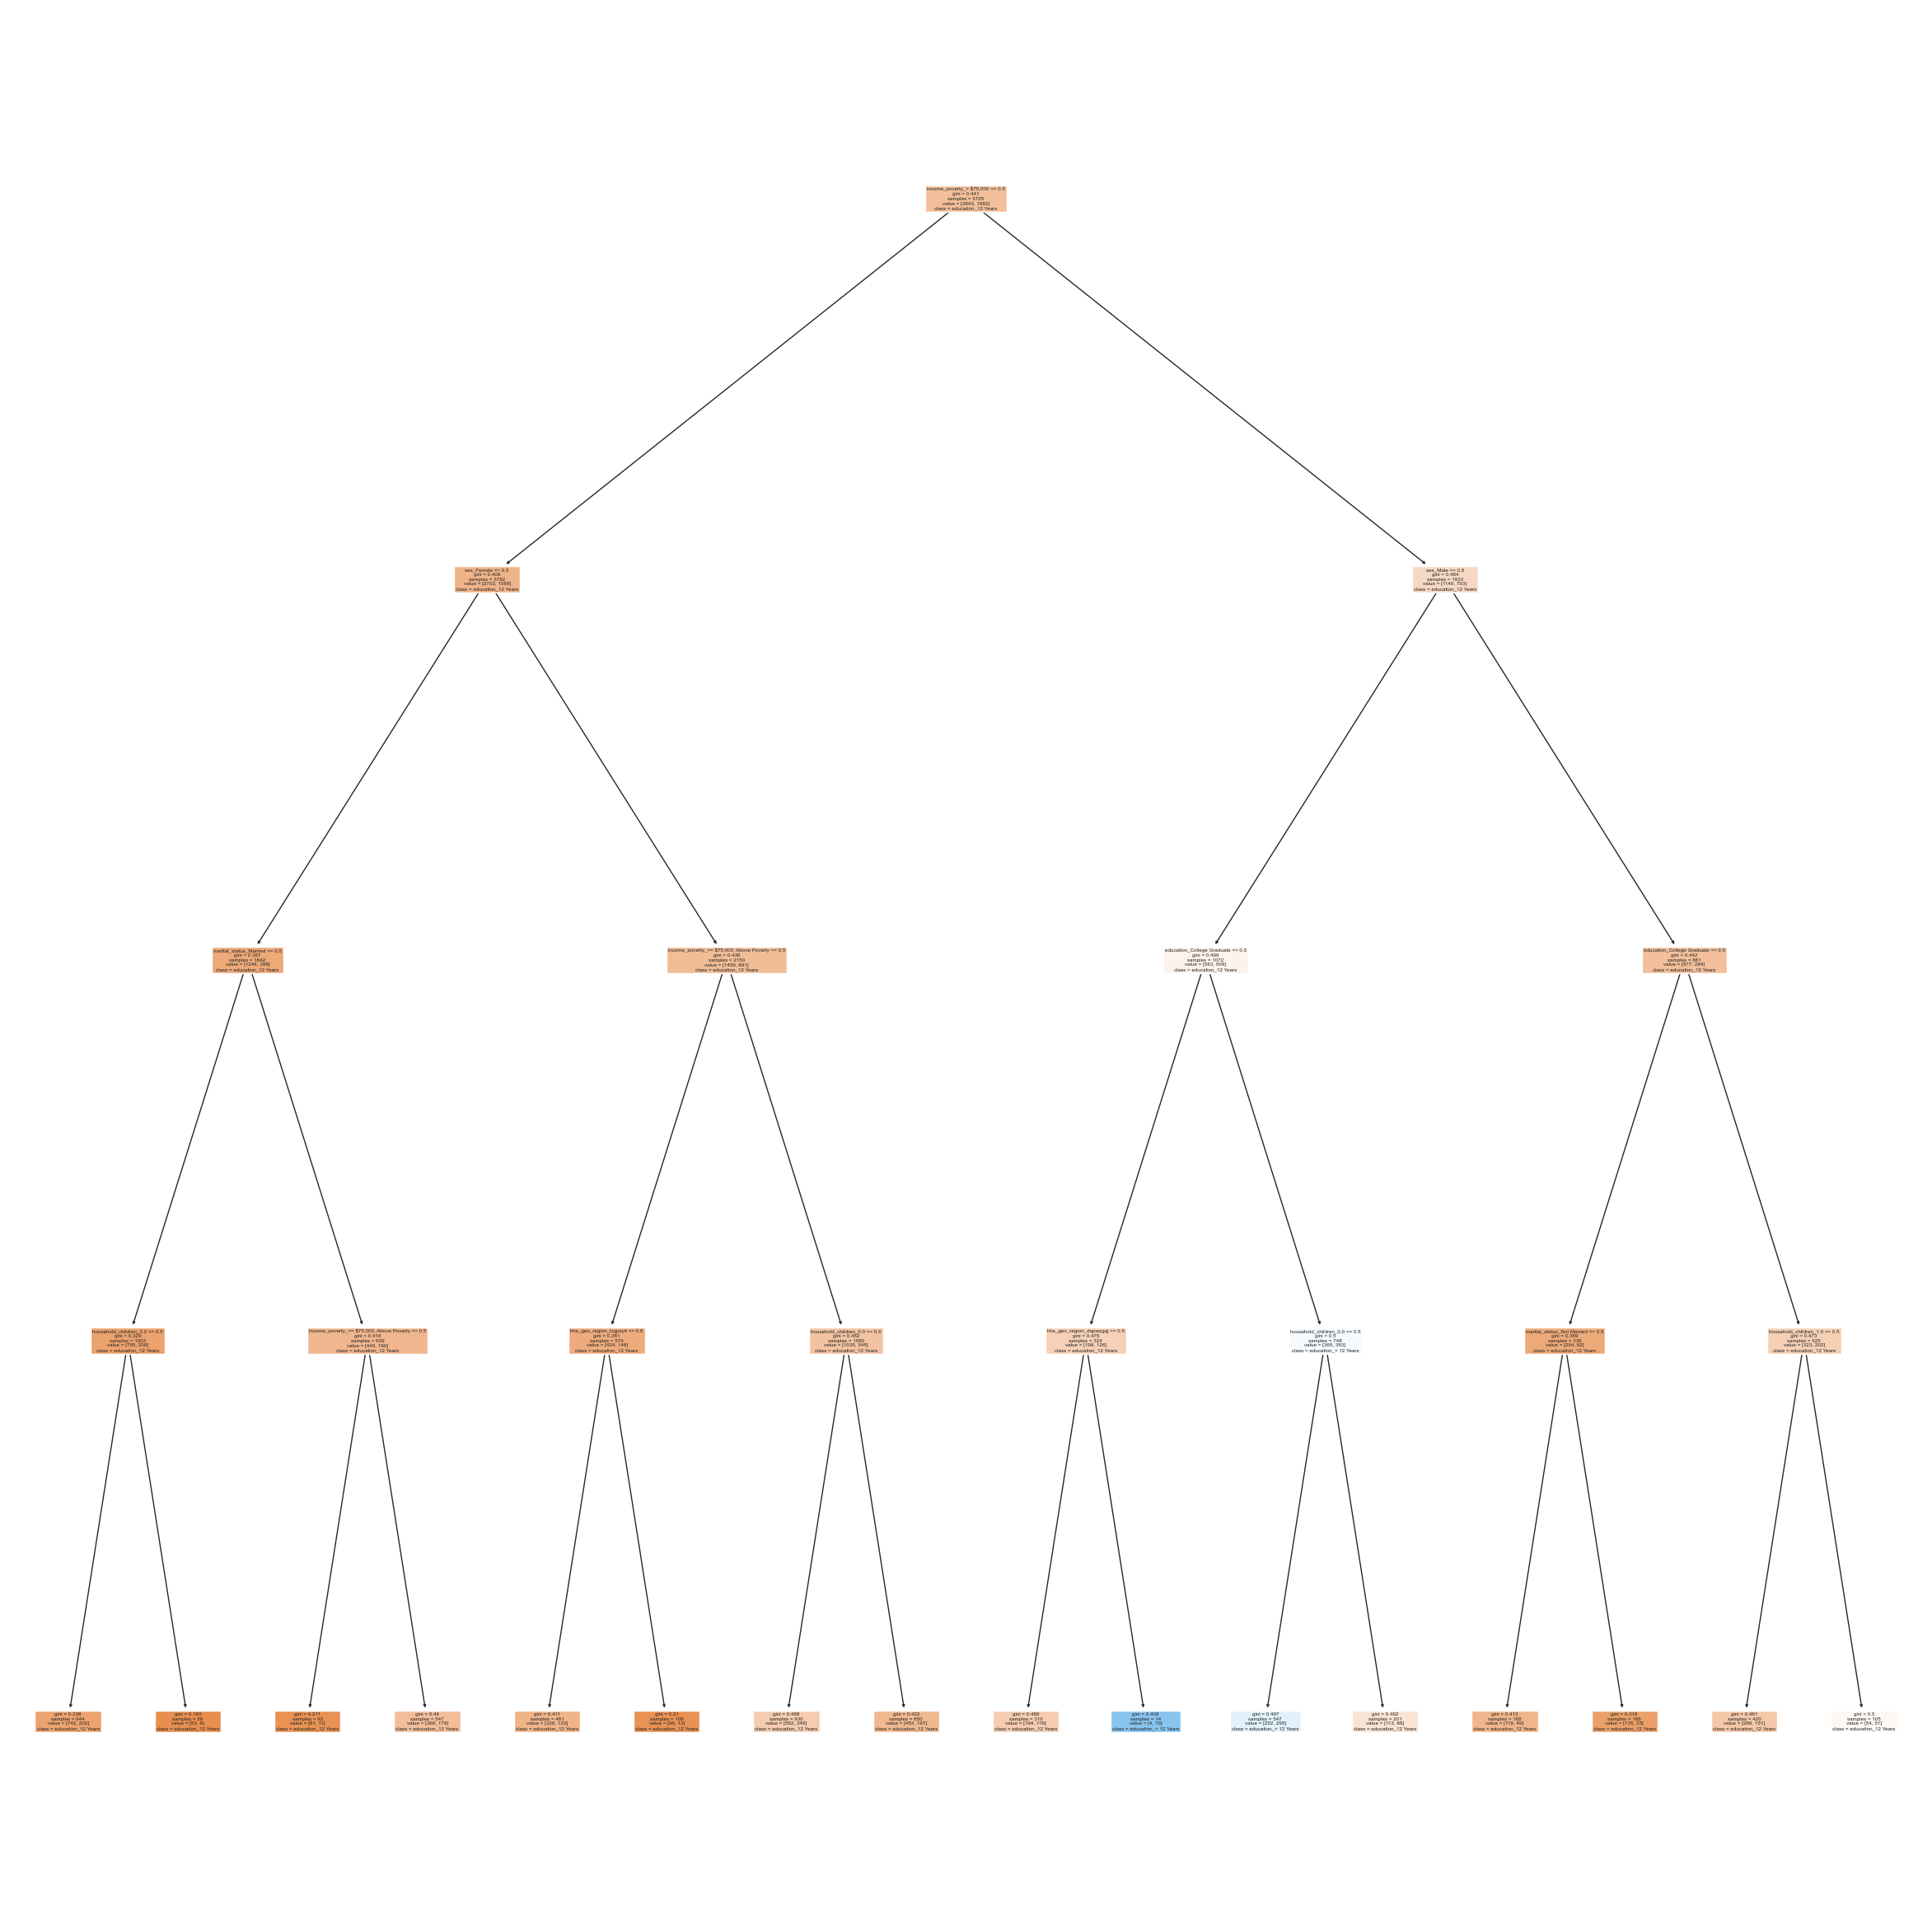

In [176]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, 
          feature_names = list(feature_names_after_encoding), 
          class_names = list(feature_names_after_encoding), 
          filled = True );

## Background features


In [177]:
wf = ['age_group',
      'education',
      'race',
      'sex',
      'income_poverty',
      'marital_status',
      'hhs_geo_region',
      'household_children',
      'seasonal_vaccine']
wf_df = df[wf]

In [178]:
wf_dropped = wf_df.dropna()

In [179]:
X = wf_dropped.drop('seasonal_vaccine', axis =1)
y = wf_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# OneHotEncoder
# Create an ordinal encoder instance
encoder = OneHotEncoder()
# Fit and transform the data
X_tr_cd = encoder.fit_transform(X_train)
X_tt_cd = encoder.transform(X_test)
# Access the categories mapping
categories_mapping = {feature: encoder.categories_[i].tolist() for i, feature in enumerate(X_train.columns)}
# Display the mapping
print(categories_mapping)

# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)

# Fit to train samples
tree_clf.fit(X_tr_cd, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_tt_cd)

# Assuming you have an instance of OneHotEncoder named onehot_encoder
feature_names_after_encoding = encoder.get_feature_names_out(input_features=wf_dropped.columns[:-1])
print(feature_names_after_encoding)

# Assuming you have an instance of DecisionTreeClassifier named tree_clf
feature_importances = tree_clf.feature_importances_
print(feature_importances)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))



{'age_group': ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years'], 'education': ['12 Years', '< 12 Years', 'College Graduate', 'Some College'], 'race': ['Black', 'Hispanic', 'Other or Multiple', 'White'], 'sex': ['Female', 'Male'], 'income_poverty': ['<= $75,000, Above Poverty', '> $75,000', 'Below Poverty'], 'marital_status': ['Married', 'Not Married'], 'hhs_geo_region': ['atmpeygn', 'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca', 'lrircsnp', 'lzgpxyit', 'mlyzmhmf', 'oxchjgsf', 'qufhixun'], 'household_children': [0.0, 1.0, 2.0, 3.0]}
['age_group_18 - 34 Years' 'age_group_35 - 44 Years'
 'age_group_45 - 54 Years' 'age_group_55 - 64 Years' 'age_group_65+ Years'
 'education_12 Years' 'education_< 12 Years' 'education_College Graduate'
 'education_Some College' 'race_Black' 'race_Hispanic'
 'race_Other or Multiple' 'race_White' 'sex_Female' 'sex_Male'
 'income_poverty_<= $75,000, Above Poverty' 'income_poverty_> $75,000'
 'income_poverty_Below Poverty' 'marit

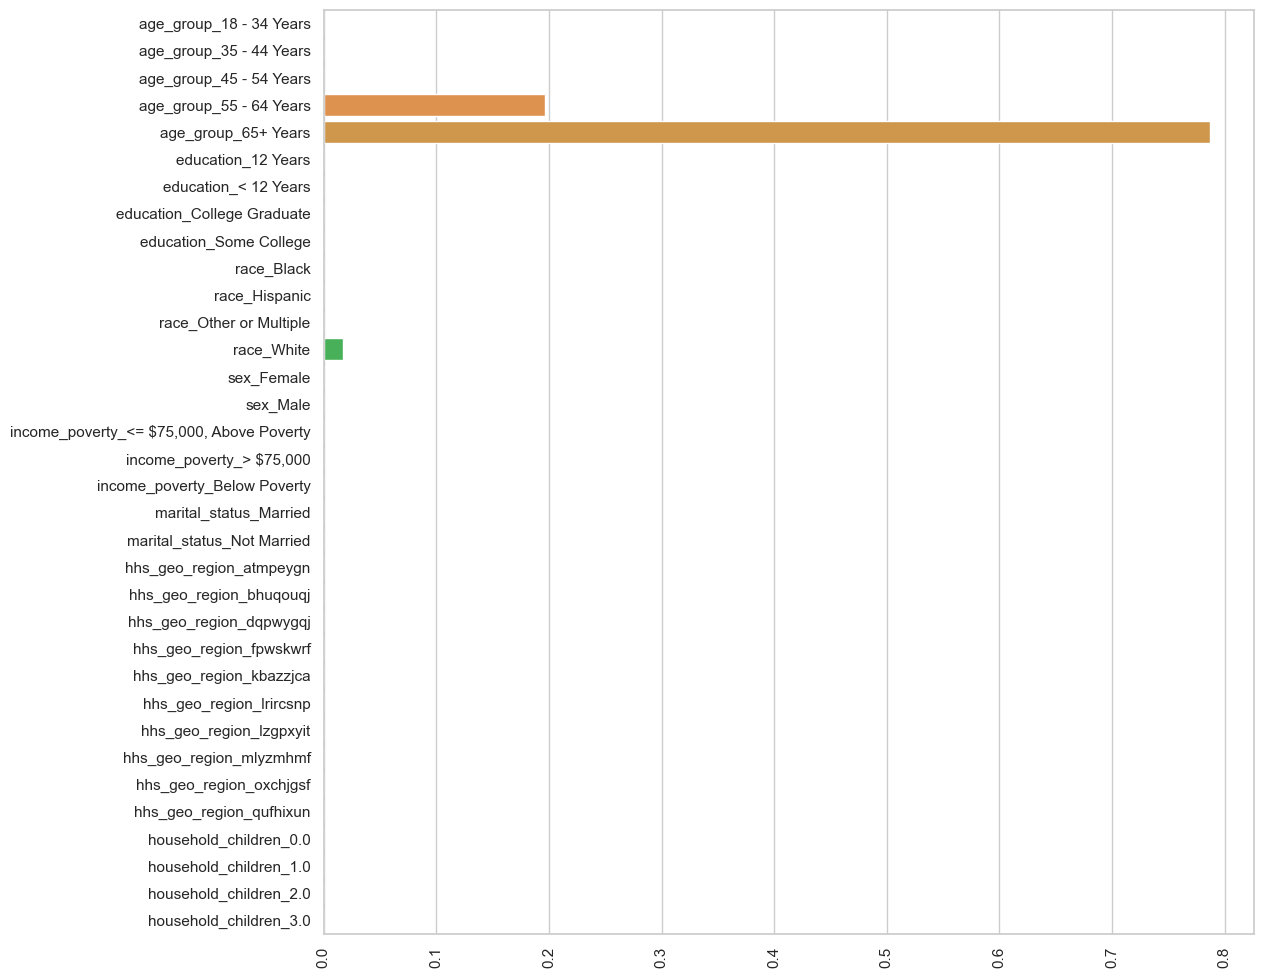

In [180]:
# Showing feature importances by the Decision Tree
sns.set(style="whitegrid")
plt.figure(figsize=(12,12))
sns.barplot(x=feature_importances, y=feature_names_after_encoding)
plt.xticks(rotation = 90)
plt.show()

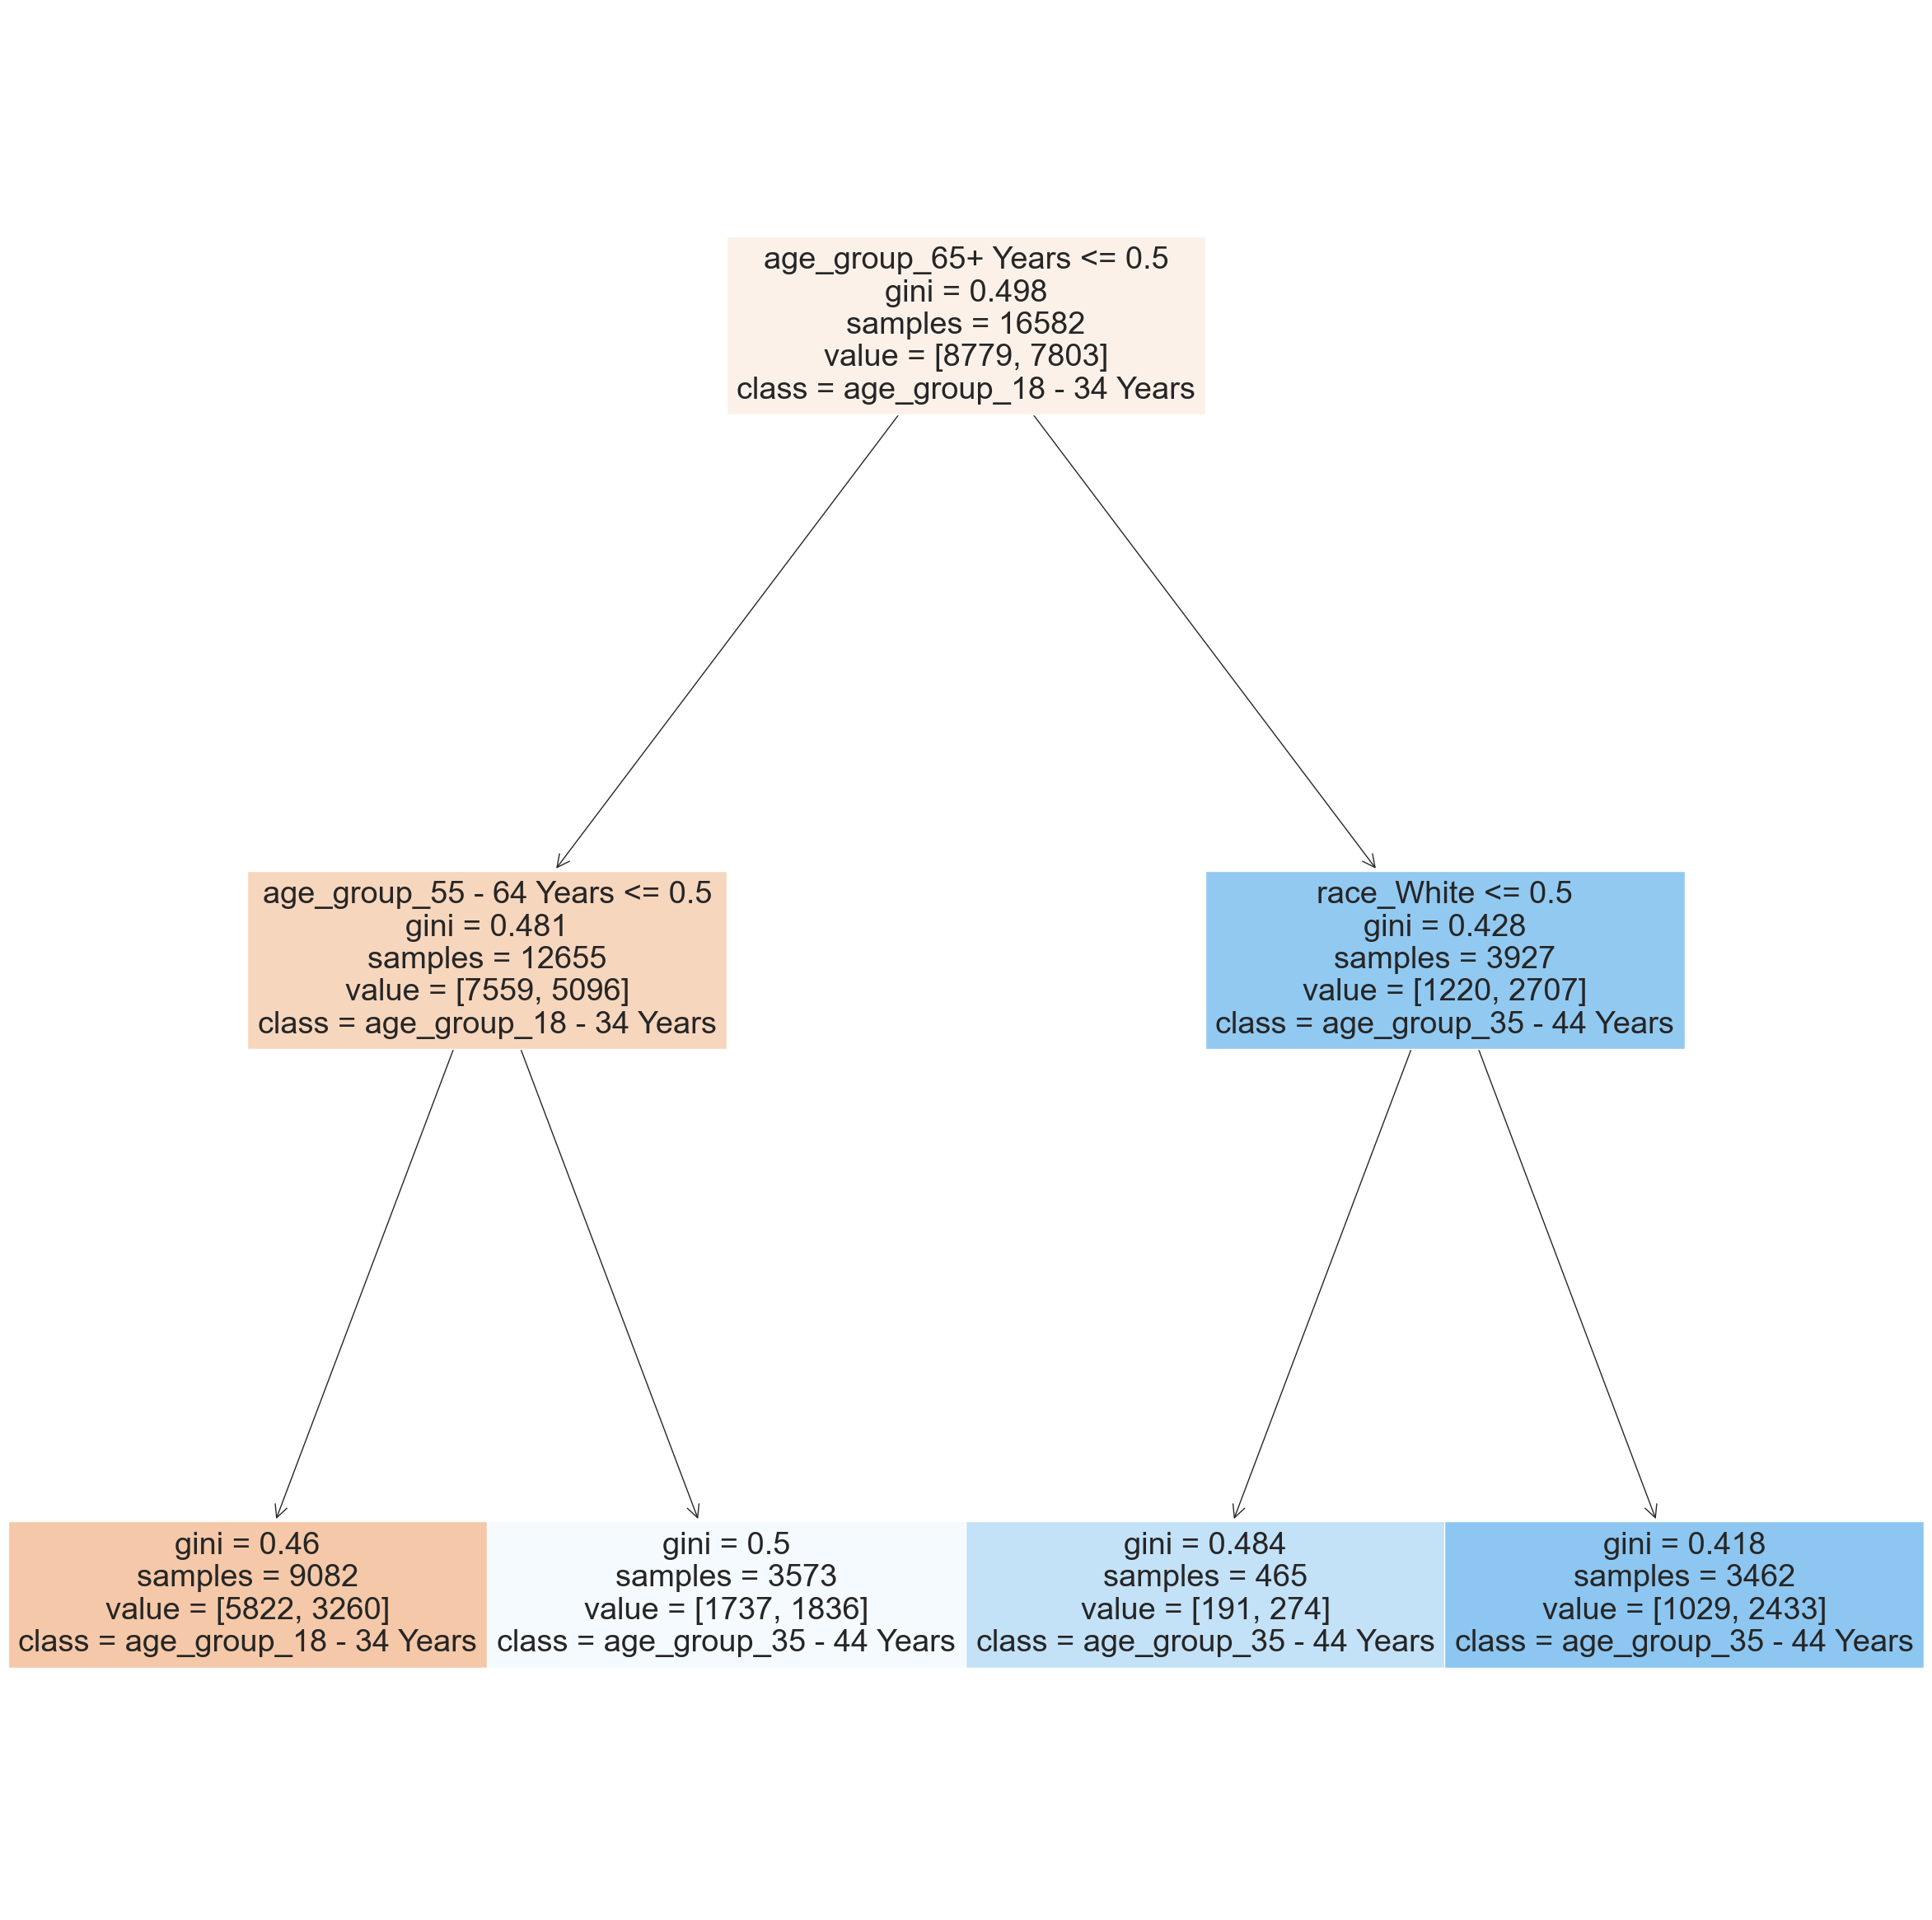

In [181]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, 
          feature_names = list(feature_names_after_encoding), 
          class_names = list(feature_names_after_encoding), 
          filled = True );


## Under young age


In [182]:
wf = ['age_group',
      'education',
      'race',
      'sex',
      'income_poverty',
      'marital_status',
      'hhs_geo_region',
      'household_children',
      'seasonal_vaccine']
wf_df = df[wf]

In [183]:
wf_dropped = wf_df.dropna()

In [184]:
wf_dropped['age_group'].value_counts()

age_group
65+ Years        5238
55 - 64 Years    4748
45 - 54 Years    4490
18 - 34 Years    4360
35 - 44 Years    3274
Name: count, dtype: int64

In [185]:
age_cond = (wf_dropped['age_group'] == '18 - 34 Years') | (wf_dropped['age_group'] == '35 - 44 Years')

In [186]:
wf_dropped = wf_dropped[age_cond]

In [187]:
wf_dropped['age_group'].value_counts()

age_group
18 - 34 Years    4360
35 - 44 Years    3274
Name: count, dtype: int64

In [188]:
wf_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7634 entries, 1 to 26705
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age_group           7634 non-null   object 
 1   education           7634 non-null   object 
 2   race                7634 non-null   object 
 3   sex                 7634 non-null   object 
 4   income_poverty      7634 non-null   object 
 5   marital_status      7634 non-null   object 
 6   hhs_geo_region      7634 non-null   object 
 7   household_children  7634 non-null   float64
 8   seasonal_vaccine    7634 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 596.4+ KB


In [189]:
wf_dropped = wf_dropped.drop('age_group', axis =1)

In [190]:
wf_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7634 entries, 1 to 26705
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   education           7634 non-null   object 
 1   race                7634 non-null   object 
 2   sex                 7634 non-null   object 
 3   income_poverty      7634 non-null   object 
 4   marital_status      7634 non-null   object 
 5   hhs_geo_region      7634 non-null   object 
 6   household_children  7634 non-null   float64
 7   seasonal_vaccine    7634 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 536.8+ KB


In [191]:
X = wf_dropped.drop('seasonal_vaccine', axis =1)
y = wf_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# OneHotEncoder
# Create an ordinal encoder instance
encoder = OneHotEncoder()
# Fit and transform the data
X_tr_cd = encoder.fit_transform(X_train)
X_tt_cd = encoder.transform(X_test)
# Access the categories mapping
categories_mapping = {feature: encoder.categories_[i].tolist() for i, feature in enumerate(X_train.columns)}
# Display the mapping
print(categories_mapping)

# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

# Fit to train samples
tree_clf.fit(X_tr_cd, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_tt_cd)

# Assuming you have an instance of OneHotEncoder named onehot_encoder
feature_names_after_encoding = encoder.get_feature_names_out(input_features=wf_dropped.columns[:-1])
print(feature_names_after_encoding)

# Assuming you have an instance of DecisionTreeClassifier named tree_clf
feature_importances = tree_clf.feature_importances_
print(feature_importances)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))



{'education': ['12 Years', '< 12 Years', 'College Graduate', 'Some College'], 'race': ['Black', 'Hispanic', 'Other or Multiple', 'White'], 'sex': ['Female', 'Male'], 'income_poverty': ['<= $75,000, Above Poverty', '> $75,000', 'Below Poverty'], 'marital_status': ['Married', 'Not Married'], 'hhs_geo_region': ['atmpeygn', 'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca', 'lrircsnp', 'lzgpxyit', 'mlyzmhmf', 'oxchjgsf', 'qufhixun'], 'household_children': [0.0, 1.0, 2.0, 3.0]}
['education_12 Years' 'education_< 12 Years' 'education_College Graduate'
 'education_Some College' 'race_Black' 'race_Hispanic'
 'race_Other or Multiple' 'race_White' 'sex_Female' 'sex_Male'
 'income_poverty_<= $75,000, Above Poverty' 'income_poverty_> $75,000'
 'income_poverty_Below Poverty' 'marital_status_Married'
 'marital_status_Not Married' 'hhs_geo_region_atmpeygn'
 'hhs_geo_region_bhuqouqj' 'hhs_geo_region_dqpwygqj'
 'hhs_geo_region_fpwskwrf' 'hhs_geo_region_kbazzjca'
 'hhs_geo_region_lrircsnp' 'hhs_geo_region_

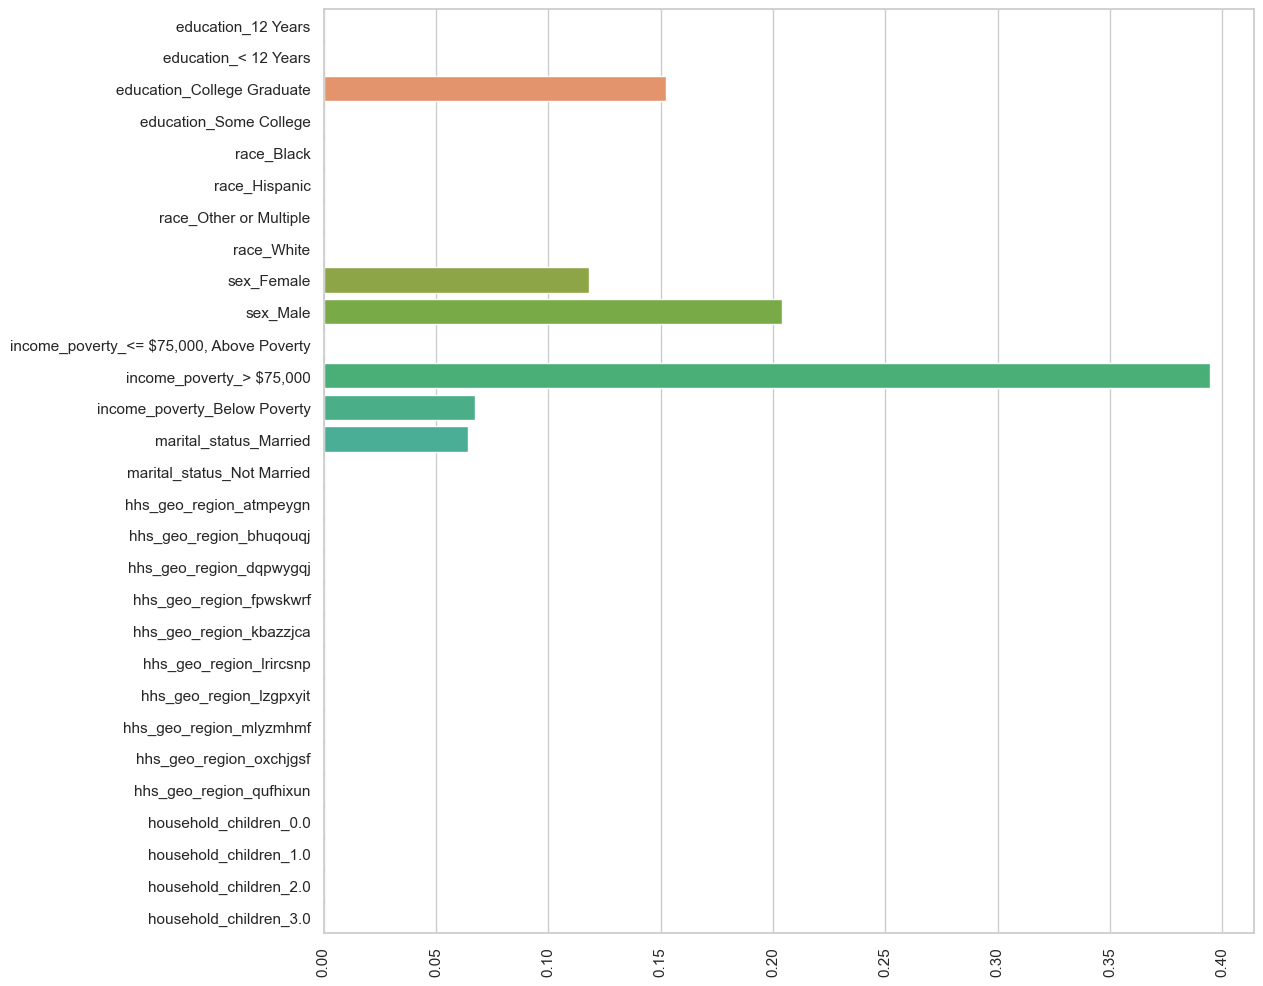

In [192]:
# Showing feature importances by the Decision Tree
sns.set(style="whitegrid")
plt.figure(figsize=(12,12))
sns.barplot(x=feature_importances, y=feature_names_after_encoding)
plt.xticks(rotation = 90)
plt.show()

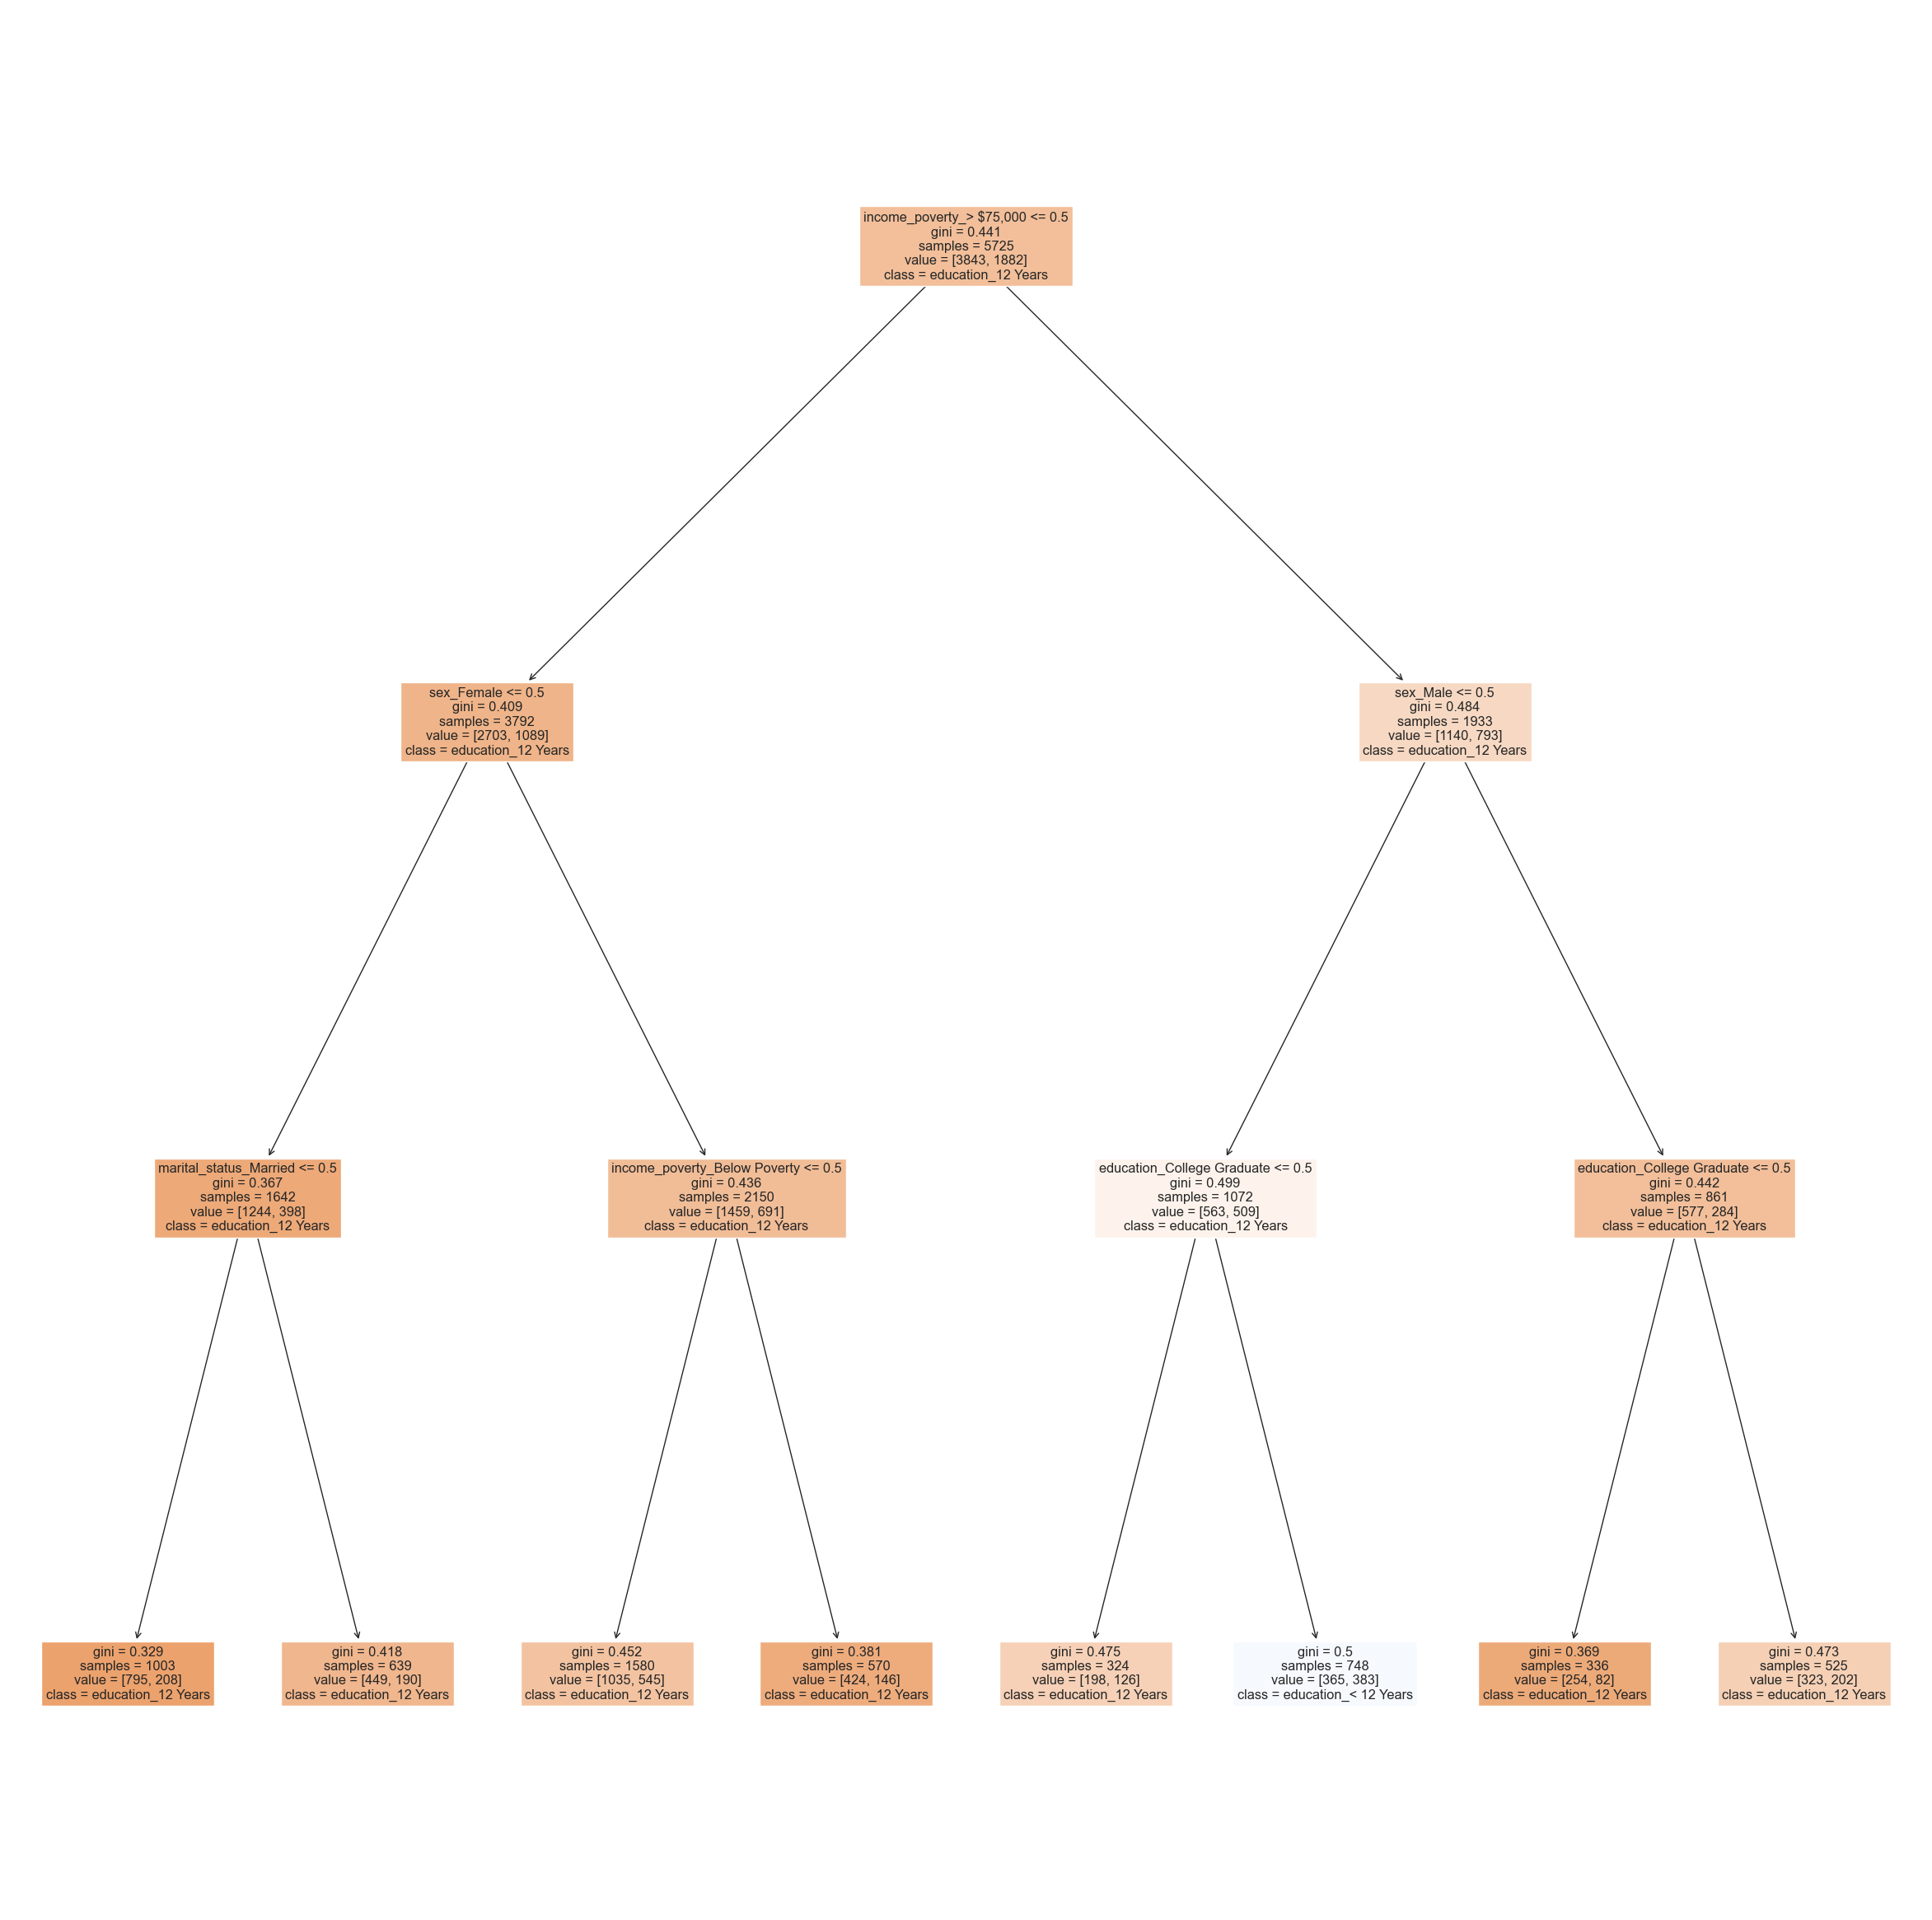

In [193]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, 
          feature_names = list(feature_names_after_encoding), 
          class_names = list(feature_names_after_encoding), 
          filled = True );

# Ordinal and Norminal encoders

In [194]:
from sklearn.compose import ColumnTransformer


In [195]:
from sklearn.pipeline import Pipeline

In [196]:
ordinal_cols = ['age_group',
                'education',
                'income_poverty']

In [197]:
nominal_cols = ['race',
                'sex',
                'marital_status',
                'hhs_geo_region']

In [198]:
no_need_transform_cols = ['doctor_recc_seasonal', 
                          'opinion_seas_vacc_effective',
                          'opinion_seas_risk',
                          'opinion_seas_sick_from_vacc',
                          'household_children']

In [199]:
wf = ['doctor_recc_seasonal', 
      'opinion_seas_vacc_effective',
      'opinion_seas_risk',
      'opinion_seas_sick_from_vacc',
      'age_group',
      'education',
      'race',
      'sex',
      'income_poverty',
      'marital_status',
      'hhs_geo_region',
      'household_children',
      'seasonal_vaccine']
wf_df = df[wf]

In [200]:
wf_dropped = wf_df.dropna()

In [201]:
# Create transformers
ordinal_transformer = OrdinalEncoder()
nominal_transformer = OneHotEncoder(sparse_output=False)

In [202]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_transformer, ordinal_cols),
        ('nominal', nominal_transformer, nominal_cols),
        ], remainder = 'passthrough')

# Create decision tree model
model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', model)])
# Assign X and y
X = wf_dropped.drop('seasonal_vaccine', axis =1)
y = wf_dropped['seasonal_vaccine']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['age_group', 'education',
                                                   'income_poverty']),
                                                 ('nominal',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['race', 'sex',
                                                   'marital_status',
                                                   'hhs_geo_region'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [203]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_transformer, ordinal_cols),
        ('nominal', nominal_transformer, nominal_cols),
        ], remainder = 'passthrough')

# Create decision tree model
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', model)])

# Assign X and y
X = wf_dropped.drop('seasonal_vaccine', axis =1)
y = wf_dropped['seasonal_vaccine']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)


# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.73


In [204]:
# Get feature names after preprocessing
feature_names = ordinal_cols + list(preprocessor.named_transformers_['nominal']
                                    .get_feature_names_out(nominal_cols))
feature_names += no_need_transform_cols
len(feature_names)

26

In [205]:
# Extract feature importances from the decision tree model
importances = pipeline.named_steps['classifier'].feature_importances_
len(importances)

26

In [206]:
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [207]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

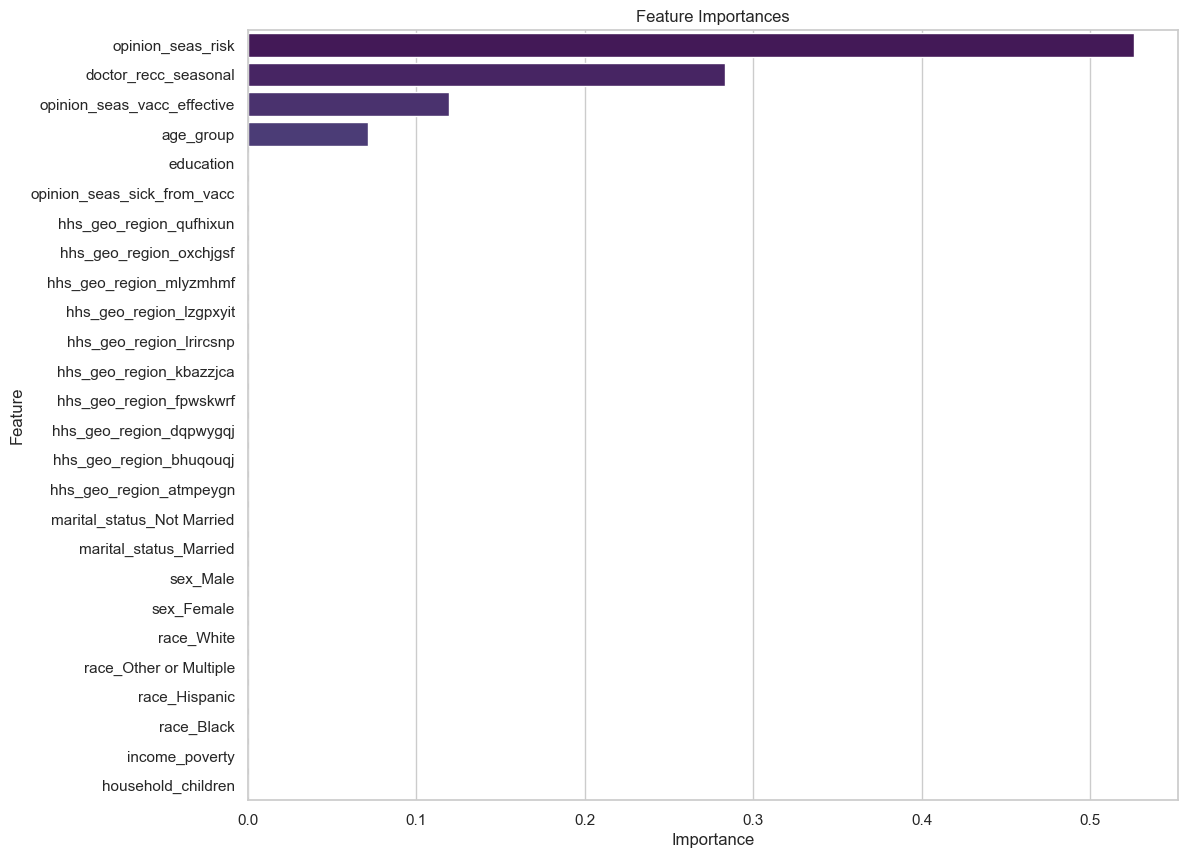

In [208]:
# Plot the feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

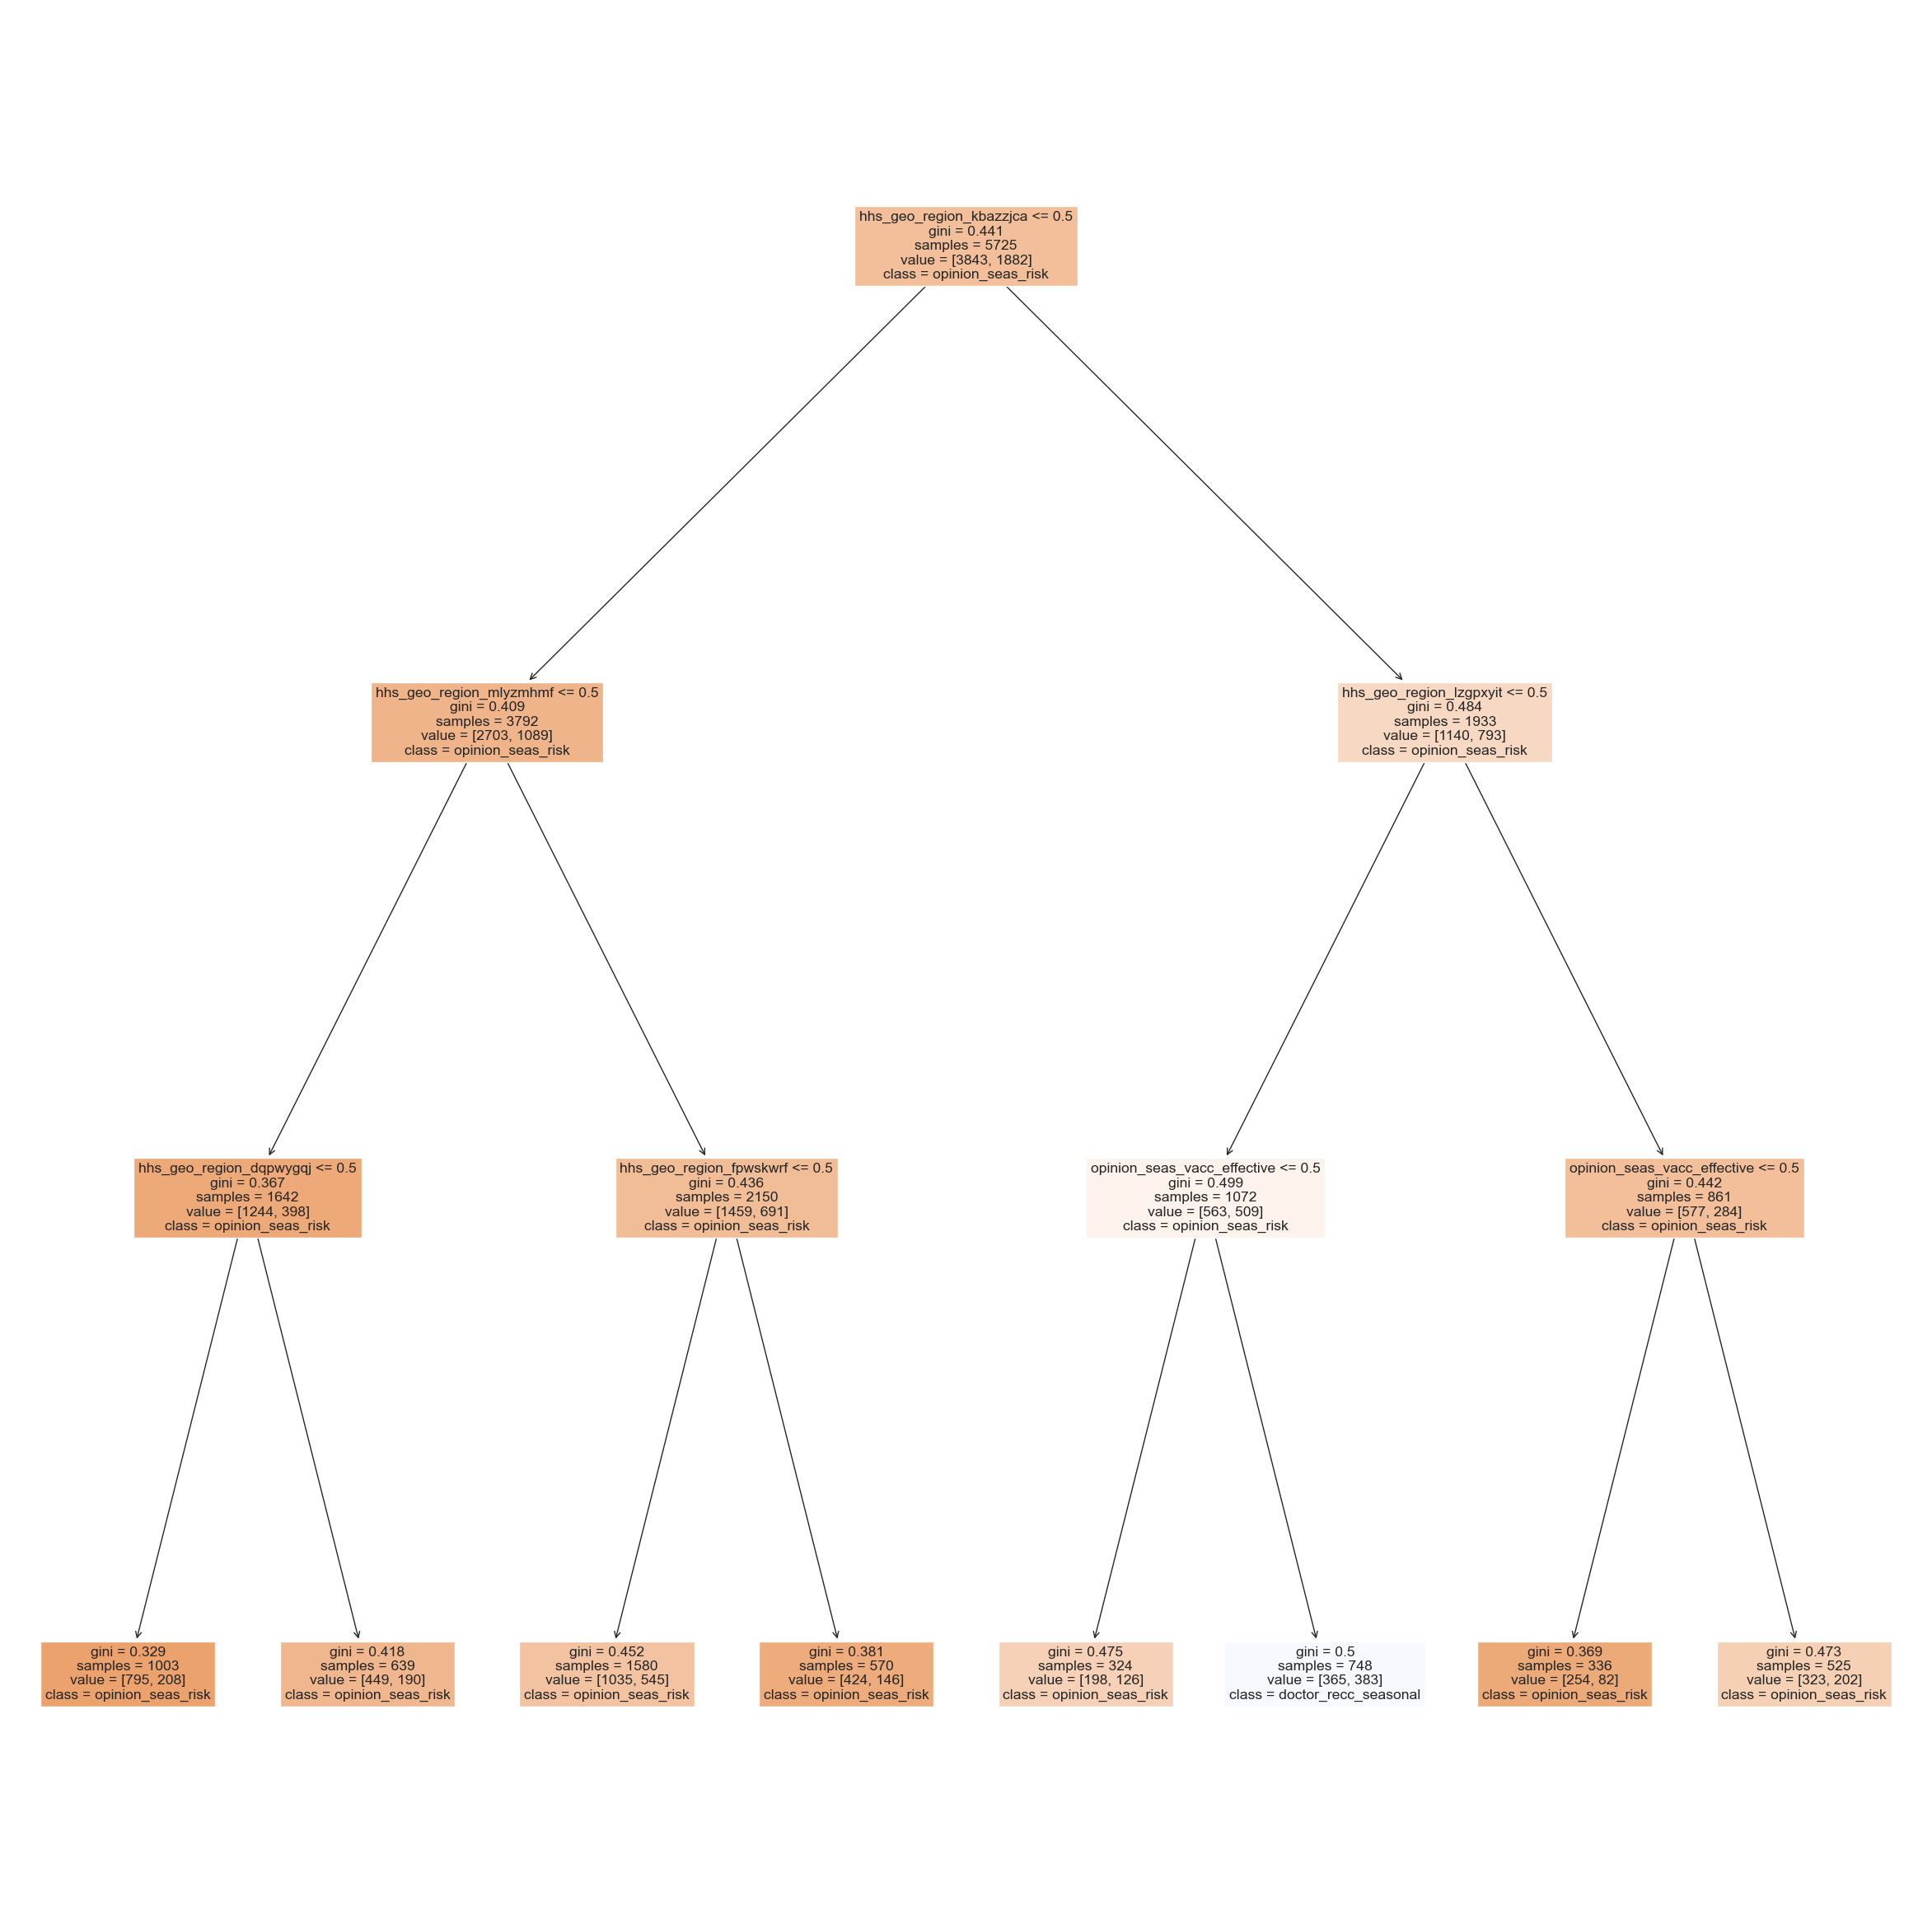

In [209]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, 
          feature_names = list(feature_importance_df['Feature']), 
          class_names = list(feature_importance_df['Feature']), 
          filled = True );

# Analysis by Age, gender, education, income_poverty

In [217]:
df.head()

h1n1_vaccine  seasonal_vaccine  h1n1_concern  h1n1_knowledge  \
respondent_id                                                                 
0                         0                 0           1.0             0.0   
1                         0                 1           3.0             2.0   
2                         0                 0           1.0             1.0   
3                         0                 1           1.0             1.0   
4                         0                 0           2.0             1.0   

               behavioral_antiviral_meds  behavioral_avoidance  \
respondent_id                                                    
0                                    0.0                   0.0   
1                                    0.0                   1.0   
2                                    0.0                   1.0   
3                                    0.0                   1.0   
4                                    0.0                   1.0   

               behavioral_face_mask  behavioral_wash_hands  \
respondent_id                                                
0                               0.0                    0.0   
1                               0.0                    1.0   
2                               0.0                    0.0   
3                               0.0                    1.0   
4                               0.0                    1.0   

               behavioral_large_gatherings  behavioral_outside_home  ...  \
respondent_id                                                        ...   
0                                      0.0                      1.0  ...   
1                                      0.0                      1.0  ...   
2                                      0.0                      0.0  ...   
3                                      1.0                      0.0  ...   
4                                      1.0                      0.0  ...   

               marital_status  rent_or_own   employment_status  \
respondent_id                                                    
0                 Not Married          Own  Not in Labor Force   
1                 Not Married         Rent            Employed   
2                 Not Married          Own            Employed   
3                 Not Married         Rent  Not in Labor Force   
4                     Married          Own            Employed   

               hhs_geo_region                census_msa  household_adults  \
respondent_id                                                               
0                    oxchjgsf                   Non-MSA               0.0   
1                    bhuqouqj  MSA, Not Principle  City               0.0   
2                    qufhixun  MSA, Not Principle  City               2.0   
3                    lrircsnp       MSA, Principle City               0.0   
4                    qufhixun  MSA, Not Principle  City               1.0   

               household_children  employment_industry  employment_occupation  \
respondent_id                                                                   
0                             0.0                  NaN                    NaN   
1                             0.0             pxcmvdjn               xgwztkwe   
2                             0.0             rucpziij               xtkaffoo   
3                             0.0                  NaN                    NaN   
4                             0.0             wxleyezf               emcorrxb   

               _merge  
respondent_id          
0                both  
1                both  
2                both  
3                both  
4                both  

[5 rows x 38 columns]

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   h1n1_vaccine                 26707 non-null  int64   
 1   seasonal_vaccine             26707 non-null  int64   
 2   h1n1_concern                 26615 non-null  float64 
 3   h1n1_knowledge               26591 non-null  float64 
 4   behavioral_antiviral_meds    26636 non-null  float64 
 5   behavioral_avoidance         26499 non-null  float64 
 6   behavioral_face_mask         26688 non-null  float64 
 7   behavioral_wash_hands        26665 non-null  float64 
 8   behavioral_large_gatherings  26620 non-null  float64 
 9   behavioral_outside_home      26625 non-null  float64 
 10  behavioral_touch_face        26579 non-null  float64 
 11  doctor_recc_h1n1             24547 non-null  float64 
 12  doctor_recc_seasonal         24547 non-null  float64 
 13  chroni

In [211]:
df.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', '_merge'],
      dtype='object')

### Because counts of respondents are different by opinion_seas_risk, it is pointless comparing vaccination rate in total of samples

In [221]:
df.groupby('opinion_seas_risk')['seasonal_vaccine'].count()

opinion_seas_risk
1.0    5974
2.0    8954
3.0     677
4.0    7630
5.0    2958
Name: seasonal_vaccine, dtype: int64

In [222]:
df.groupby('opinion_seas_risk')['seasonal_vaccine'].value_counts()

opinion_seas_risk  seasonal_vaccine
1.0                0                   4723
                   1                   1251
2.0                0                   5613
                   1                   3341
3.0                1                    377
                   0                    300
4.0                1                   5062
                   0                   2568
5.0                1                   2203
                   0                    755
Name: count, dtype: int64

In [224]:
df.groupby('opinion_seas_risk')['seasonal_vaccine'].value_counts(normalize = True)

opinion_seas_risk  seasonal_vaccine
1.0                0                   0.790593
                   1                   0.209407
2.0                0                   0.626871
                   1                   0.373129
3.0                1                   0.556869
                   0                   0.443131
4.0                1                   0.663434
                   0                   0.336566
5.0                1                   0.744760
                   0                   0.255240
Name: proportion, dtype: float64

In [223]:
df.groupby('opinion_seas_risk')['seasonal_vaccine'].sum()

opinion_seas_risk
1.0    1251
2.0    3341
3.0     377
4.0    5062
5.0    2203
Name: seasonal_vaccine, dtype: int64

In [233]:
df.pivot_table(index = 'opinion_seas_risk', columns = 'age_group', aggfunc = 'count')

_merge                                            \
age_group         18 - 34 Years 35 - 44 Years 45 - 54 Years 55 - 64 Years   
opinion_seas_risk                                                           
1.0                        1198           821          1260          1203   
2.0                        1874          1396          1814          1830   
3.0                          61            47            76           135   
4.0                        1402          1047          1388          1662   
5.0                         558           448           616           654   

                            behavioral_antiviral_meds                \
age_group         65+ Years             18 - 34 Years 35 - 44 Years   
opinion_seas_risk                                                     
1.0                    1492                      1195           821   
2.0                    2040                      1873          1394   
3.0                     358                        60            46   
4.0                    2131                      1400          1044   
5.0                     682                       555           448   

                                                         ... seasonal_vaccine  \
age_group         45 - 54 Years 55 - 64 Years 65+ Years  ...    18 - 34 Years   
opinion_seas_risk                                        ...                    
1.0                        1259          1203      1486  ...             1198   
2.0                        1812          1826      2032  ...             1874   
3.0                          76           134       355  ...               61   
4.0                        1386          1659      2119  ...             1402   
5.0                         613           653       675  ...              558   

                                                                       \
age_group         35 - 44 Years 45 - 54 Years 55 - 64 Years 65+ Years   
opinion_seas_risk                                                       
1.0                         821          1260          1203      1492   
2.0                        1396          1814          1830      2040   
3.0                          47            76           135       358   
4.0                        1047          1388          1662      2131   
5.0                         448           616           654       682   

                            sex                                            \
age_group         18 - 34 Years 35 - 44 Years 45 - 54 Years 55 - 64 Years   
opinion_seas_risk                                                           
1.0                        1198           821          1260          1203   
2.0                        1874          1396          1814          1830   
3.0                          61            47            76           135   
4.0                        1402          1047          1388          1662   
5.0                         558           448           616           654   

                             
age_group         65+ Years  
opinion_seas_risk            
1.0                    1492  
2.0                    2040  
3.0                     358  
4.0                    2131  
5.0                     682  

[5 rows x 180 columns]

In [279]:
vac_pct_or_ag_ct = df.groupby(['opinion_seas_risk','age_group'])['seasonal_vaccine'].count()
vac_pct_or_ag_ct

opinion_seas_risk  age_group    
1.0                18 - 34 Years    1198
                   35 - 44 Years     821
                   45 - 54 Years    1260
                   55 - 64 Years    1203
                   65+ Years        1492
2.0                18 - 34 Years    1874
                   35 - 44 Years    1396
                   45 - 54 Years    1814
                   55 - 64 Years    1830
                   65+ Years        2040
3.0                18 - 34 Years      61
                   35 - 44 Years      47
                   45 - 54 Years      76
                   55 - 64 Years     135
                   65+ Years         358
4.0                18 - 34 Years    1402
                   35 - 44 Years    1047
                   45 - 54 Years    1388
                   55 - 64 Years    1662
                   65+ Years        2131
5.0                18 - 34 Years     558
                   35 - 44 Years     448
                   45 - 54 Years     616
                   55 - 

In [252]:
vac_pct_or_ag = df.groupby(['opinion_seas_risk','age_group'])['seasonal_vaccine'].agg(np.mean)

In [253]:
vac_pct_or_ag = pd.DataFrame(vac_pct_or_ag)

In [275]:
df['age_group'].value_counts(normalize =True)

age_group
65+ Years        0.256225
55 - 64 Years    0.208297
45 - 54 Years    0.196128
18 - 34 Years    0.195267
35 - 44 Years    0.144082
Name: proportion, dtype: float64

In [263]:
vac_pct_or_ag_pv = vac_pct_or_ag.pivot_table(index = 'opinion_seas_risk', columns = 'age_group')
round(vac_pct_or_ag_pv * 100, 0)

seasonal_vaccine                                            \
age_group            18 - 34 Years 35 - 44 Years 45 - 54 Years 55 - 64 Years   
opinion_seas_risk                                                              
1.0                           12.0          12.0          12.0          19.0   
2.0                           22.0          25.0          30.0          41.0   
3.0                           16.0          38.0          42.0          53.0   
4.0                           42.0          56.0          65.0          74.0   
5.0                           55.0          69.0          74.0          82.0   

                             
age_group         65+ Years  
opinion_seas_risk            
1.0                    42.0  
2.0                    64.0  
3.0                    68.0  
4.0                    82.0  
5.0                    87.0

In [273]:
# order_ed = ['(seasonal_vaccine, < 12 Years)', '(seasonal_vaccine, 12 Years)', '(seasonal_vaccine, Some College)', '(seasonal_vaccine, College Graduate)']
vac_pct_or_ed = df.groupby(['opinion_seas_risk','education'])['seasonal_vaccine'].agg(np.mean)
vac_pct_or_ed = pd.DataFrame(vac_pct_or_ed)
vac_pct_or_ed_pv = vac_pct_or_ed.pivot_table(index = 'opinion_seas_risk', columns = 'education')
vac_pct_or_ed_pv = pd.DataFrame(vac_pct_or_ed_pv)
round(vac_pct_or_ed_pv.iloc[:,[1,0,3,2]]*100,0)


seasonal_vaccine                                       
education               < 12 Years 12 Years Some College College Graduate
opinion_seas_risk                                                        
1.0                           25.0     22.0         18.0             21.0
2.0                           34.0     35.0         36.0             40.0
3.0                           38.0     48.0         63.0             66.0
4.0                           51.0     64.0         65.0             72.0
5.0                           55.0     71.0         78.0             84.0

In [281]:
vac_pct_ag_ed_ct = df.groupby(['age_group','education','sex'])['seasonal_vaccine'].count()
vac_pct_ag_ed_ct

age_group      education         sex   
18 - 34 Years  12 Years          Female     519
                                 Male       587
               < 12 Years        Female     266
                                 Male       237
               College Graduate  Female     948
                                 Male       751
               Some College      Female     888
                                 Male       647
35 - 44 Years  12 Years          Female     303
                                 Male       285
               < 12 Years        Female     130
                                 Male       121
               College Graduate  Female    1097
                                 Male       676
               Some College      Female     555
                                 Male       379
45 - 54 Years  12 Years          Female     605
                                 Male       469
               < 12 Years        Female     179
                                 Male       160


In [270]:
vac_pct_or_ed_pv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 1.0 to 5.0
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   (seasonal_vaccine, 12 Years)          5 non-null      float64
 1   (seasonal_vaccine, < 12 Years)        5 non-null      float64
 2   (seasonal_vaccine, College Graduate)  5 non-null      float64
 3   (seasonal_vaccine, Some College)      5 non-null      float64
dtypes: float64(4)
memory usage: 200.0 bytes


In [265]:
vac_pct_or_gd = df.groupby(['opinion_seas_risk','sex'])['seasonal_vaccine'].agg(np.mean)
vac_pct_or_gd = pd.DataFrame(vac_pct_or_gd)
vac_pct_or_gd_pv = vac_pct_or_gd.pivot_table(index = 'opinion_seas_risk', columns = 'sex')
round(vac_pct_or_gd_pv * 100, 0)

seasonal_vaccine      
sex                         Female  Male
opinion_seas_risk                       
1.0                           23.0  19.0
2.0                           39.0  35.0
3.0                           58.0  53.0
4.0                           68.0  64.0
5.0                           77.0  69.0

In [274]:
vac_pct_or_ic = df.groupby(['opinion_seas_risk','income_poverty'])['seasonal_vaccine'].agg(np.mean)
vac_pct_or_ic = pd.DataFrame(vac_pct_or_ic)
vac_pct_or_ic_pv = vac_pct_or_ic.pivot_table(index = 'opinion_seas_risk', columns = 'income_poverty')
round(vac_pct_or_ic_pv.iloc[:,[2,0,1]] * 100, 0)

seasonal_vaccine                                    
income_poverty       Below Poverty <= $75,000, Above Poverty > $75,000
opinion_seas_risk                                                     
1.0                           21.0                      21.0      18.0
2.0                           28.0                      38.0      37.0
3.0                           40.0                      58.0      65.0
4.0                           46.0                      67.0      72.0
5.0                           56.0                      77.0      86.0

In [283]:
df.groupby(['age_group','education'])['opinion_seas_risk'].agg(np.mode)

AttributeError: module 'numpy' has no attribute 'mode'